# O quão bom é Max Verstappen? Uma análise de dados

Neste notebook, apresento uma análise de dados construída a partir da fonte de dados da F1 Jolpica, previamente extraído e refinado dentro da própria codebase em que este notebook está hospedado.

O objetivo é responder, de forma analítica, à pergunta: **“O quão bom é Max Verstappen?”**
Para isso, sigo uma narrativa dedutiva, partindo de indicadores mais gerais — como número de vitórias, pódios e títulos — a fim de estabelecer um panorama inicial e nivelar o contexto para qualquer leitor: estamos, sem dúvida, diante de um dos maiores pilotos da Fórmula 1 moderna.

Em seguida, à medida que a análise se aprofunda, passo a examinar métricas mais específicas e comparativas — como consistência de desempenho, diferença em relação aos companheiros de equipe e outros fatores que ajudam a isolar variáveis externas, como o desempenho do carro ou da equipe.
O objetivo é ir além da “obviedade” dos números brutos, buscando entender até que ponto o domínio de Verstappen é reflexo do carro ou resultado do próprio piloto.

## Setup da análise:

Imports, configs etc...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils as fxns
import os
from pathlib import Path
import utils as fxns
from dateutil.relativedelta import relativedelta

# Caminho absoluto da raiz do projeto
project_root = Path.cwd().parent  # se o notebook está em /notebooks
os.chdir(project_root)

print("Diretório atual:", Path.cwd())

Diretório atual: b:\projetos\f1_analytics


In [2]:
from src.modules.db_reader import DbReader
from src.data_viz.plotter import Plotter
f1_db = DbReader()
plotter = Plotter()

### Importando os datasets:

In [3]:
# Corridas:

df_races = f1_db.run_query_file("data/db_queries/race_results_report.sql").drop_duplicates()
df_races['race_date'] = pd.to_datetime(df_races['race_date'])
df_races['race_count_for_driver'] = df_races.groupby(['driver_id'])['race_name'].transform('count')


df_races

race_name  round_id  year  race_date  \
0      Australian Grand Prix      1126  2025 2025-03-16   
1      Australian Grand Prix      1126  2025 2025-03-16   
2      Australian Grand Prix      1126  2025 2025-03-16   
3      Australian Grand Prix      1126  2025 2025-03-16   
4      Australian Grand Prix      1126  2025 2025-03-16   
...                      ...       ...   ...        ...   
25748     Italian Grand Prix         7  1950 1950-09-03   
25749     Italian Grand Prix         7  1950 1950-09-03   
25750     Italian Grand Prix         7  1950 1950-09-03   
25751     Italian Grand Prix         7  1950 1950-09-03   
25752     Italian Grand Prix         7  1950 1950-09-03   

                         circuit_name circuit_country  driver_id driver_code  \
0      Albert Park Grand Prix Circuit       Australia        845         NOR   
1      Albert Park Grand Prix Circuit       Australia        831         VER   
2      Albert Park Grand Prix Circuit       Australia        847         RUS   
3      Albert Park Grand Prix Circuit       Australia        863         ANT   
4      Albert Park Grand Prix Circuit       Australia        846         ALB   
...                               ...             ...        ...         ...   
25748    Autodromo Nazionale di Monza           Italy         80        None   
25749    Autodromo Nazionale di Monza           Italy         28        None   
25750    Autodromo Nazionale di Monza           Italy         15        None   
25751    Autodromo Nazionale di Monza           Italy         81        None   
25752    Autodromo Nazionale di Monza           Italy         68        None   

           driver_ref driver_forename  ... finishing_position points_scored  \
0              norris           Lando  ...                  1          25.0   
1      max_verstappen             Max  ...                  2          18.0   
2             russell          George  ...                  3          15.0   
3           antonelli     Andrea Kimi  ...                  4          12.0   
4               albon       Alexander  ...                  5          10.0   
...               ...             ...  ...                ...           ...   
25748          sanesi        Consalvo  ...                 23           0.0   
25749          manzon          Robert  ...                 24           0.0   
25750            bira          Prince  ...                 25           0.0   
25751         pietsch            Paul  ...                 26           0.0   
25752         bonetto          Felice  ...                 27           0.0   

      laps_completed time_in_race_ms fastest_lap_number  fastest_lap_rank  \
0               57.0    01:42:06.304               43.0               1.0   
1               57.0    01:42:07.199               43.0               3.0   
2               57.0    01:42:14.785               43.0              11.0   
3               57.0    01:42:16.439               43.0               9.0   
4               57.0    01:42:19.077               43.0               8.0   
...              ...             ...                ...               ...   
25748           11.0            None                NaN               NaN   
25749            7.0            None                NaN               NaN   
25750            1.0            None                NaN               NaN   
25751            0.0            None                NaN               NaN   
25752            0.0            None                NaN               NaN   

       fastest_lap_time  fastest_lap_speed  race_status race_count_for_driver  
0          00:01:22.167                NaN          0.0                   146  
1          00:01:23.081                NaN          0.0                   227  
2          00:01:25.065                NaN          0.0                   146  
3          00:01:24.901                NaN          0.0                    18  
4          00:01:24.597                NaN          0.0                   1

In [4]:
# Infos sobre pilotos:

df_drivers = f1_db.run_query_file("data/db_queries/drivers.sql").drop_duplicates()
df_drivers['dob'] = pd.to_datetime(df_drivers['dob'])
df_drivers


driver_id driver_code driver_forename driver_surname  \
0            1        None            Nino         Farina   
1            2        None           Luigi        Fagioli   
2            3        None             Reg        Parnell   
3            4        None            Yves      Cabantous   
4            5        None           Louis         Rosier   
..         ...         ...             ...            ...   
859        860         COL          Franco      Colapinto   
860        861         DOO            Jack         Doohan   
861        862         BOR         Gabriel      Bortoleto   
862        863         ANT     Andrea Kimi      Antonelli   
863        864         HAD           Isack         Hadjar   

          driver_full_name        dob  
0              Nino Farina 1906-10-30  
1            Luigi Fagioli 1898-06-09  
2              Reg Parnell 1911-07-02  
3           Yves Cabantous 1904-10-08  
4             Louis Rosier 1905-11-05  
..                     ...        ...  
859       Franco Colapinto 2003-05-27  
860            Jack Doohan 2003-01-20  
861      Gabriel Bortoleto 2004-10-14  
862  Andrea Kimi Antonelli 2006-08-25  
863           Isack Hadjar 2004-09-28  

[864 rows x 6 columns]

In [5]:
df_lap_times = f1_db.run_query_file("data/db_queries/lap_times_report.sql").drop_duplicates()
df_lap_times['race_date'] = pd.to_datetime(df_lap_times['race_date'])
df_lap_times = fxns.add_lap_time_ms_column(df_lap_times)
df_lap_times

race_name  year  race_date  \
0        Singapore Grand Prix  2025 2025-10-05   
1        Singapore Grand Prix  2025 2025-10-05   
2        Singapore Grand Prix  2025 2025-10-05   
3        Singapore Grand Prix  2025 2025-10-05   
4        Singapore Grand Prix  2025 2025-10-05   
...                       ...   ...        ...   
609537  Australian Grand Prix  1996 1996-03-10   
609538  Australian Grand Prix  1996 1996-03-10   
609539  Australian Grand Prix  1996 1996-03-10   
609540  Australian Grand Prix  1996 1996-03-10   
609541  Australian Grand Prix  1996 1996-03-10   

                          circuit_name circuit_country driver_code  \
0            Marina Bay Street Circuit       Singapore         RUS   
1            Marina Bay Street Circuit       Singapore         VER   
2            Marina Bay Street Circuit       Singapore         NOR   
3            Marina Bay Street Circuit       Singapore         PIA   
4            Marina Bay Street Circuit       Singapore         LEC   
...                                ...             ...         ...   
609537  Albert Park Grand Prix Circuit       Australia        None   
609538  Albert Park Grand Prix Circuit       Australia         VIL   
609539  Albert Park Grand Prix Circuit       Australia        None   
609540  Albert Park Grand Prix Circuit       Australia        None   
609541  Albert Park Grand Prix Circuit       Australia        None   

       driver_forename driver_surname    driver_full_name driver_nationality  \
0               George        Russell      George Russell            British   
1                  Max     Verstappen      Max Verstappen              Dutch   
2                Lando         Norris        Lando Norris            British   
3                Oscar        Piastri       Oscar Piastri         Australian   
4              Charles        Leclerc     Charles Leclerc         Monegasque   
...                ...            ...                 ...                ...   
609537           Damon           Hill          Damon Hill            British   
609538         Jacques     Villeneuve  Jacques Villeneuve           Canadian   
609539           Eddie         Irvine        Eddie Irvine            British   
609540         Gerhard         Berger      Gerhard Berger           Austrian   
609541            Mika       Häkkinen       Mika Häkkinen            Finnish   

        lap_number  position_on_lap      lap_time  race_status  is_pit_lap  \
0              1.0              1.0  00:01:43.905          0.0           0   
1              1.0              2.0  00:01:44.887          0.0           0   
2              1.0              3.0  00:01:45.566          0.0           0   
3              1.0              4.0  00:01:46.982          0.0           0   
4              1.0              5.0  00:01:47.564          0.0           0   
...            ...              ...           ...          ...         ...   
609537        58.0              1.0  00:01:37.529          0.0           0   
609538        58.0              2.0  00:01:45.524          0.0           0   
609539        58.0              3.0  00:01:39.312          0.0           0   
609540        58.0              4.0  00:01:38.055          0.0           0   
609541        58.0              5.0  00:01:39.572          0.0           0   

        lap_time_ms  
0          103905.0  
1          104887.0  
2          105566.0  
3          106982.0  
4          107564.0  
...             ...  
609537      97529.0  
609538     105524.0  
609539      99312.0  
609540      98055.0  
609541      99572.0  

[609070 rows x 16 columns]

In [6]:
# Vou adicionar a idade no dataset de corridas, já que vou acabar usando isso agora e em outros momentos:

df_races = pd.merge(
    df_races,
    df_drivers[['driver_id', 'dob']],
    on='driver_id',
    how='left'
)

df_races['driver_age_at_race'] = df_races.apply(lambda row: fxns.calcula_idade(row['dob'], row['race_date']), axis=1)
df_races

race_name  round_id  year  race_date  \
0      Australian Grand Prix      1126  2025 2025-03-16   
1      Australian Grand Prix      1126  2025 2025-03-16   
2      Australian Grand Prix      1126  2025 2025-03-16   
3      Australian Grand Prix      1126  2025 2025-03-16   
4      Australian Grand Prix      1126  2025 2025-03-16   
...                      ...       ...   ...        ...   
25748     Italian Grand Prix         7  1950 1950-09-03   
25749     Italian Grand Prix         7  1950 1950-09-03   
25750     Italian Grand Prix         7  1950 1950-09-03   
25751     Italian Grand Prix         7  1950 1950-09-03   
25752     Italian Grand Prix         7  1950 1950-09-03   

                         circuit_name circuit_country  driver_id driver_code  \
0      Albert Park Grand Prix Circuit       Australia        845         NOR   
1      Albert Park Grand Prix Circuit       Australia        831         VER   
2      Albert Park Grand Prix Circuit       Australia        847         RUS   
3      Albert Park Grand Prix Circuit       Australia        863         ANT   
4      Albert Park Grand Prix Circuit       Australia        846         ALB   
...                               ...             ...        ...         ...   
25748    Autodromo Nazionale di Monza           Italy         80        None   
25749    Autodromo Nazionale di Monza           Italy         28        None   
25750    Autodromo Nazionale di Monza           Italy         15        None   
25751    Autodromo Nazionale di Monza           Italy         81        None   
25752    Autodromo Nazionale di Monza           Italy         68        None   

           driver_ref driver_forename  ... laps_completed time_in_race_ms  \
0              norris           Lando  ...           57.0    01:42:06.304   
1      max_verstappen             Max  ...           57.0    01:42:07.199   
2             russell          George  ...           57.0    01:42:14.785   
3           antonelli     Andrea Kimi  ...           57.0    01:42:16.439   
4               albon       Alexander  ...           57.0    01:42:19.077   
...               ...             ...  ...            ...             ...   
25748          sanesi        Consalvo  ...           11.0            None   
25749          manzon          Robert  ...            7.0            None   
25750            bira          Prince  ...            1.0            None   
25751         pietsch            Paul  ...            0.0            None   
25752         bonetto          Felice  ...            0.0            None   

      fastest_lap_number fastest_lap_rank fastest_lap_time  fastest_lap_speed  \
0                   43.0              1.0     00:01:22.167                NaN   
1                   43.0              3.0     00:01:23.081                NaN   
2                   43.0             11.0     00:01:25.065                NaN   
3                   43.0              9.0     00:01:24.901                NaN   
4                   43.0              8.0     00:01:24.597                NaN   
...                  ...              ...              ...                ...   
25748                NaN              NaN             None                NaN   
25749                NaN              NaN             None                NaN   
25750                NaN              NaN             None                NaN   
25751                NaN              NaN             None                NaN   
25752                NaN              NaN             None                NaN   

       race_status  race_count_for_driver        dob driver_age_at_race  
0              0.0                    146 1999-11-13          25.338809  
1              0.0                    227 1997-09-30          27.457906  
2              0.0                    146 1998-02-15          27.080082  
3              0.0                     18 2006-08-25          18.557153  
4              0.0                    123 1996-03-23          28.980151  
...    

## Começando do começo...

Max Verstappen chegou fazendo barulho na F1, sendo o piloto mais jovem da história da F1 ao largar em uma corrida:

In [7]:
df_first_race = fxns.gerar_dataset_primeiro_evento(df_races, df_drivers)


In [8]:
df_top_10_jovens_largada = df_first_race[df_first_race['race_count_for_driver'] > 5] # Tem uns pilotos que fizeram só 1 GP há muito tempo, não quero levar em conta e não muda o Top 1
df_top_10_jovens_largada = df_top_10_jovens_largada.sort_values("idade_primeiro_evento").head(10)
df_top_10_jovens_largada

driver_id       driver_full_name                 race_name  race_date  \
538        831         Max Verstappen     Australian Grand Prix 2015-03-15   
478        840           Lance Stroll     Australian Grand Prix 2017-03-26   
36         863  Andrea Kimi Antonelli     Australian Grand Prix 2025-03-16   
589        859         Oliver Bearman  Saudi Arabian Grand Prix 2024-03-09   
479        845           Lando Norris     Australian Grand Prix 2019-03-17   
364        804      Jaime Alguersuari      Hungarian Grand Prix 2009-07-26   
674        370      Ricardo Rodríguez        Italian Grand Prix 1961-09-10   
234        763        Fernando Alonso     Australian Grand Prix 2001-03-04   
126        404             Chris Amon         Monaco Grand Prix 1963-05-26   
225        752          Esteban Tuero     Australian Grand Prix 1998-03-08   

     year                    circuit_name circuit_country  race_status  \
538  2015  Albert Park Grand Prix Circuit       Australia         11.0   
478  2017  Albert Park Grand Prix Circuit       Australia         11.0   
36   2025  Albert Park Grand Prix Circuit       Australia          0.0   
589  2024         Jeddah Corniche Circuit    Saudi Arabia          0.0   
479  2019  Albert Park Grand Prix Circuit       Australia          1.0   
364  2009                     Hungaroring         Hungary          1.0   
674  1961    Autodromo Nazionale di Monza           Italy         11.0   
234  2001  Albert Park Grand Prix Circuit       Australia          1.0   
126  1963               Circuit de Monaco          Monaco         30.0   
225  1998  Albert Park Grand Prix Circuit       Australia         11.0   

     finishing_position  starting_position  race_count_for_driver        dob  \
538                  13               11.0                    227 1997-09-30   
478                  16               20.0                    185 1998-10-29   
36                    4               16.0                     18 2006-08-25   
589                   7               11.0                     21 2005-05-08   
479                  12                8.0                    146 1999-11-13   
364                  15               19.0                     46 1990-03-23   
674                  17                2.0                      6 1942-02-14   
234                  12               19.0                    422 1981-07-29   
126                  16                0.0                    102 1943-07-20   
225                  15               17.0                     16 1978-04-22   

     idade_primeiro_evento  
538              17.453799  
478              18.406571  
36               18.557153  
589              18.836413  
479              19.340178  
364              19.342916  
674              19.570157  
234              19.597536  
126              19.849418  
225              19.876797

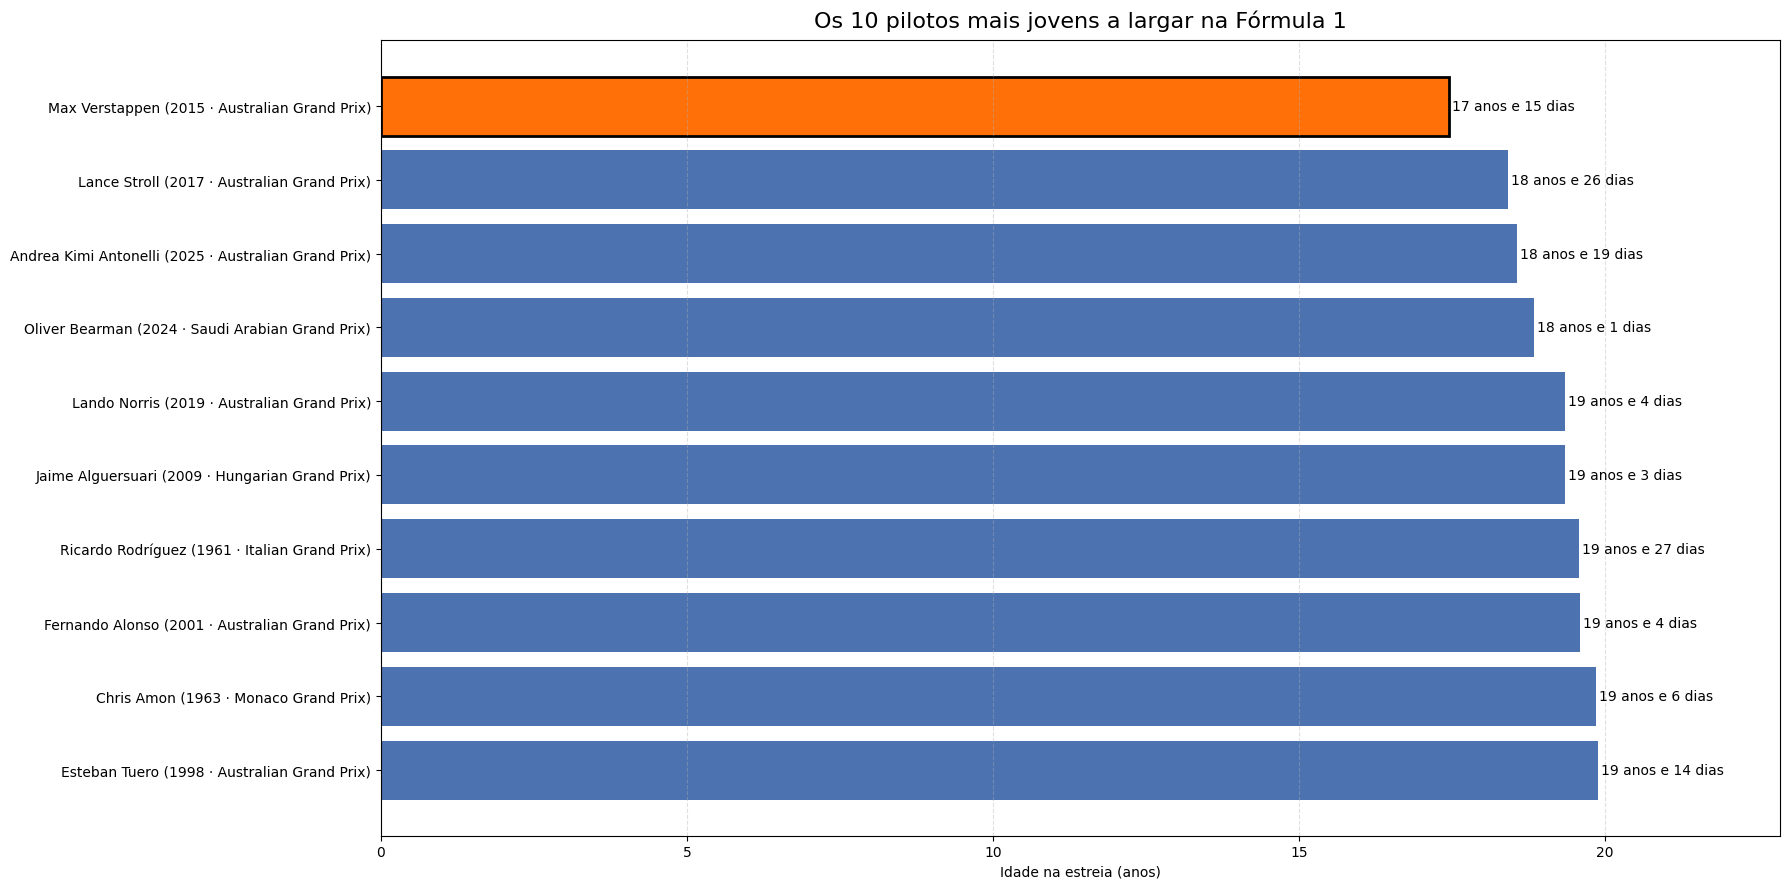

In [9]:
fxns.gera_graf_top_10_mais_jovens(df_top_10_jovens_largada, "Os 10 pilotos mais jovens a largar na Fórmula 1", "Idade na estreia (anos)", "Verstappen")

E vai além, ele não apenas possui essa marca considerando estréia, mas pra vitória na F1 também.

In [10]:
# Vamos gerar um dataset com a primeira vitória de cada piloto por idade no momento em que conquistou a sua vitória:

df_race_wins = df_races[df_races['finishing_position'] == 1].copy()

df_first_win = fxns.gerar_dataset_primeiro_evento(df_race_wins, df_drivers)

In [11]:
# Agora pego os 10 mais jovens:

df_top_10_jovens_vencedores = df_first_win.sort_values("idade_primeiro_evento").head(10)
df_top_10_jovens_vencedores

driver_id  driver_full_name                 race_name  race_date  year  \
74         831    Max Verstappen        Spanish Grand Prix 2016-05-15  2016   
106        798  Sebastian Vettel        Italian Grand Prix 2008-09-14  2008   
11         843   Charles Leclerc        Belgian Grand Prix 2019-09-01  2019   
24         763   Fernando Alonso      Hungarian Grand Prix 2003-08-24  2003   
111         49      Troy Ruttman          Indianapolis 500 1952-05-30  1952   
7          297     Bruce McLaren  United States Grand Prix 1959-12-12  1959   
66         795    Lewis Hamilton       Canadian Grand Prix 2007-06-10  2007   
85         857     Oscar Piastri      Hungarian Grand Prix 2024-07-21  2024   
63         762    Kimi Räikkönen      Malaysian Grand Prix 2003-03-23  2003   
101        794     Robert Kubica       Canadian Grand Prix 2008-06-08  2008   

                       circuit_name circuit_country  race_status  \
74   Circuit de Barcelona-Catalunya           Spain          0.0   
106    Autodromo Nazionale di Monza           Italy          0.0   
11     Circuit de Spa-Francorchamps         Belgium          0.0   
24                      Hungaroring         Hungary          0.0   
111     Indianapolis Motor Speedway             USA          0.0   
7     Sebring International Raceway             USA          0.0   
66        Circuit Gilles Villeneuve          Canada          0.0   
85                      Hungaroring         Hungary          0.0   
63     Sepang International Circuit        Malaysia          0.0   
101       Circuit Gilles Villeneuve          Canada          0.0   

     finishing_position  starting_position  race_count_for_driver        dob  \
74                    1                4.0                    227 1997-09-30   
106                   1                1.0                    300 1987-07-03   
11                    1                1.0                    167 1997-10-16   
24                    1                1.0                    422 1981-07-29   
111                   1                7.0                      9 1930-03-11   
7                     1               10.0                    103 1937-08-30   
66                    1                1.0                    374 1985-01-07   
85                    1                2.0                     64 2001-04-06   
63                    1                7.0                    352 1979-10-17   
101                   1                2.0                     99 1984-12-07   

     idade_primeiro_evento  
74               18.622861  
106              21.201916  
11               21.875428  
24               22.069815  
111              22.220397  
7                22.283368  
66               22.420260  
85               23.290897  
63               23.430527  
101              23.501711

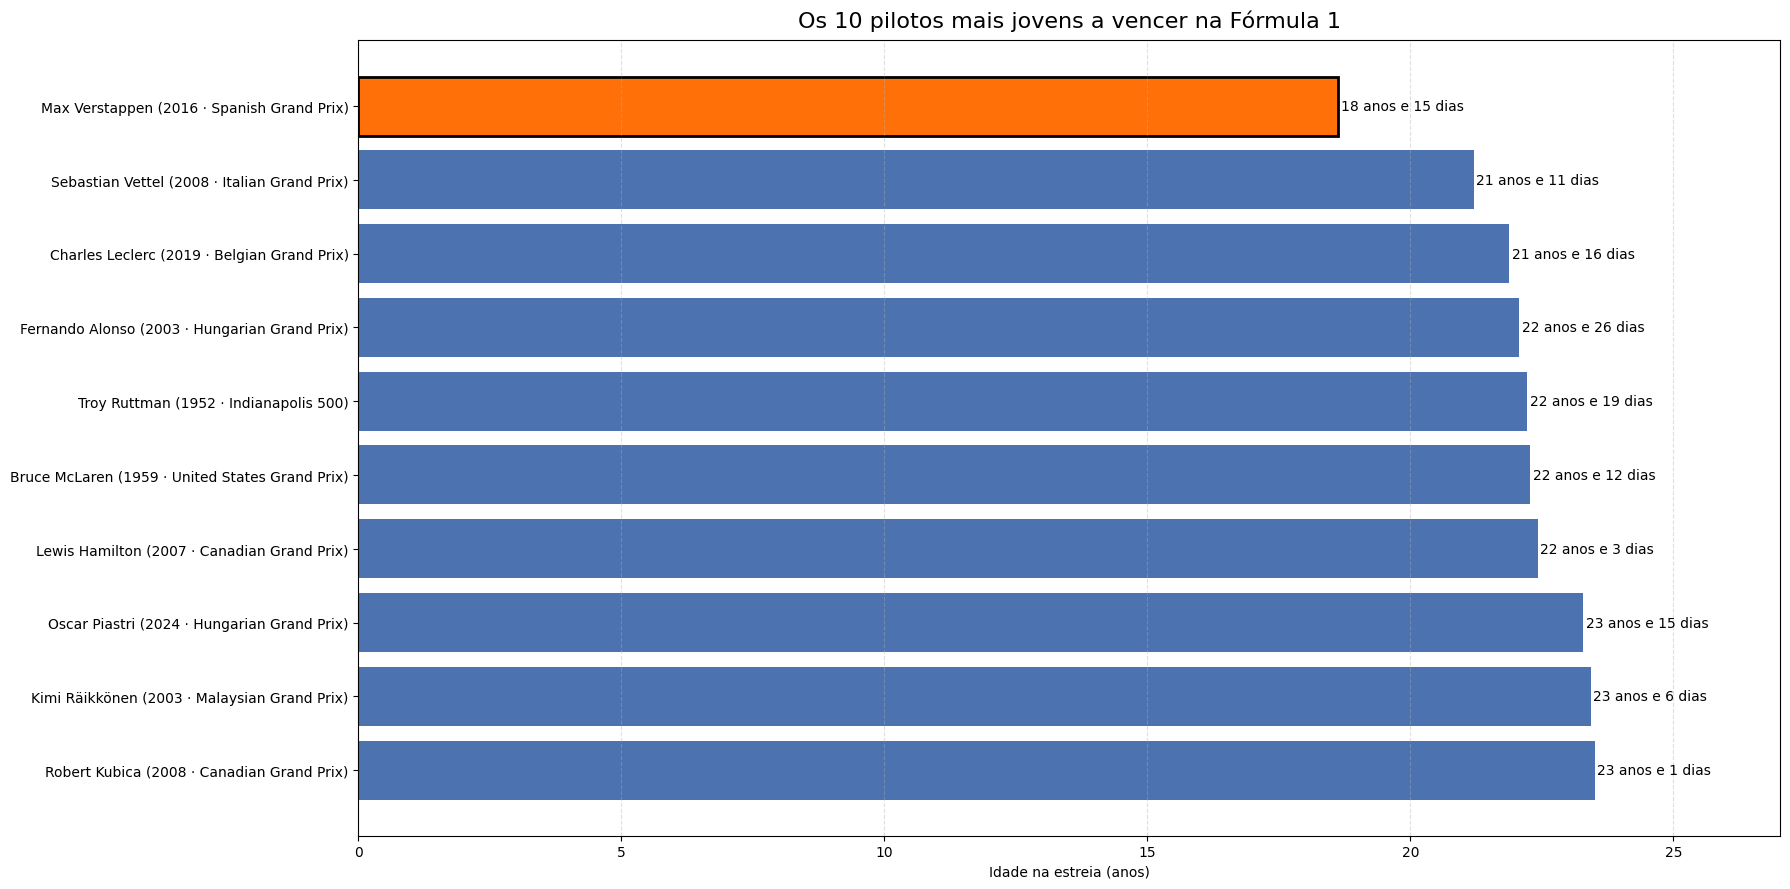

In [12]:
fxns.gera_graf_top_10_mais_jovens(df_top_10_jovens_vencedores, "Os 10 pilotos mais jovens a vencer na Fórmula 1", "Idade na estreia (anos)", "Verstappen")

## Mas... e desde então?

Beleza, acima conseguimos ver que o Verstappen não só foi o mais jovem estreante da F1 mas também foi o mais jovem a ganhar uma corrida, um ano após a sua estreia.

Mas, desde então, se fizermos uma visão geral dos números de vitórias, poles etc, Verstappen continua tendo marcas interessantes? Vamos dar uma olhada em alguns números gerais e a partir disso podemos ir aprofundando as nossas análises.

### Pole Positions:

In [13]:
df_races

race_name  round_id  year  race_date  \
0      Australian Grand Prix      1126  2025 2025-03-16   
1      Australian Grand Prix      1126  2025 2025-03-16   
2      Australian Grand Prix      1126  2025 2025-03-16   
3      Australian Grand Prix      1126  2025 2025-03-16   
4      Australian Grand Prix      1126  2025 2025-03-16   
...                      ...       ...   ...        ...   
25748     Italian Grand Prix         7  1950 1950-09-03   
25749     Italian Grand Prix         7  1950 1950-09-03   
25750     Italian Grand Prix         7  1950 1950-09-03   
25751     Italian Grand Prix         7  1950 1950-09-03   
25752     Italian Grand Prix         7  1950 1950-09-03   

                         circuit_name circuit_country  driver_id driver_code  \
0      Albert Park Grand Prix Circuit       Australia        845         NOR   
1      Albert Park Grand Prix Circuit       Australia        831         VER   
2      Albert Park Grand Prix Circuit       Australia        847         RUS   
3      Albert Park Grand Prix Circuit       Australia        863         ANT   
4      Albert Park Grand Prix Circuit       Australia        846         ALB   
...                               ...             ...        ...         ...   
25748    Autodromo Nazionale di Monza           Italy         80        None   
25749    Autodromo Nazionale di Monza           Italy         28        None   
25750    Autodromo Nazionale di Monza           Italy         15        None   
25751    Autodromo Nazionale di Monza           Italy         81        None   
25752    Autodromo Nazionale di Monza           Italy         68        None   

           driver_ref driver_forename  ... laps_completed time_in_race_ms  \
0              norris           Lando  ...           57.0    01:42:06.304   
1      max_verstappen             Max  ...           57.0    01:42:07.199   
2             russell          George  ...           57.0    01:42:14.785   
3           antonelli     Andrea Kimi  ...           57.0    01:42:16.439   
4               albon       Alexander  ...           57.0    01:42:19.077   
...               ...             ...  ...            ...             ...   
25748          sanesi        Consalvo  ...           11.0            None   
25749          manzon          Robert  ...            7.0            None   
25750            bira          Prince  ...            1.0            None   
25751         pietsch            Paul  ...            0.0            None   
25752         bonetto          Felice  ...            0.0            None   

      fastest_lap_number fastest_lap_rank fastest_lap_time  fastest_lap_speed  \
0                   43.0              1.0     00:01:22.167                NaN   
1                   43.0              3.0     00:01:23.081                NaN   
2                   43.0             11.0     00:01:25.065                NaN   
3                   43.0              9.0     00:01:24.901                NaN   
4                   43.0              8.0     00:01:24.597                NaN   
...                  ...              ...              ...                ...   
25748                NaN              NaN             None                NaN   
25749                NaN              NaN             None                NaN   
25750                NaN              NaN             None                NaN   
25751                NaN              NaN             None                NaN   
25752                NaN              NaN             None                NaN   

       race_status  race_count_for_driver        dob driver_age_at_race  
0              0.0                    146 1999-11-13          25.338809  
1              0.0                    227 1997-09-30          27.457906  
2              0.0                    146 1998-02-15          27.080082  
3              0.0                     18 2006-08-25          18.557153  
4              0.0                    123 1996-03-23          28.980151  
...    

In [14]:
df_pole_positions = df_races[df_races['starting_position'] == 1].copy()

df_pole_positions_agrup = df_pole_positions.groupby('driver_full_name').agg(
    {
        'race_name': 'count',
        'driver_age_at_race': 'max'
    }
).rename(columns={'race_name': 'pole_positions', 'driver_age_at_race': 'oldest_pole_position_age'}).reset_index().sort_values(by='pole_positions', ascending=False)

df_pole_positions_agrup

driver_full_name  pole_positions  oldest_pole_position_age
64       Lewis Hamilton             104                 38.537988
72   Michael Schumacher              68                 37.530459
4          Ayrton Senna              65                 34.110883
99     Sebastian Vettel              57                 32.279261
71       Max Verstappen              46                 27.975359
..                  ...             ...                       ...
104     Thierry Boutsen               1                 33.081451
105           Tom Pryce               1                 26.102669
108  Vittorio Brambilla               1                 37.571526
109       Walt Faulkner               1                 30.283368
110  Wolfgang von Trips               1                 33.352498

[111 rows x 3 columns]

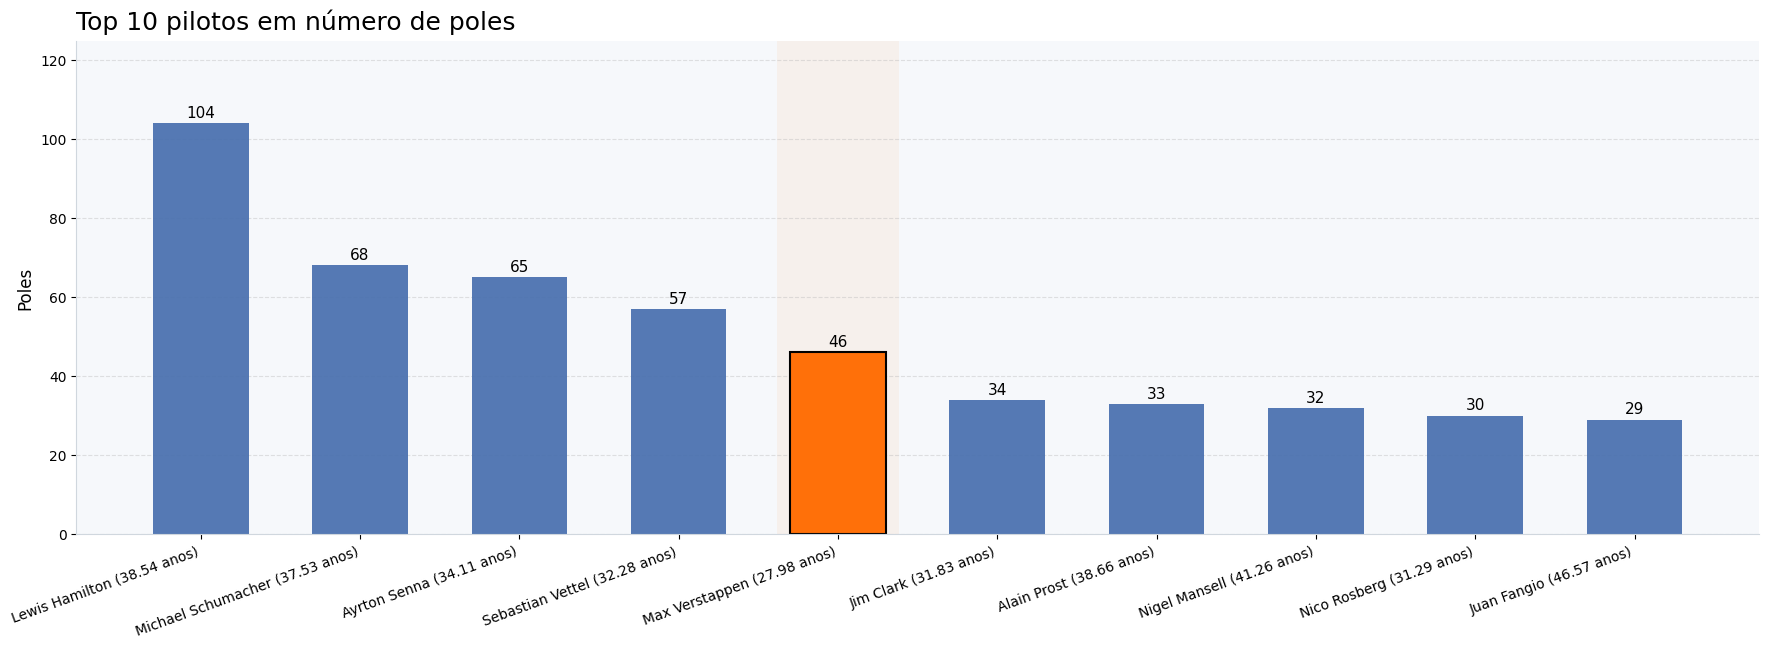

In [15]:
# Vamos tornar isso visual pra ficar mais fácil de expor a informação:

df_poles_top10 = df_pole_positions_agrup.head(10).copy()

df_poles_top10['nome_e_idade'] = df_poles_top10.apply(lambda row: f"{row['driver_full_name']} ({round(row['oldest_pole_position_age'], 2)} anos)", axis=1)

fxns.graf_top_pilotos(
    df_poles_top10,
    col_nome="nome_e_idade",
    col_valor="pole_positions",
    titulo="Top 10 pilotos em número de poles",
    xlabel="Poles",
    nome_a_destacar="Verstappen",
    orientation='vertical',
)


Acima não só podemos ver que o Verstappen é o número 5 em maior quantidade de pole positions na história da F1, como também ele é o mais jovem entre todos os pilotos que estão presentes na lista dos Top 10, sendo aproximadamente 5 anos mais jovem do que o 2o piloto mais jovem que seria o Nico Rosberg.

**Obs**.: a idade apresentada é a idade do piloto ao conseguir sua última pole presente na base de dados, faço assim pra tentar nivelar a comparação, ou seja, considero apenas a idade do piloto enquanto ele estava aumentando sua estatística de pole position.

O piloto que chega mais perto de Verstappen em termos de idade e que possui um volume bem considerável de pole positions seria o Leclerc, que cairia bem no Top 11. Porém, possui 26 pole positions, que equivale a 65% da quantidade de pole positions de Max Verstappen:

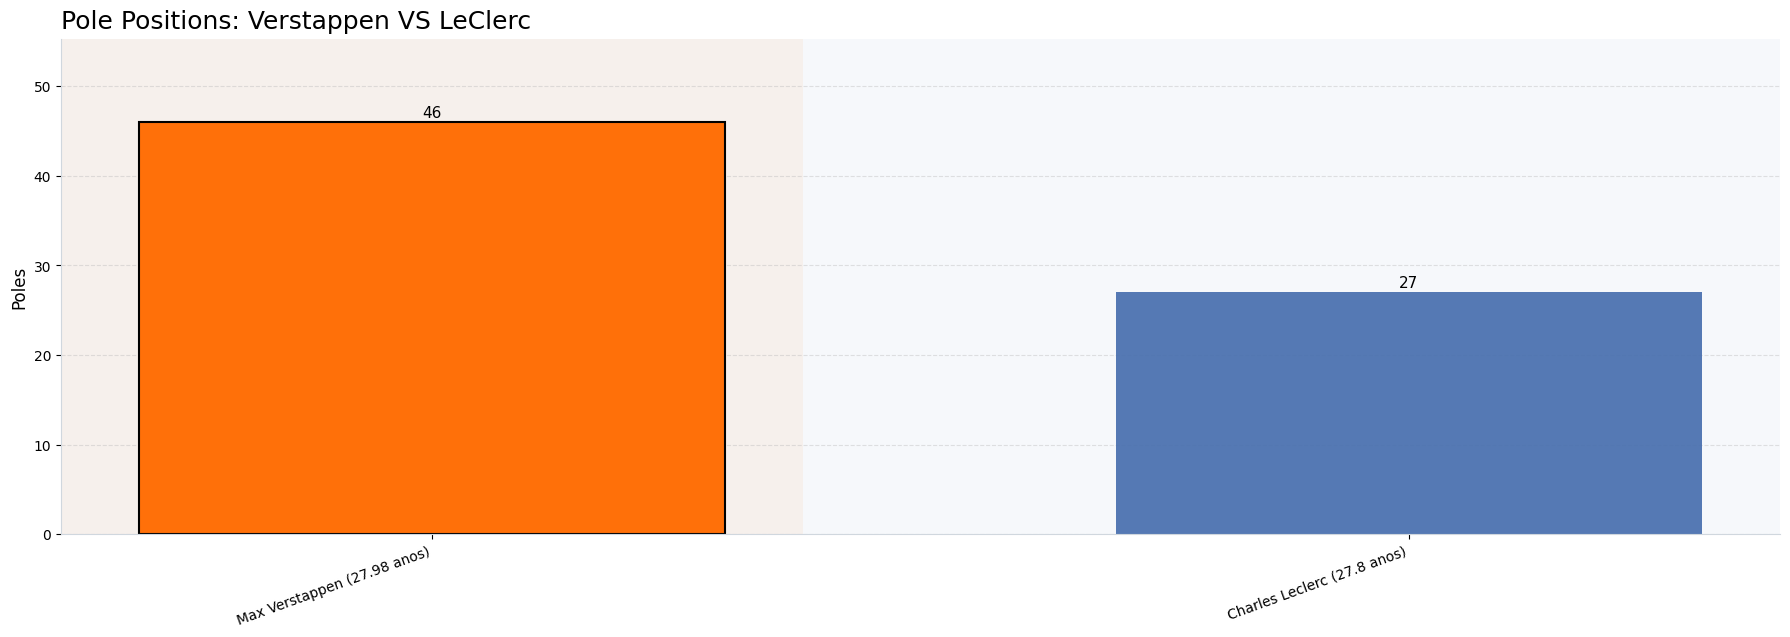

In [16]:
df_poles_ver_lec = df_pole_positions_agrup[df_pole_positions_agrup['driver_full_name'].str.contains('Verstappen|Leclerc', case=False, na=False)].copy()

df_poles_ver_lec['nome_e_idade'] = df_poles_ver_lec.apply(lambda row: f"{row['driver_full_name']} ({round(row['oldest_pole_position_age'], 2)} anos)", axis=1)

fxns.graf_top_pilotos(
    df_poles_ver_lec,
    col_nome="nome_e_idade",
    col_valor="pole_positions",
    titulo="Pole Positions: Verstappen VS LeClerc",
    xlabel="Poles",
    nome_a_destacar="Verstappen",
    orientation='vertical',
)


### Vitórias:

In [17]:
df_race_wins = df_races[df_races['finishing_position'] == 1].copy()

df_race_wins_agrup = df_race_wins.groupby('driver_full_name').agg(
    {
        'race_name': 'count',
        'driver_age_at_race': 'max'
    }
).rename(columns={'race_name': 'race_wins', 'driver_age_at_race': 'oldest_race_win_age'}).reset_index().sort_values(by='race_wins', ascending=False)

df_race_wins_agrup

driver_full_name  race_wins  oldest_race_win_age
66       Lewis Hamilton        105            39.553730
75   Michael Schumacher         91            37.741273
74       Max Verstappen         67            27.975359
106    Sebastian Vettel         53            32.221766
0           Alain Prost         51            38.414784
..                  ...        ...                  ...
102         Rodger Ward          1            38.381930
105           Sam Hanks          1            42.880219
100      Richie Ginther          1            35.219713
111        Troy Ruttman          1            22.220397
113  Vittorio Brambilla          1            37.763176

[115 rows x 3 columns]

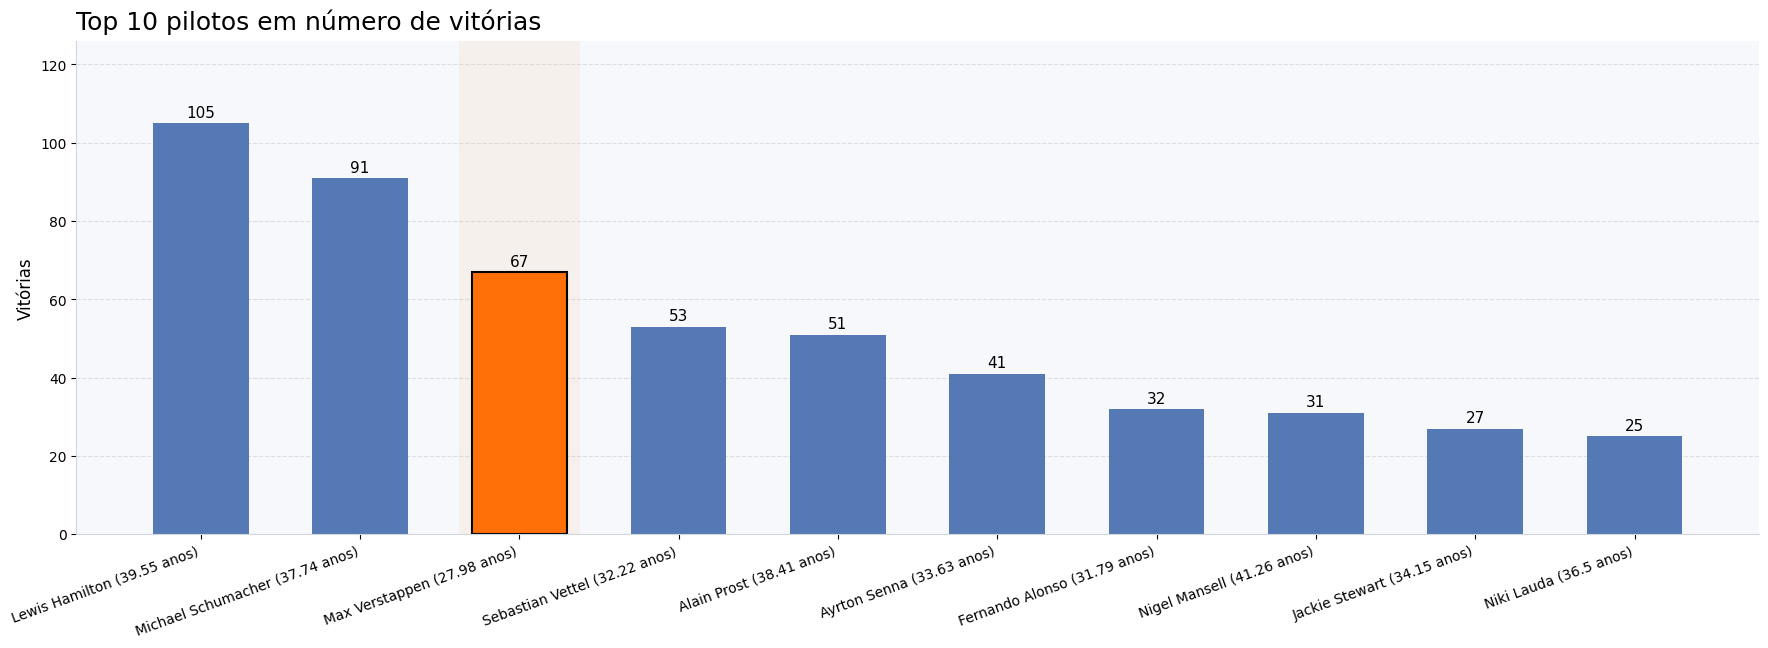

In [18]:
# Vamos tornar isso visual pra ficar mais fácil de expor a informação:

df_race_wins_top_10 = df_race_wins_agrup.head(10).copy()

df_race_wins_top_10['nome_e_idade'] = df_race_wins_top_10.apply(lambda row: f"{row['driver_full_name']} ({round(row['oldest_race_win_age'], 2)} anos)", axis=1)

fxns.graf_top_pilotos(
    df_race_wins_top_10,
    col_nome="nome_e_idade",
    col_valor="race_wins",
    titulo="Top 10 pilotos em número de vitórias",
    xlabel="Vitórias",
    nome_a_destacar="Verstappen",
    orientation='vertical',
)


Bom, eu acho que o gráfico acima nem precisa de muita explicação. Podemos ver que o Verstappen é o 3o piloto com maior número de vitórias da história e é o mais jovem por uma margem de 5 anos na lista, sendo que Vettel é o segundo mais jovem na lista de top 10, com 10 vitórias a menos ao final de 2024, ano no qual Vettel está aposentado e Verstappen continua correndo em 2025.

### E se olharmos em termos percentuais?

In [19]:
# Posso trazer a quantidade total de corridas de cada piloto pro dataset que usei pra ver as vitórias e calcular um percentual

df_driver_total_races = df_races.groupby('driver_full_name').agg({'race_name':'count'}).rename(columns={'race_name':'total_races'})


df_race_wins_agrup = pd.merge(
    left=df_race_wins_agrup,
    right=df_driver_total_races,
    on='driver_full_name',
    how='left'
)

df_race_wins_agrup['win_percentage'] = df_race_wins_agrup['race_wins'] / df_race_wins_agrup['total_races']

In [20]:
df_race_wins_agrup

driver_full_name  race_wins  oldest_race_win_age  total_races  \
0        Lewis Hamilton        105            39.553730          374   
1    Michael Schumacher         91            37.741273          308   
2        Max Verstappen         67            27.975359          227   
3      Sebastian Vettel         53            32.221766          300   
4           Alain Prost         51            38.414784          202   
..                  ...        ...                  ...          ...   
110         Rodger Ward          1            38.381930           12   
111           Sam Hanks          1            42.880219            9   
112      Richie Ginther          1            35.219713           53   
113        Troy Ruttman          1            22.220397            9   
114  Vittorio Brambilla          1            37.763176           74   

     win_percentage  
0          0.280749  
1          0.295455  
2          0.295154  
3          0.176667  
4          0.252475  
..              ...  
110        0.083333  
111        0.111111  
112        0.018868  
113        0.111111  
114        0.013514  

[115 rows x 5 columns]

In [21]:
# Vamos dar uma olhada nos top 10 maiores percentuais de vitórias:

df_top_10_win_percentages = df_race_wins_agrup[
    df_race_wins_agrup['total_races'] > 100 # Aqui, tentando complicar um pouco a análise, vou trazer apenas pilotos que tem um grande número de corridas feitas
].sort_values(by='win_percentage', ascending=False).head(10)

In [22]:
df_top_10_win_percentages

driver_full_name  race_wins  oldest_race_win_age  total_races  \
1   Michael Schumacher         91            37.741273          308   
2       Max Verstappen         67            27.975359          227   
0       Lewis Hamilton        105            39.553730          374   
5         Ayrton Senna         41            33.631759          161   
4          Alain Prost         51            38.414784          202   
14          Damon Hill         22            37.949350          116   
3     Sebastian Vettel         53            32.221766          300   
7        Nigel Mansell         31            41.264887          190   
9           Niki Lauda         25            36.503765          173   
16       Mika Häkkinen         20            33.004791          163   

    win_percentage  
1         0.295455  
2         0.295154  
0         0.280749  
5         0.254658  
4         0.252475  
14        0.189655  
3         0.176667  
7         0.163158  
9         0.144509  
16        0.122699

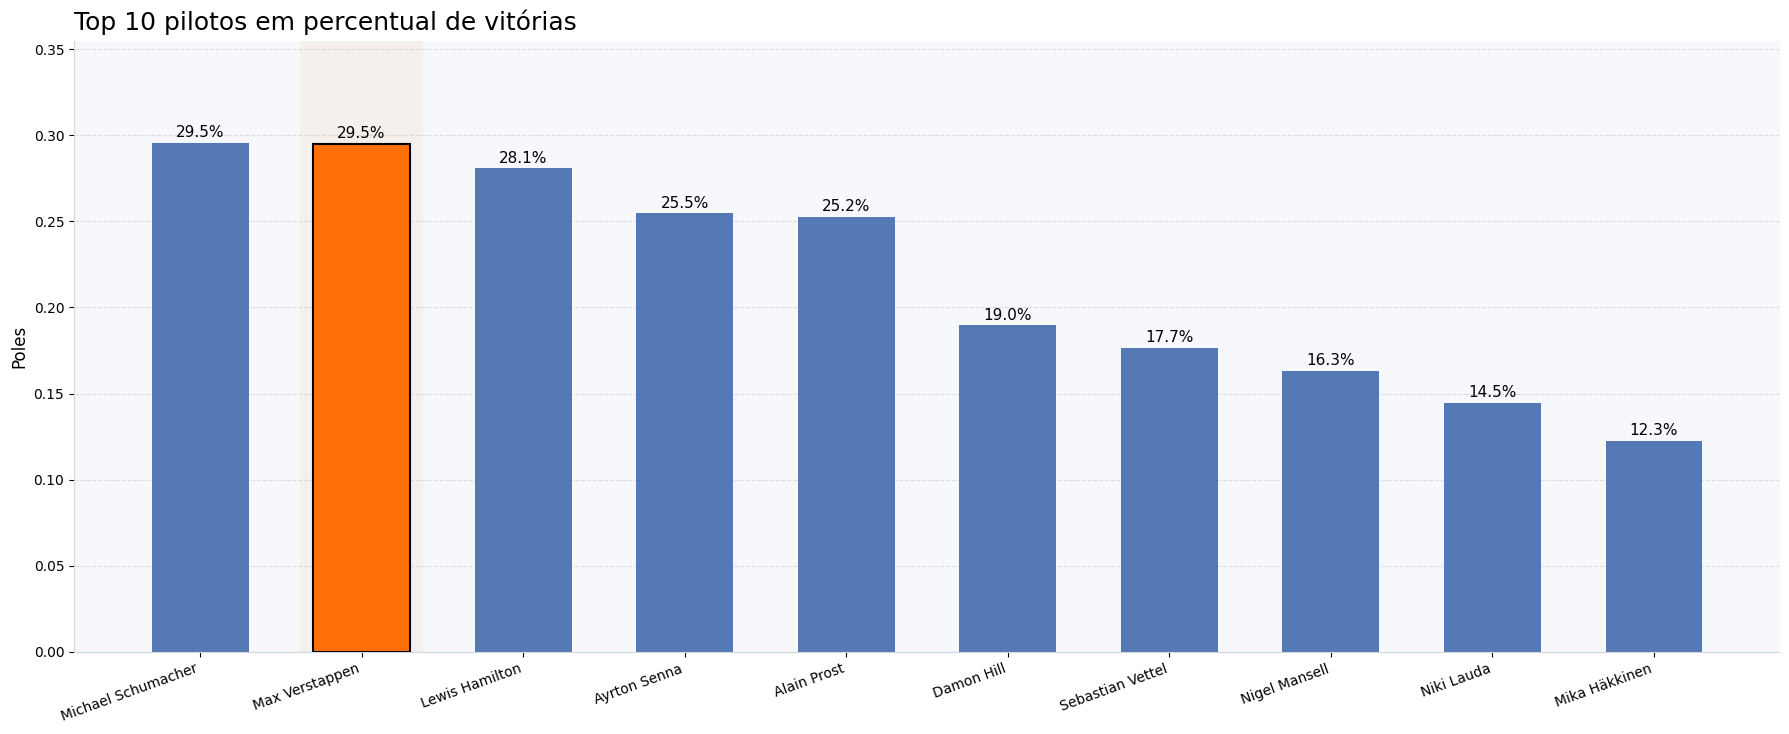

In [23]:
df_top_10_win_percentages['nome_e_idade'] = df_top_10_win_percentages.apply(lambda row: f"{row['driver_full_name']} ({round(row['oldest_race_win_age'], 2)} anos)", axis=1)

fxns.graf_top_pilotos(
    df_top_10_win_percentages,
    col_nome="driver_full_name",
    col_valor="win_percentage",
    titulo="Top 10 pilotos em percentual de vitórias",
    xlabel="Poles",
    nome_a_destacar="Verstappen",
    orientation='vertical',
    valor_format_str="{:.1%}"
)

Hoje, Verstappen está empatado em maior percentual de vitórias com ninguém mais ninguém menos do que Michael Schumacher

# Mas e aí?

Todos esses números apresentados até agora são lindos e maravilhosos. Independente de qualquer contraponto, não há de se discutir que o Verstappen hoje em dia é um piloto mais do que consolidado e está entre os maiores nomes que a F1 já teve em sua história.

Porém... Tudo que trouxe até agora são só grandes números, estou comparando valores absolutos com outros pilotos sem isolar um grande fator: a equipe.

A F1, apesar de certas pessoas esquecerem às vezes, não é uma competição apenas entre pilotos, mas também uma competição de construtores (equipes), que acabam por influenciar muito o resultado individual de cada piloto, e aí a questão é a seguinte: como poderíamos tentar isolar esse fator em uma análise?

É muito difícil, mas acredito que com algumas premissas, consigo prosseguir a análise de forma a tentar fazer isso de duas formas: primeiro posso analisar a consistência de tempo de volta dos pilotos (um piloto bom tem que ser um piloto que consegue entregar resultado nos momentos mais importantes e que tem tempos de volta consistentes), e, além disso, podemos comparar os pilotos diretamente com os companheiros de equipe que tiveram, sendo que ambos possuem o mesmo equipamento (premissa importante).

Então agora, pretendo prosseguir a análise sem aprofundar em grandes números absolutos, mas indo um passo adiante na análise, entrando mais em detalhe nos números...

## Análise de Consistência:

A ideia aqui vai ser tentar fazer uma análise da consistência do piloto ao longo das corridas que participou. E eu não quero fazer isso em torno de uma análise de resultados, mas sim de tempos de volta, porque resultados, novamente, podem ser muito influenciados por externalidades (questões mecânicas, performance da equipe etc), mas, em tese, quem tem mais influência na consistência do tempo de volta, seja ele bom ou ruim, é o piloto. Então vamos lá:

In [24]:
df_lap_times

race_name  year  race_date  \
0        Singapore Grand Prix  2025 2025-10-05   
1        Singapore Grand Prix  2025 2025-10-05   
2        Singapore Grand Prix  2025 2025-10-05   
3        Singapore Grand Prix  2025 2025-10-05   
4        Singapore Grand Prix  2025 2025-10-05   
...                       ...   ...        ...   
609537  Australian Grand Prix  1996 1996-03-10   
609538  Australian Grand Prix  1996 1996-03-10   
609539  Australian Grand Prix  1996 1996-03-10   
609540  Australian Grand Prix  1996 1996-03-10   
609541  Australian Grand Prix  1996 1996-03-10   

                          circuit_name circuit_country driver_code  \
0            Marina Bay Street Circuit       Singapore         RUS   
1            Marina Bay Street Circuit       Singapore         VER   
2            Marina Bay Street Circuit       Singapore         NOR   
3            Marina Bay Street Circuit       Singapore         PIA   
4            Marina Bay Street Circuit       Singapore         LEC   
...                                ...             ...         ...   
609537  Albert Park Grand Prix Circuit       Australia        None   
609538  Albert Park Grand Prix Circuit       Australia         VIL   
609539  Albert Park Grand Prix Circuit       Australia        None   
609540  Albert Park Grand Prix Circuit       Australia        None   
609541  Albert Park Grand Prix Circuit       Australia        None   

       driver_forename driver_surname    driver_full_name driver_nationality  \
0               George        Russell      George Russell            British   
1                  Max     Verstappen      Max Verstappen              Dutch   
2                Lando         Norris        Lando Norris            British   
3                Oscar        Piastri       Oscar Piastri         Australian   
4              Charles        Leclerc     Charles Leclerc         Monegasque   
...                ...            ...                 ...                ...   
609537           Damon           Hill          Damon Hill            British   
609538         Jacques     Villeneuve  Jacques Villeneuve           Canadian   
609539           Eddie         Irvine        Eddie Irvine            British   
609540         Gerhard         Berger      Gerhard Berger           Austrian   
609541            Mika       Häkkinen       Mika Häkkinen            Finnish   

        lap_number  position_on_lap      lap_time  race_status  is_pit_lap  \
0              1.0              1.0  00:01:43.905          0.0           0   
1              1.0              2.0  00:01:44.887          0.0           0   
2              1.0              3.0  00:01:45.566          0.0           0   
3              1.0              4.0  00:01:46.982          0.0           0   
4              1.0              5.0  00:01:47.564          0.0           0   
...            ...              ...           ...          ...         ...   
609537        58.0              1.0  00:01:37.529          0.0           0   
609538        58.0              2.0  00:01:45.524          0.0           0   
609539        58.0              3.0  00:01:39.312          0.0           0   
609540        58.0              4.0  00:01:38.055          0.0           0   
609541        58.0              5.0  00:01:39.572          0.0           0   

        lap_time_ms  
0          103905.0  
1          104887.0  
2          105566.0  
3          106982.0  
4          107564.0  
...             ...  
609537      97529.0  
609538     105524.0  
609539      99312.0  
609540      98055.0  
609541      99572.0  

[609070 rows x 16 columns]

Passos para análise de consistência:

- Preciso remover voltas que não seriam interessantes eu considerar do dataset pra analisar apenas tempo de volta válida (não quero voltas lentas de SC, ou que o piloto tenha parado no Box poluindo a análise);
- Depois vou calcular o desvio padrão usando a window de prova e piloto (quero o desvio padrão que cada piloto teve em cada prova);
- Análise da distribuição desse desv. pad. -> A "largura" da distribuição vai nos dizer algo sobre a consistência;
- Análise da média do desvio padrão 0-> quanto maior a média, maior a inconsistência

Obs.: Não sei se vou conseguir fazer uma análise da base toda de uma vez, porque vai ter pilotos com poucas corridas etc que vão atrapalhar a análise. Nesse caso, possivelmente só vai fazer sentido eu comparar pilotos diretamente comparáveis da era atual e nomes maiores que sabemos que são considerados grandes pilotos da F1.

### Fazendo o tratamento do dataset:

#### Primeiro quero tentar tirar as voltas de *Safety Car*: 

Vou tentar fazer isso por meio de uma abordagem "heurística": Eu vou calcular a mediana do tempo de volta de uma corrida e vou comparar com a volta do piloto usando um *threshold*, quando o tempo de volta ultrapassar esse valor (que acontece quando a volta, em tese, é BEM mais lenta que uma volta normal), e vou colocar a condição pra verificar que seja uma vola em que o piloto não perdeu posições (se ele rodou, o tempo de volta vai ser maior mas ele vai ter perdido posições, se for um SC por um motivo externo, ele não deveria perder posições).

Dessa forma (digo isso depois de ter feito essa análise algumas vezes e olhado repetidamente o dataset resultante), acredito que eu tenha conseguido, da melhor forma que pensei, retirar voltas que são lentas por motivos de corrida, mas ao mesmo tempo, manter voltas em que o piloto possa ter cometido algum erro ou então ter sido mais lento por falta de consistência mesmo.

In [25]:
df_lap_times = fxns.identificar_voltas_safety_car(
    df_laps=df_lap_times,
    threshold_percent=1.07 # Pra eu considerar como volta de SC, o ritmo tem que ter diminuído em pelo menos 20% (chute com critério em breves pesquisas)    
    )

b:\projetos\f1_analytics\notebooks\utils.py:483: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_lap_before_sc = df_out.assign(_is_sc_lap=is_sc_lap).groupby(group_cols)['_is_sc_lap'].shift(-1).fillna(False)


In [26]:
df_lap_times

race_name  year  race_date  \
0        Singapore Grand Prix  2025 2025-10-05   
1        Singapore Grand Prix  2025 2025-10-05   
2        Singapore Grand Prix  2025 2025-10-05   
3        Singapore Grand Prix  2025 2025-10-05   
4        Singapore Grand Prix  2025 2025-10-05   
...                       ...   ...        ...   
609537  Australian Grand Prix  1996 1996-03-10   
609538  Australian Grand Prix  1996 1996-03-10   
609539  Australian Grand Prix  1996 1996-03-10   
609540  Australian Grand Prix  1996 1996-03-10   
609541  Australian Grand Prix  1996 1996-03-10   

                          circuit_name circuit_country driver_code  \
0            Marina Bay Street Circuit       Singapore         RUS   
1            Marina Bay Street Circuit       Singapore         VER   
2            Marina Bay Street Circuit       Singapore         NOR   
3            Marina Bay Street Circuit       Singapore         PIA   
4            Marina Bay Street Circuit       Singapore         LEC   
...                                ...             ...         ...   
609537  Albert Park Grand Prix Circuit       Australia        None   
609538  Albert Park Grand Prix Circuit       Australia         VIL   
609539  Albert Park Grand Prix Circuit       Australia        None   
609540  Albert Park Grand Prix Circuit       Australia        None   
609541  Albert Park Grand Prix Circuit       Australia        None   

       driver_forename driver_surname    driver_full_name driver_nationality  \
0               George        Russell      George Russell            British   
1                  Max     Verstappen      Max Verstappen              Dutch   
2                Lando         Norris        Lando Norris            British   
3                Oscar        Piastri       Oscar Piastri         Australian   
4              Charles        Leclerc     Charles Leclerc         Monegasque   
...                ...            ...                 ...                ...   
609537           Damon           Hill          Damon Hill            British   
609538         Jacques     Villeneuve  Jacques Villeneuve           Canadian   
609539           Eddie         Irvine        Eddie Irvine            British   
609540         Gerhard         Berger      Gerhard Berger           Austrian   
609541            Mika       Häkkinen       Mika Häkkinen            Finnish   

        lap_number  position_on_lap      lap_time  race_status  is_pit_lap  \
0              1.0              1.0  00:01:43.905          0.0           0   
1              1.0              2.0  00:01:44.887          0.0           0   
2              1.0              3.0  00:01:45.566          0.0           0   
3              1.0              4.0  00:01:46.982          0.0           0   
4              1.0              5.0  00:01:47.564          0.0           0   
...            ...              ...           ...          ...         ...   
609537        58.0              1.0  00:01:37.529          0.0           0   
609538        58.0              2.0  00:01:45.524          0.0           0   
609539        58.0              3.0  00:01:39.312          0.0           0   
609540        58.0              4.0  00:01:38.055          0.0           0   
609541        58.0              5.0  00:01:39.572          0.0           0   

        lap_time_ms  baseline_pace_plus_threshold  is_safety_car_lap  
0          103905.0                           NaN              False  
1          104887.0                           NaN              False  
2          105566.0                           NaN              False  
3          106982.0                           NaN              False  
4          107564.0                           NaN              False  
...             ...                           ...                ...  
609537      97529.0                     103819.96               True  
609538     105524.0                     103819.96               True  
609539      99312.0                     1

In [27]:
# Vamos fazer um "check de sanidade" nessa flag que eu acabei de criar:

df_check_sc = df_lap_times.groupby(
    by=[
        'race_name',
        'race_date',
        'is_safety_car_lap'
    ]
).agg({
    'lap_time_ms':'mean'
}).reset_index()

In [28]:
df_check_sc.sort_values('lap_time_ms', ascending=False)

race_name  race_date  is_safety_car_lap   lap_time_ms
326     British Grand Prix 2014-07-06               True  3.041607e+06
378    Canadian Grand Prix 2011-06-12               True  4.148524e+05
794   Malaysian Grand Prix 2012-03-25               True  4.105238e+05
752      Korean Grand Prix 2010-10-24               True  2.929787e+05
749    Japanese Grand Prix 2024-04-07               True  2.327238e+05
...                    ...        ...                ...           ...
118    Austrian Grand Prix 2019-06-30              False  7.058727e+04
114    Austrian Grand Prix 2017-07-09              False  7.038999e+04
116    Austrian Grand Prix 2018-07-01              False  7.035475e+04
1041    Styrian Grand Prix 2020-07-12              False  7.002990e+04
916      Sakhir Grand Prix 2020-12-06              False  5.951282e+04

[1113 rows x 4 columns]

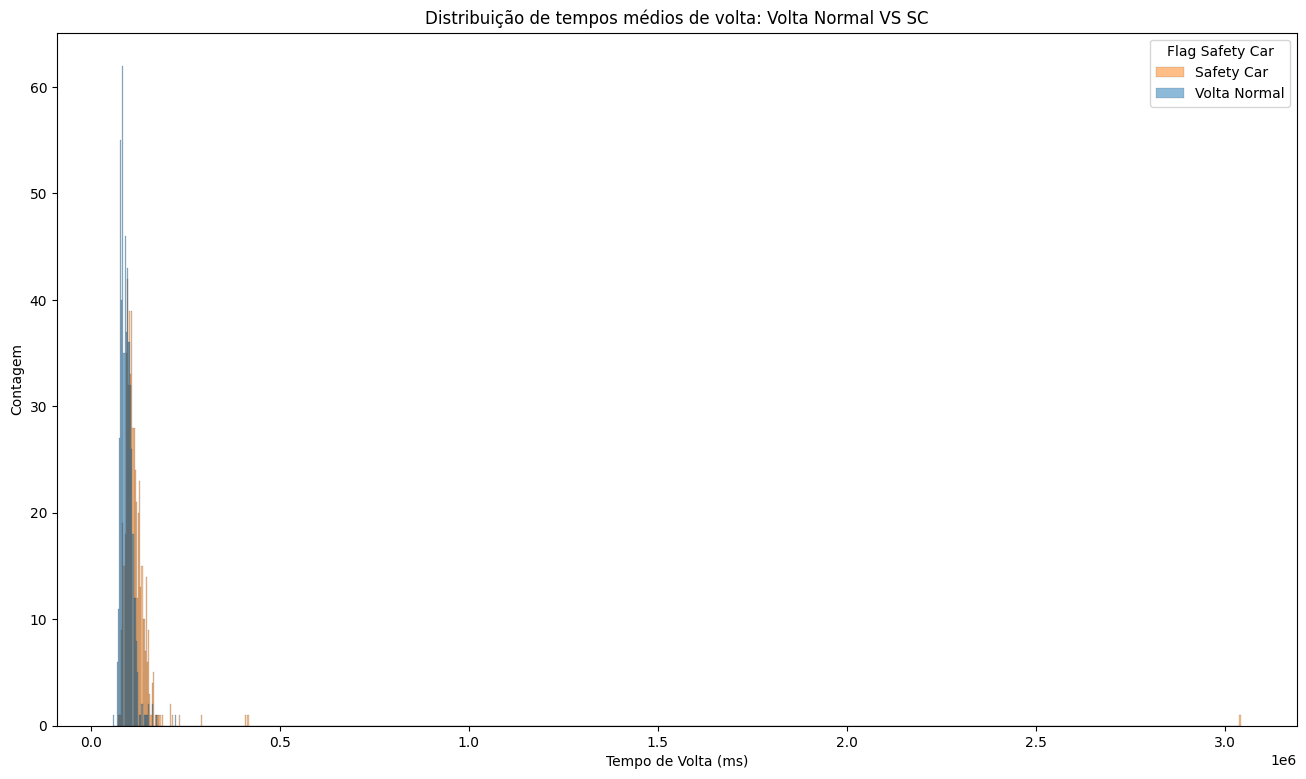

In [29]:
fig, ax = plt.subplots(figsize=(16,9))

sns.histplot(
    data=df_check_sc,
    x='lap_time_ms',
    hue='is_safety_car_lap',
    bins=1000,
    ax=ax
)

ax.set_title('Distribuição de tempos médios de volta: Volta Normal VS SC')
ax.set_xlabel('Tempo de Volta (ms)')
ax.set_ylabel('Contagem')
ax.legend(title='Flag Safety Car', labels=['Safety Car', 'Volta Normal'])

É difícil fazer uma validação plena da informação acima, mas, vendo o gráfico, conseguimos observar que as voltas classificadas como lentas (Safety Car) estão mais esparsas e mais lentas que as voltas normais, que são maiores em quantidade e mais concentradas, o que vai em linha com o esperado, portanto, considero que a flag está fazendo sentido no momento.

### Removendo voltas a serem desconsideradas na análise:

Na minha visão, para análises de tempo de volta, tenho que tirar:
- Voltas de SC, que foi as que indicamos acima;
- Primeiras voltas, sendo que não são representativas do ritmo de corrida ao longo das demais voltas;
- Voltas em que o piloto parou no pit stop, e isso, conseguimos ter a indicação a partir do dataset de pit stop, sendo que previamente já incluimos uma flag pra identificar esses casos;
- Removo eventos em que o piloto não terminou (geralmente a última volta possui valores bem elevados nesses casos).

In [30]:
df_lap_times

race_name  year  race_date  \
0        Singapore Grand Prix  2025 2025-10-05   
1        Singapore Grand Prix  2025 2025-10-05   
2        Singapore Grand Prix  2025 2025-10-05   
3        Singapore Grand Prix  2025 2025-10-05   
4        Singapore Grand Prix  2025 2025-10-05   
...                       ...   ...        ...   
609537  Australian Grand Prix  1996 1996-03-10   
609538  Australian Grand Prix  1996 1996-03-10   
609539  Australian Grand Prix  1996 1996-03-10   
609540  Australian Grand Prix  1996 1996-03-10   
609541  Australian Grand Prix  1996 1996-03-10   

                          circuit_name circuit_country driver_code  \
0            Marina Bay Street Circuit       Singapore         RUS   
1            Marina Bay Street Circuit       Singapore         VER   
2            Marina Bay Street Circuit       Singapore         NOR   
3            Marina Bay Street Circuit       Singapore         PIA   
4            Marina Bay Street Circuit       Singapore         LEC   
...                                ...             ...         ...   
609537  Albert Park Grand Prix Circuit       Australia        None   
609538  Albert Park Grand Prix Circuit       Australia         VIL   
609539  Albert Park Grand Prix Circuit       Australia        None   
609540  Albert Park Grand Prix Circuit       Australia        None   
609541  Albert Park Grand Prix Circuit       Australia        None   

       driver_forename driver_surname    driver_full_name driver_nationality  \
0               George        Russell      George Russell            British   
1                  Max     Verstappen      Max Verstappen              Dutch   
2                Lando         Norris        Lando Norris            British   
3                Oscar        Piastri       Oscar Piastri         Australian   
4              Charles        Leclerc     Charles Leclerc         Monegasque   
...                ...            ...                 ...                ...   
609537           Damon           Hill          Damon Hill            British   
609538         Jacques     Villeneuve  Jacques Villeneuve           Canadian   
609539           Eddie         Irvine        Eddie Irvine            British   
609540         Gerhard         Berger      Gerhard Berger           Austrian   
609541            Mika       Häkkinen       Mika Häkkinen            Finnish   

        lap_number  position_on_lap      lap_time  race_status  is_pit_lap  \
0              1.0              1.0  00:01:43.905          0.0           0   
1              1.0              2.0  00:01:44.887          0.0           0   
2              1.0              3.0  00:01:45.566          0.0           0   
3              1.0              4.0  00:01:46.982          0.0           0   
4              1.0              5.0  00:01:47.564          0.0           0   
...            ...              ...           ...          ...         ...   
609537        58.0              1.0  00:01:37.529          0.0           0   
609538        58.0              2.0  00:01:45.524          0.0           0   
609539        58.0              3.0  00:01:39.312          0.0           0   
609540        58.0              4.0  00:01:38.055          0.0           0   
609541        58.0              5.0  00:01:39.572          0.0           0   

        lap_time_ms  baseline_pace_plus_threshold  is_safety_car_lap  
0          103905.0                           NaN              False  
1          104887.0                           NaN              False  
2          105566.0                           NaN              False  
3          106982.0                           NaN              False  
4          107564.0                           NaN              False  
...             ...                           ...                ...  
609537      97529.0                     103819.96               True  
609538     105524.0                     103819.96               True  
609539      99312.0                     1

In [31]:
df_lap_times_valid = fxns.filtrar_voltas_para_analise(df=df_lap_times)

In [32]:
df_lap_times_valid

race_name  year  race_date  \
20       Singapore Grand Prix  2025 2025-10-05   
21       Singapore Grand Prix  2025 2025-10-05   
22       Singapore Grand Prix  2025 2025-10-05   
23       Singapore Grand Prix  2025 2025-10-05   
24       Singapore Grand Prix  2025 2025-10-05   
...                       ...   ...        ...   
609532  Australian Grand Prix  1996 1996-03-10   
609533  Australian Grand Prix  1996 1996-03-10   
609539  Australian Grand Prix  1996 1996-03-10   
609540  Australian Grand Prix  1996 1996-03-10   
609541  Australian Grand Prix  1996 1996-03-10   

                          circuit_name circuit_country driver_code  \
20           Marina Bay Street Circuit       Singapore         RUS   
21           Marina Bay Street Circuit       Singapore         VER   
22           Marina Bay Street Circuit       Singapore         NOR   
23           Marina Bay Street Circuit       Singapore         PIA   
24           Marina Bay Street Circuit       Singapore         LEC   
...                                ...             ...         ...   
609532  Albert Park Grand Prix Circuit       Australia        None   
609533  Albert Park Grand Prix Circuit       Australia        None   
609539  Albert Park Grand Prix Circuit       Australia        None   
609540  Albert Park Grand Prix Circuit       Australia        None   
609541  Albert Park Grand Prix Circuit       Australia        None   

       driver_forename driver_surname driver_full_name driver_nationality  \
20              George        Russell   George Russell            British   
21                 Max     Verstappen   Max Verstappen              Dutch   
22               Lando         Norris     Lando Norris            British   
23               Oscar        Piastri    Oscar Piastri         Australian   
24             Charles        Leclerc  Charles Leclerc         Monegasque   
...                ...            ...              ...                ...   
609532         Gerhard         Berger   Gerhard Berger           Austrian   
609533            Mika       Häkkinen    Mika Häkkinen            Finnish   
609539           Eddie         Irvine     Eddie Irvine            British   
609540         Gerhard         Berger   Gerhard Berger           Austrian   
609541            Mika       Häkkinen    Mika Häkkinen            Finnish   

        lap_number  position_on_lap      lap_time  race_status  is_pit_lap  \
20             2.0              1.0  00:01:39.149          0.0           0   
21             2.0              2.0  00:01:39.698          0.0           0   
22             2.0              3.0  00:01:39.639          0.0           0   
23             2.0              4.0  00:01:40.284          0.0           0   
24             2.0              5.0  00:01:41.077          0.0           0   
...            ...              ...           ...          ...         ...   
609532        57.0              4.0  00:01:37.344          0.0           0   
609533        57.0              5.0   00:01:38.41          0.0           0   
609539        58.0              3.0  00:01:39.312          0.0           0   
609540        58.0              4.0  00:01:38.055          0.0           0   
609541        58.0              5.0  00:01:39.572          0.0           0   

        lap_time_ms  baseline_pace_plus_threshold  is_safety_car_lap  
20          99149.0                     104809.71              False  
21          99698.0                     104809.71              False  
22          99639.0                     104809.71              False  
23         100284.0                     104809.71              False  
24         101077.0                     104809.71              False  
...             ...                           ...                ...  
609532      97344.0                     103819.96              False  
609533      98410.0                     103819.96              False  
609539      99312.0                     103819.96              False  
609540

### Criando uma métrica de consistência

Agora que tenho o meu dataset "limpo", vou tentar calcular a consistência do piloto por meio do desvio padrão do tempo de volta de cada piloto em cada etapa. A ideia aqui é a seguinte:

- Analisar a distribuição do desvio padrão -> Quanto mais agrupada a distribuição em menores valores, significa que o piloto é mais consistente entre as diferentes corridas.
- Analisar a média do desvio padrão -> Quanto menor o o valor, significa que o piloto possui maior consistência entre as diferentes corridas.

A questão (depois de já ter tentado fazer essa análise algumas vezes) é que algumas corridas tem um desvio padrão de tempo de volta muito alto por natureza, e isso acaba atrapalhando bem a análise em certas comparações (corridas em que há mudança de clima possuem um alto desvio padrão natural embutido), então, o que terei que fazer é uma espécie de **"normalização relativa"** dos desvios padrões da seguinte forma:

- Calcularei os desvios padrões de cada piloto em cada evento, e farei a média geral desses valores também, irei então, calcular a diferença entre o desvio padrão do piloto e a média dos desvios padrões entre os pilotos, assim, eu vou beneficiar os pilotos que possuirem maior consistência (menor variação do tempo de volta) contra a variação "inerente" (representada pela média dos desvios padrões).

Vamos lá e vou tentar deixar claro conforme eu for chegando em conclusões:

In [33]:

# Vou agrupar o dataset, calculando tempo de volta médio e desvio padrão para cada piloto, em cada corrida
df_lap_times_std = (
    df_lap_times_valid.groupby(['race_name', 'year', 'driver_full_name'])['lap_time_ms']
    .agg(['std', 'mean'])
    .rename(columns={'std': 'lap_time_std', 'mean': 'lap_time_mean'})
    .reset_index()
)

# Aí aqui eu calculo o desvio padrão médio de todos os pilotos pra cada corrida
df_lap_times_std['lap_time_std_mean'] = df_lap_times_std.groupby(['race_name', 'year'])['lap_time_std'].transform('mean')

# Crio minha métrica de consistência, fazendo a diferença entre o desvio padrão do piloto contra o desvio padrão geral
df_lap_times_std['lap_time_std_driver_vs_mean'] = df_lap_times_std['lap_time_std'] - df_lap_times_std['lap_time_std_mean']

# Se o valor resultante é negativo, significa que o desvio padrão do piloto é menor que o médio, ou seja, foi mais consistente
df_lap_times_std

race_name  year driver_full_name  lap_time_std  \
0     70th Anniversary Grand Prix  2020  Alexander Albon   1549.280959   
1     70th Anniversary Grand Prix  2020     Carlos Sainz   1092.583107   
2     70th Anniversary Grand Prix  2020  Charles Leclerc   1102.407961   
3     70th Anniversary Grand Prix  2020     Daniil Kvyat   1271.997637   
4     70th Anniversary Grand Prix  2020     Esteban Ocon   1102.583734   
...                           ...   ...              ...           ...   
5352     United States Grand Prix  2024   Max Verstappen    724.766712   
5353     United States Grand Prix  2024  Nico Hülkenberg   1248.924967   
5354     United States Grand Prix  2024    Oscar Piastri   1125.157024   
5355     United States Grand Prix  2024     Pierre Gasly   1007.196723   
5356     United States Grand Prix  2024     Sergio Pérez   1118.916827   

      lap_time_mean  lap_time_std_mean  lap_time_std_driver_vs_mean  
0      91788.659574        1120.971797                   428.309162  
1      92355.744681        1120.971797                   -28.388690  
2      91942.979592        1120.971797                   -18.563837  
3      92375.425532        1120.971797                   151.025840  
4      92689.326531        1120.971797                   -18.388063  
...             ...                ...                          ...  
5352   99301.780000        1115.039457                  -390.272744  
5353  100093.760000        1115.039457                   133.885510  
5354   99355.720000        1115.039457                    10.117567  
5355  100499.840000        1115.039457                  -107.842734  
5356  100076.460000        1115.039457                     3.877370  

[5357 rows x 7 columns]

Antes de qualquer coisa, vamos dar uma olhada na consistência do Verstappen pra eu explicar o que estou tentando analisar:

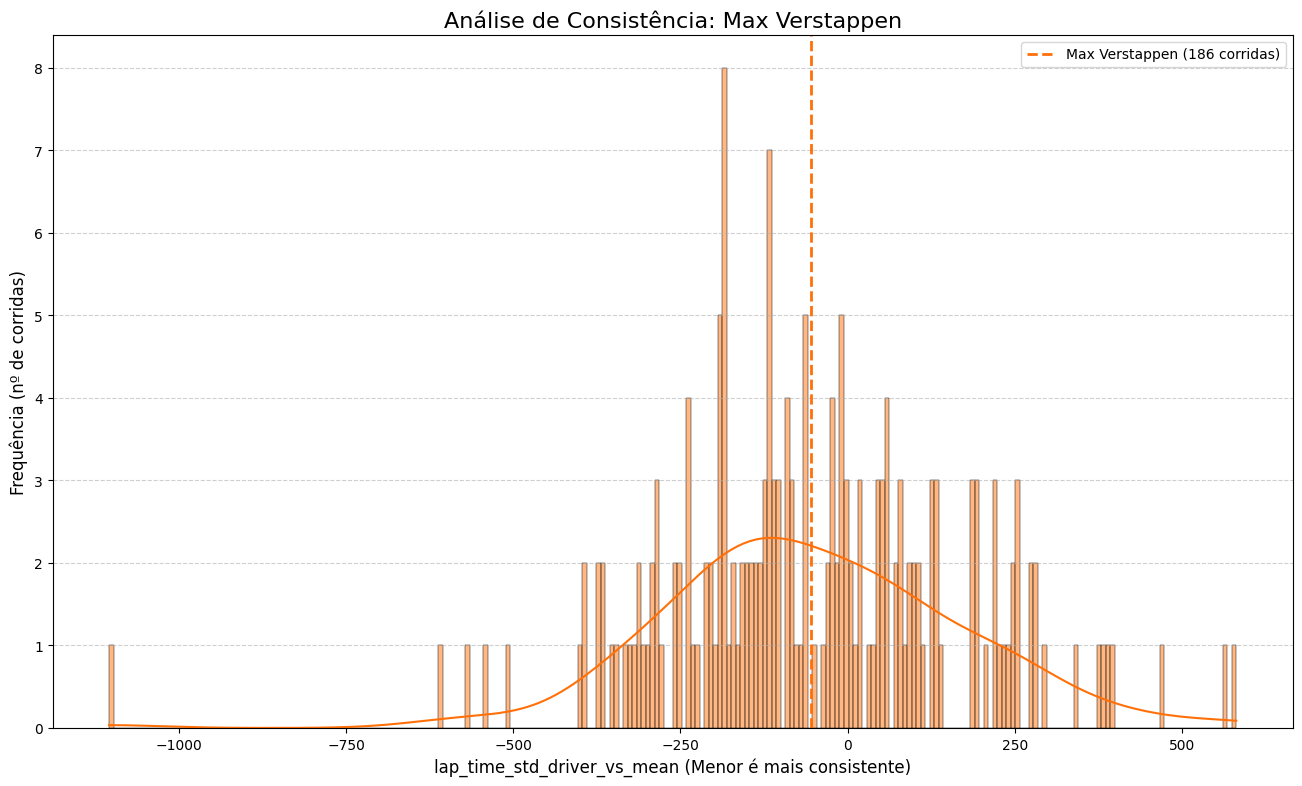

In [34]:
fig, ax = plt.subplots(figsize=(16, 9))

df_plot = df_lap_times_std[df_lap_times_std['driver_full_name'].isin(['Max Verstappen'])]

# Define uma paleta de cores fixa para garantir consistência
cor_base = "#FF7009"      # Laranja para o piloto base (Verstappen)
palette = {'Max Verstappen': cor_base}

# Calcula o número de corridas
n_corridas_base = len(df_plot[df_plot['driver_full_name'] == 'Max Verstappen'])

# Plot do histograma e da curva de densidade (KDE)
sns.histplot(data=df_plot, x='lap_time_std_driver_vs_mean', bins=250, kde=True, ax=ax, color=cor_base)

# Adiciona linhas verticais para a média de cada piloto
media_base = df_plot[df_plot['driver_full_name'] == 'Max Verstappen']['lap_time_std_driver_vs_mean'].mean()

ax.axvline(media_base, color=cor_base, linestyle='--', linewidth=2, label=f'Média {'Max Verstappen'.split(" ")[-1]}: {media_base:.2f}')

# Títulos e rótulos
ax.set_title(f"Análise de Consistência: {'Max Verstappen'}", fontsize=16)
ax.set_xlabel(f"{'lap_time_std_driver_vs_mean'} (Menor é mais consistente)", fontsize=12)
ax.set_ylabel("Frequência (nº de corridas)", fontsize=12)

# Atualiza a legenda para incluir a contagem de corridas
handles, _ = ax.get_legend_handles_labels()
labels = [f'{'Max Verstappen'} ({n_corridas_base} corridas)'] + [h.get_label() for h in handles[2:]]
ax.legend(handles=handles, labels=labels)

ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Vou explicar o que eu estou traznedo aqui acima:

Neste gráfico, visualizamos a distribuição do 'lap_time_std_driver_vs_mean' para Max Verstappen. Essa métrica representa a diferença entre o desvio padrão de Max Verstappen e o desvio padrão médio de todos os pilotos em determinado evento.

A linha vertical tracejada indica a média dos valores de 'lap_time_std_driver_vs_mean' de Verstappen. Uma média menor que 0, que é o caso de Verstappen, significa que ele tende a ser mais consistente que a média dos pilotos.

Ou seja, amostras à esquerda dessa linha representam corridas em que o piloto foi mais consistente que a média, e os valores à direita indicam corridas em que a consistência foi abaixo da média (desvio padrão maior que a média). O ideal é observar uma concentração maior de corridas à esquerda, sinalizando que, na maior parte do tempo, o piloto manteve um desempenho consistente, em que seus tempos de volta variaram menos que a média. 

**Importante**: os dados que estou olhando no momento não refletem TEMPO DE VOLTA, mas sim são um reflexo de CONSISTÊNCIA. Ou seja, valores a esquerda não significam voltas mais rápidas, mas sim que os tempos de volta oscilaram menos do que de outros pilotos. Vou olhar performance, tempos de volta de uma outra forma logo depois...

### Comparando com outros pilotos

Agora que expliquei o que estou tentando fazer aqui, eu posso fazer comparação entre a distribuição que vimos acima de Verstappen, com uma média menor do que 0 e com uma distribuição aparentemente concentrada em torno do 0, com demais pilotos, vendo como as coisas se comparam.

O que queremos ver aqui decorre do que expliquei acima:

- Menor média = maior consistência
- Distribuição concentrada = pouca variação do tempo de volta
- Amostras presentes mais à esquerda = consistência maior que a média
- Amostras à direita = pior consistência do que a média
- Cauda alongada à direita = possíveis amostras nas quais o piloto cometeu algum erro e perdeu posições

etc...

In [35]:
df_lap_times_std[df_lap_times_std['driver_full_name']=='Michael Schumacher']

race_name  year    driver_full_name  lap_time_std  \
50        Abu Dhabi Grand Prix  2011  Michael Schumacher   1310.560047   
62        Abu Dhabi Grand Prix  2012  Michael Schumacher   1729.701895   
221       Argentine Grand Prix  1998  Michael Schumacher   1001.572436   
230      Australian Grand Prix  1997  Michael Schumacher   1176.760094   
246      Australian Grand Prix  2000  Michael Schumacher   1314.222820   
...                        ...   ...                 ...           ...   
5201  United States Grand Prix  2002  Michael Schumacher   1180.387134   
5206  United States Grand Prix  2003  Michael Schumacher   3827.943665   
5209  United States Grand Prix  2004  Michael Schumacher    964.937252   
5213  United States Grand Prix  2005  Michael Schumacher   1152.004618   
5219  United States Grand Prix  2006  Michael Schumacher    869.914692   

      lap_time_mean  lap_time_std_mean  lap_time_std_driver_vs_mean  
50    106362.580000        1354.299803                   -43.739756  
62    108107.880952        1754.807762                   -25.105867  
221    89513.909091        1256.352595                  -254.780159  
230    93101.615385        1133.688024                    43.072071  
246    93833.313725        1476.095818                  -161.872998  
...             ...                ...                          ...  
5201   74230.800000         994.254288                   186.132845  
5206   75369.181818        2804.082515                  1023.861150  
5209   71852.172414         946.525952                    18.411300  
5213   73071.417910        1176.365322                   -24.360703  
5219   73732.875000         872.976202                    -3.061510  

[175 rows x 7 columns]

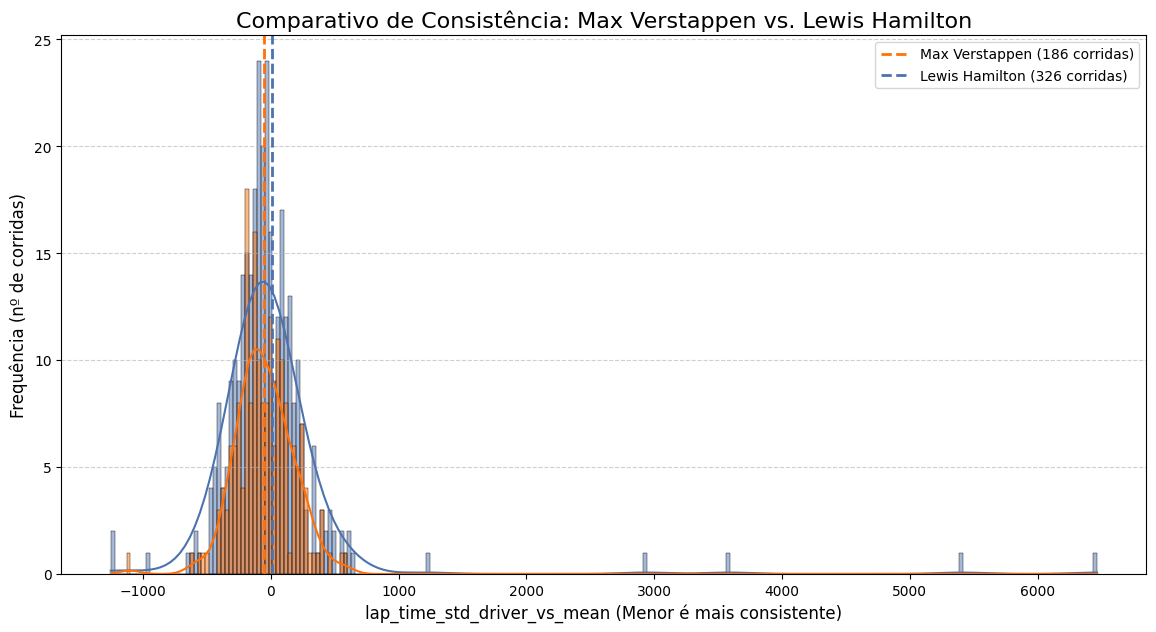

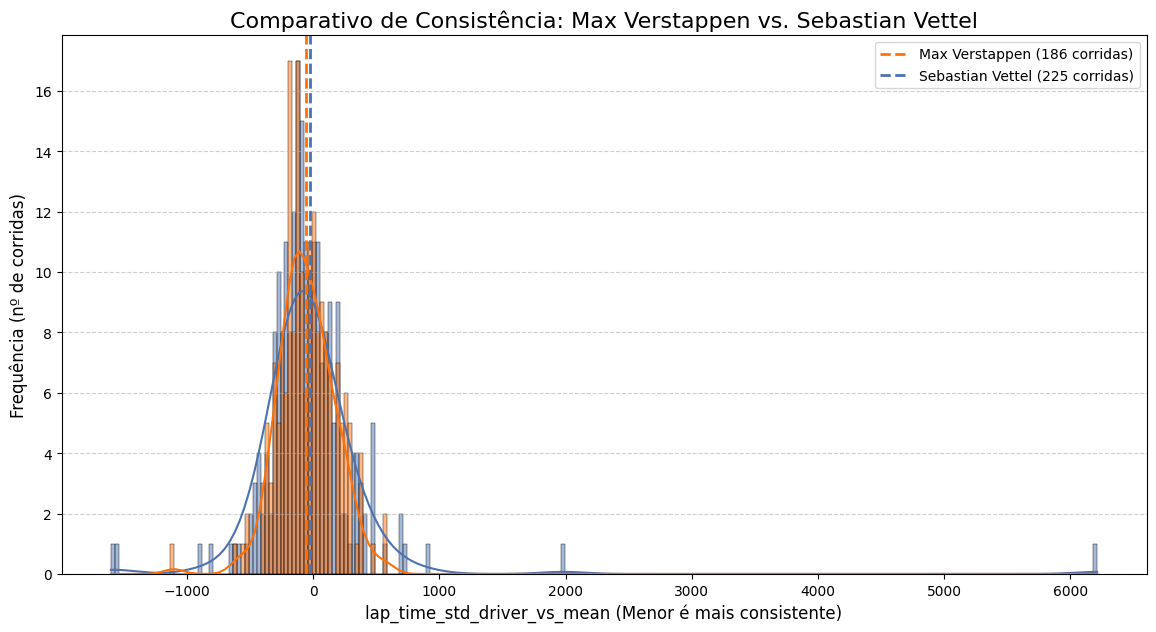

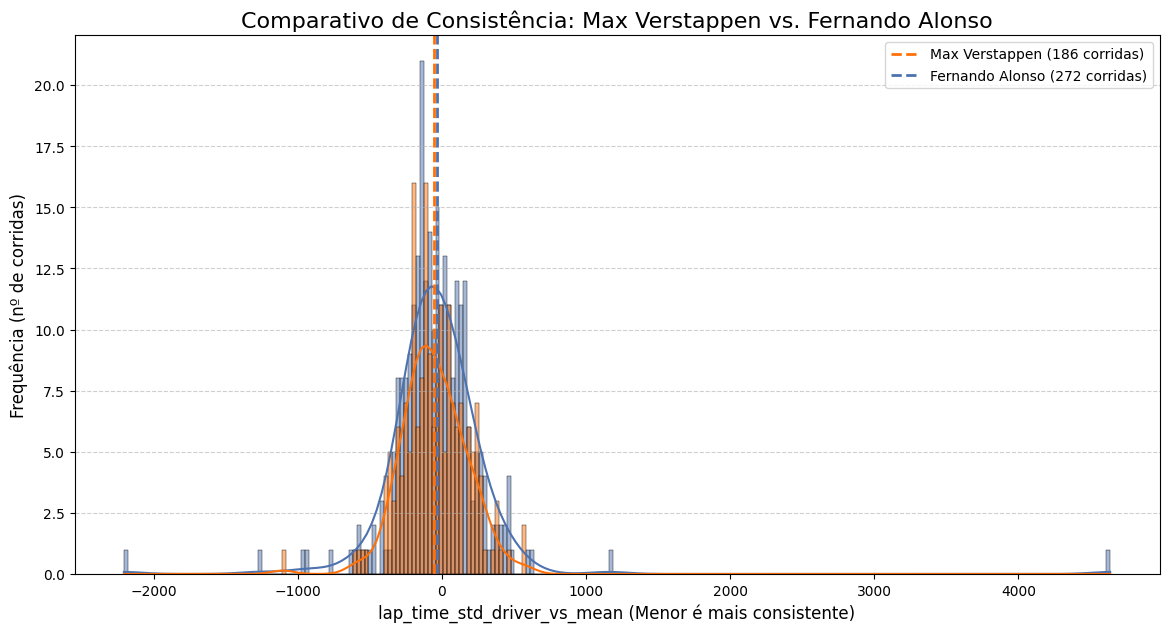

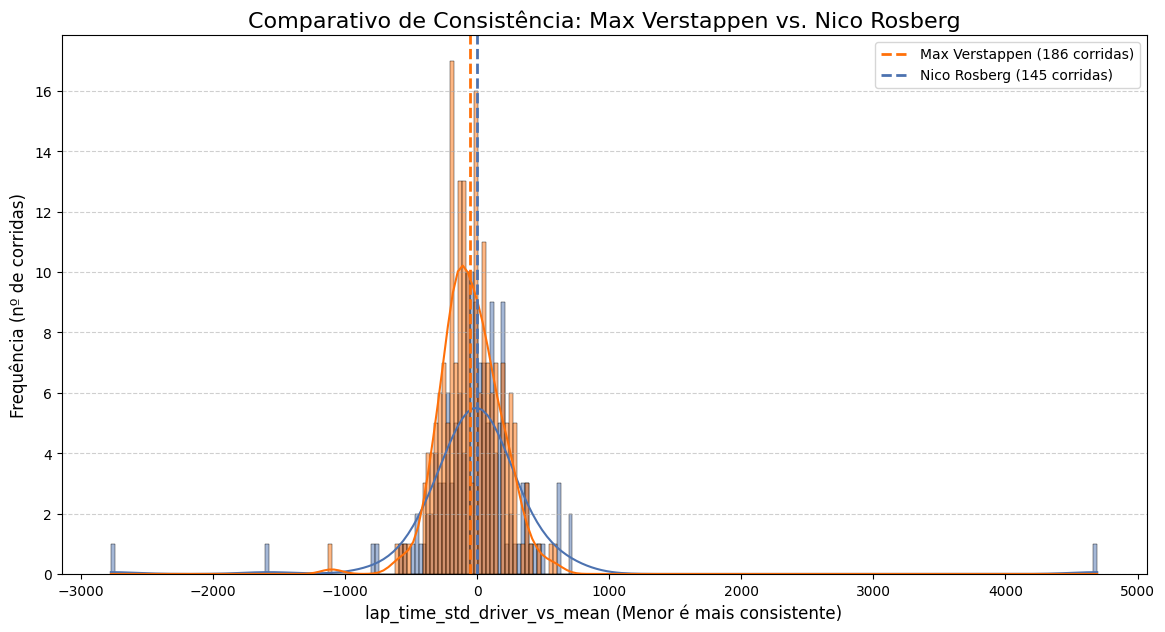

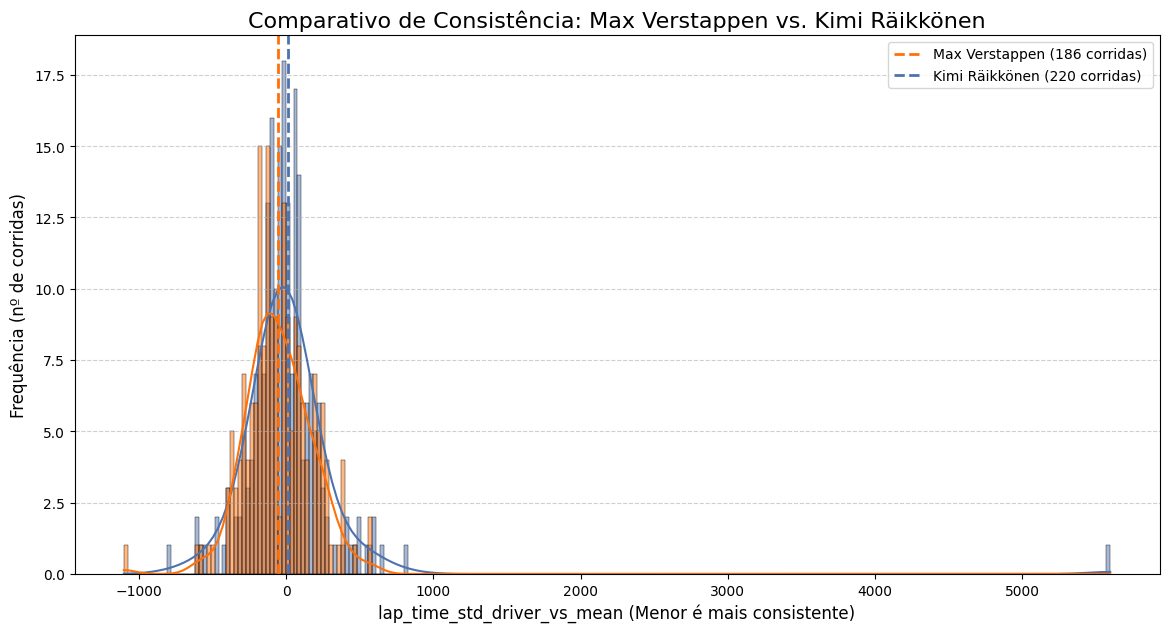

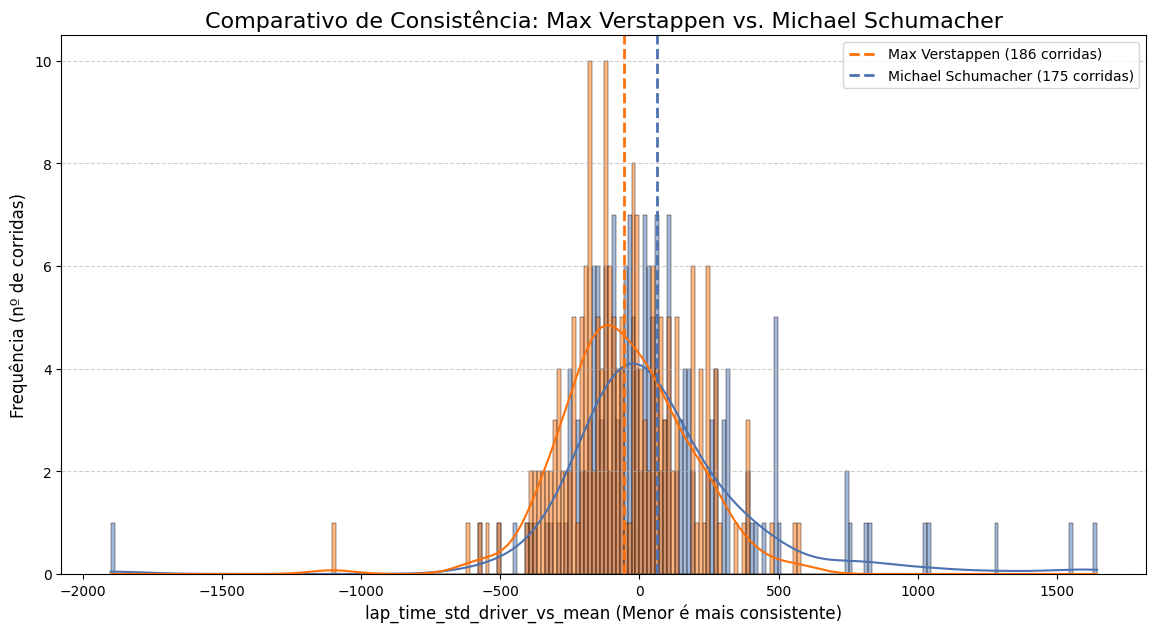

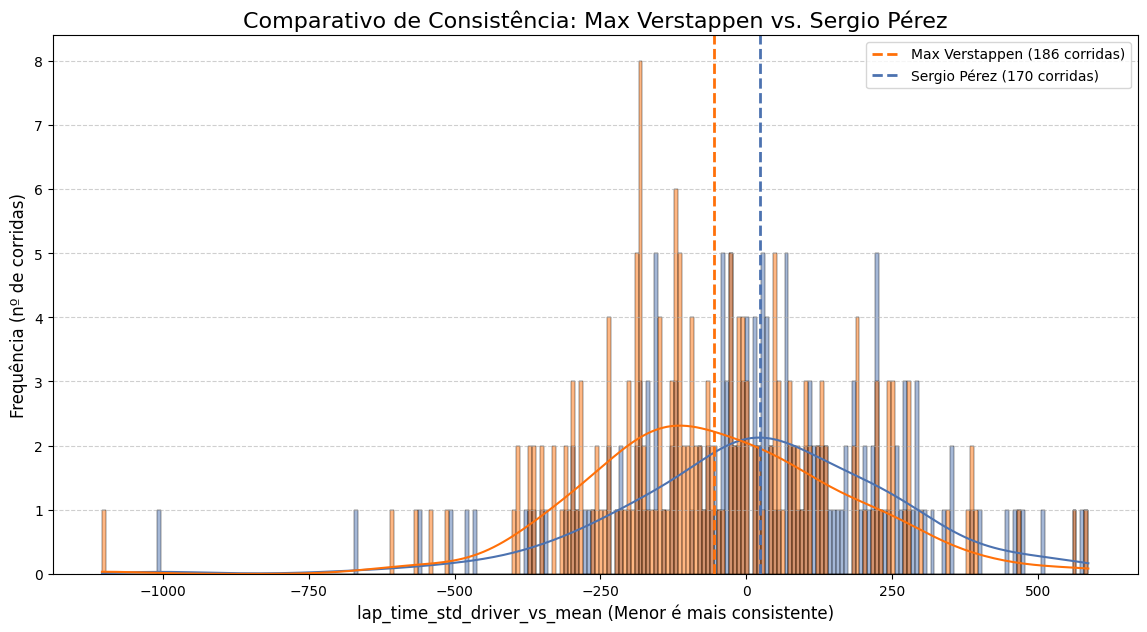

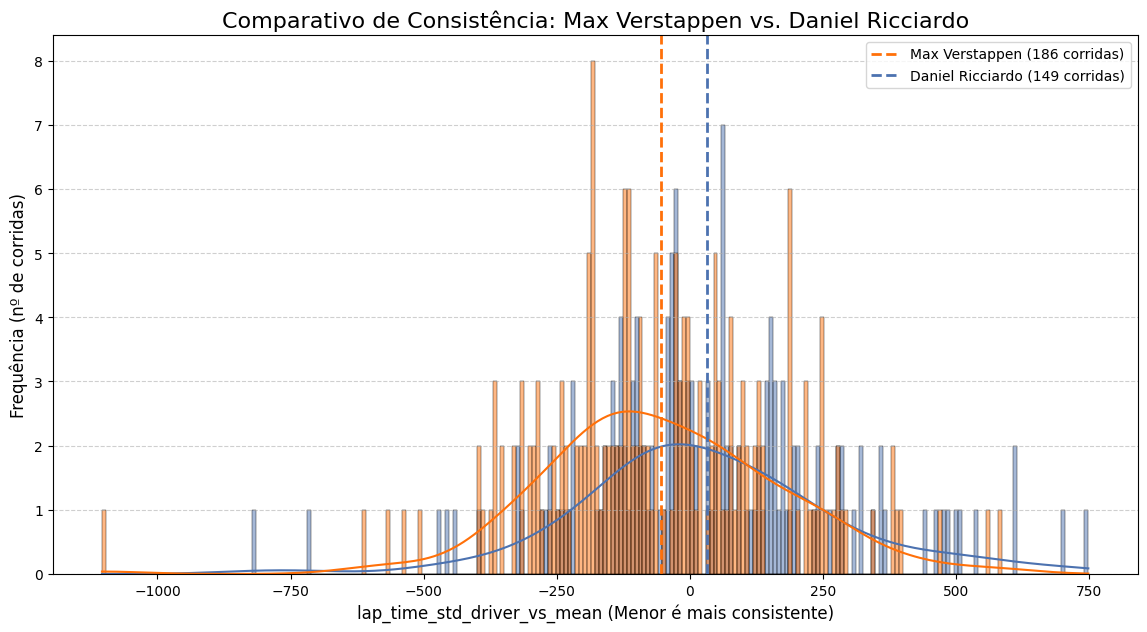

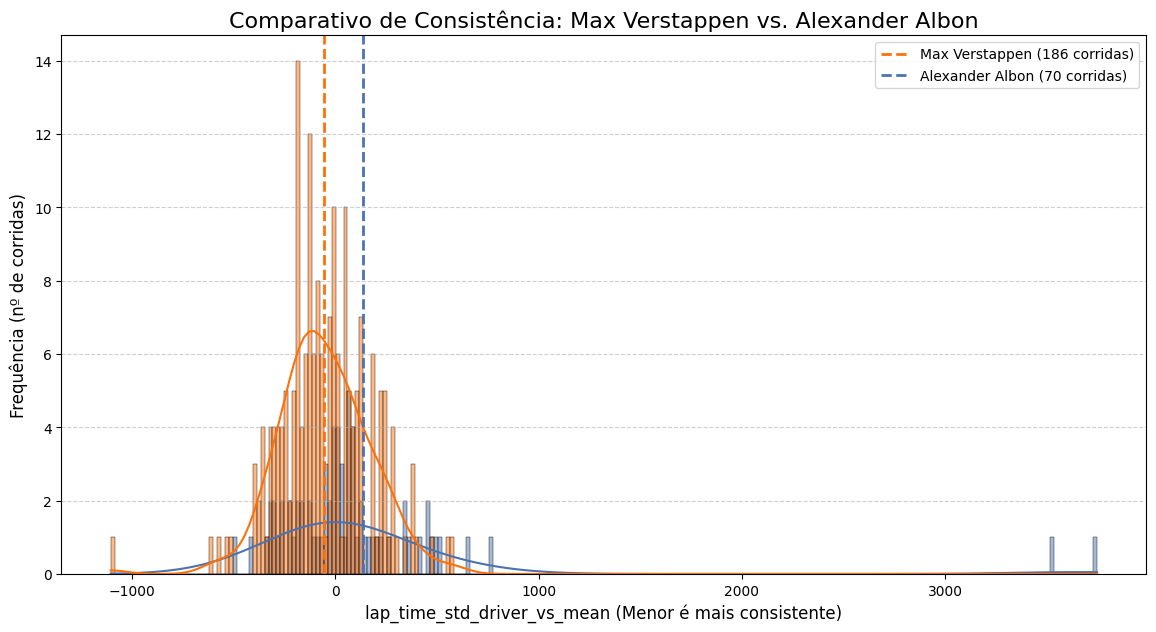

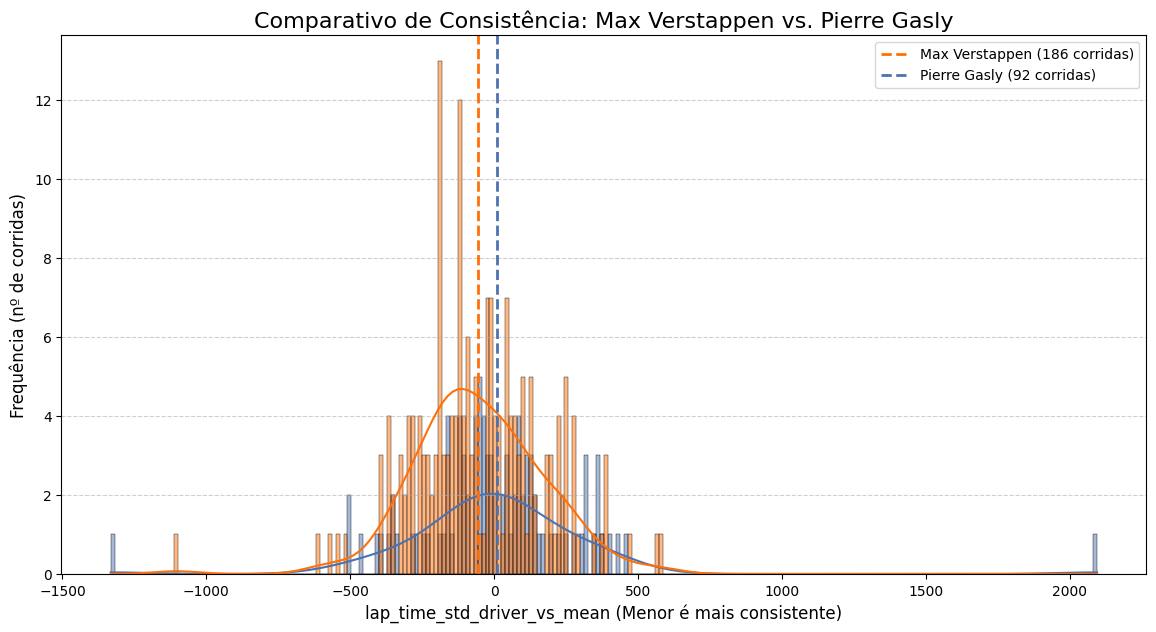

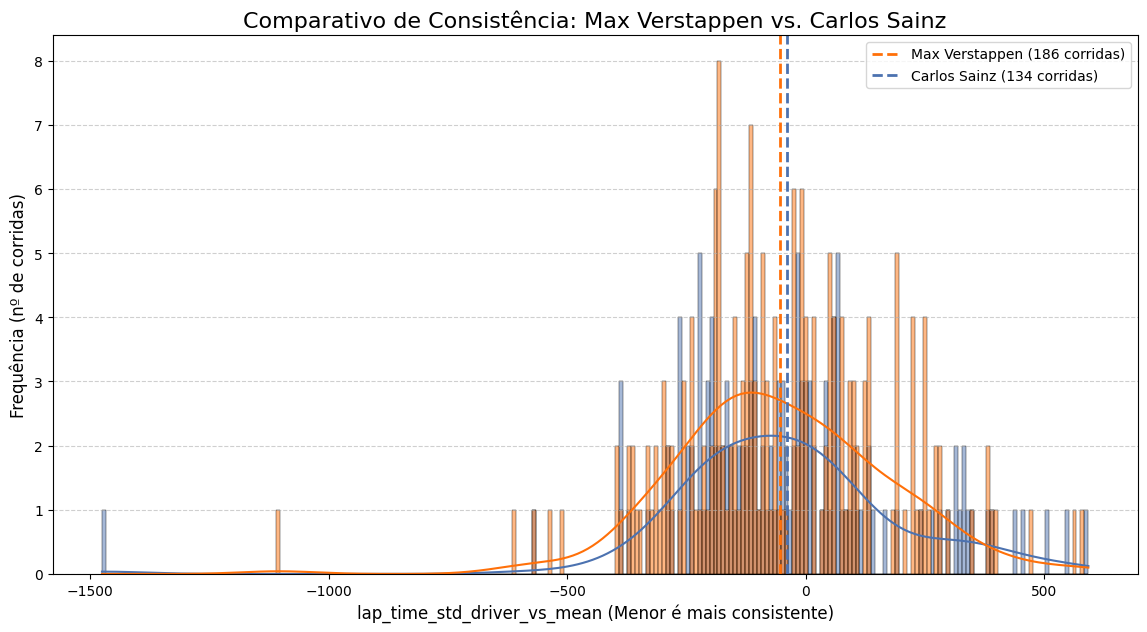

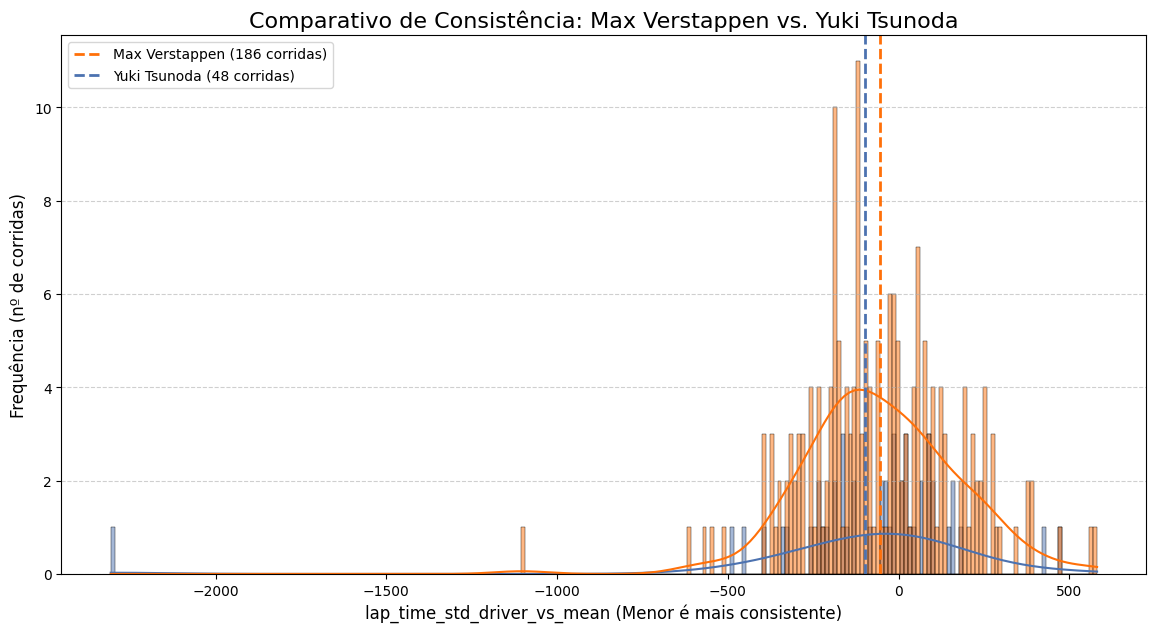

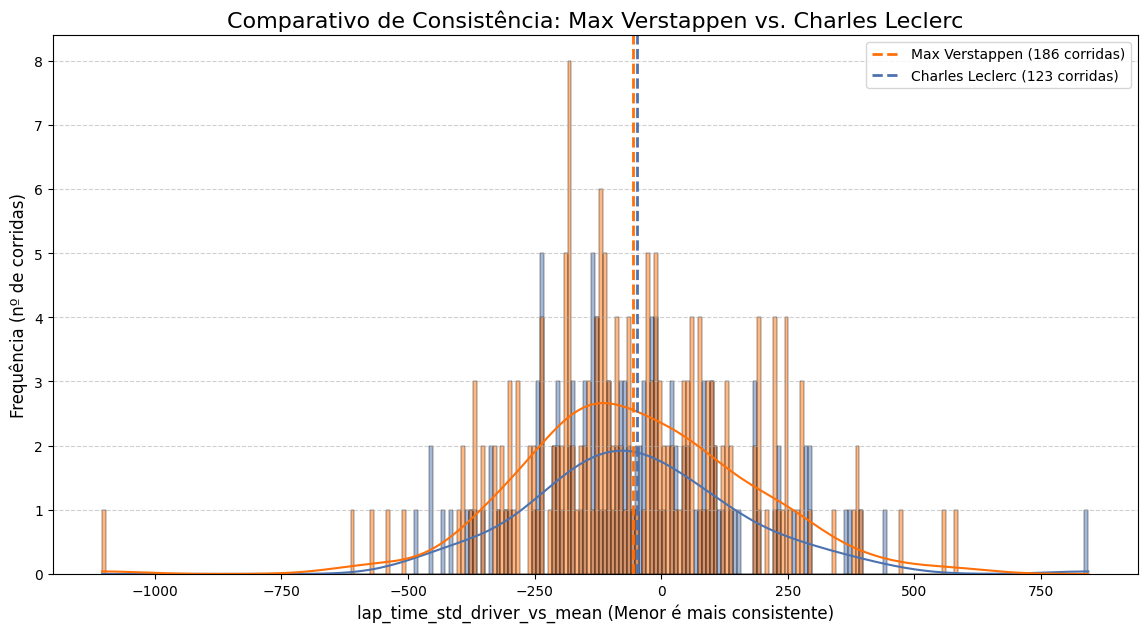

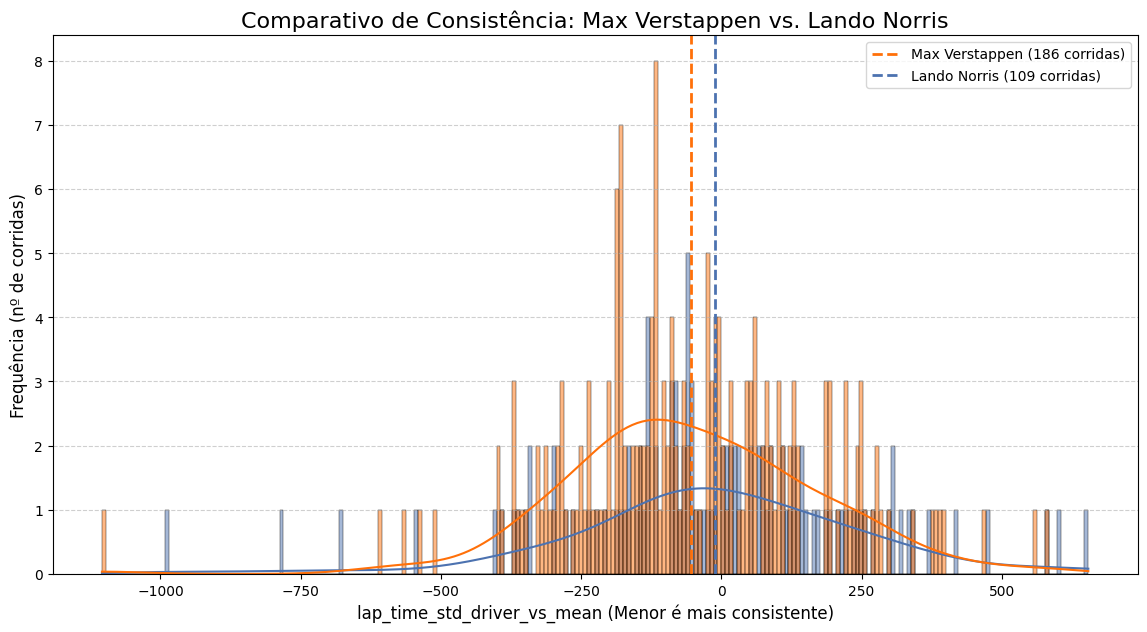

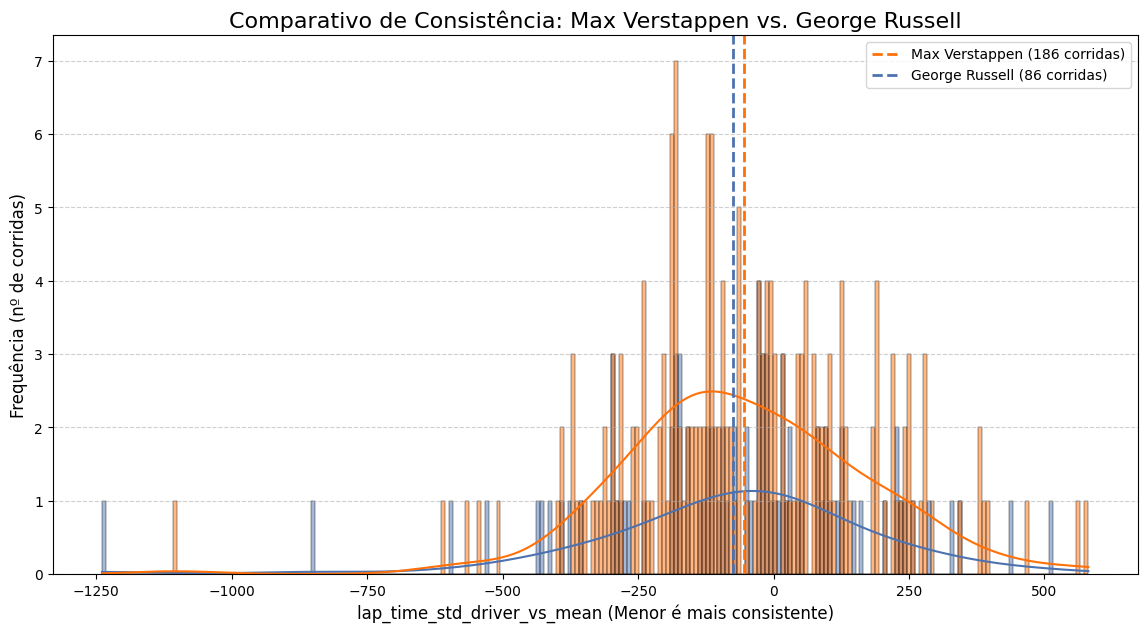

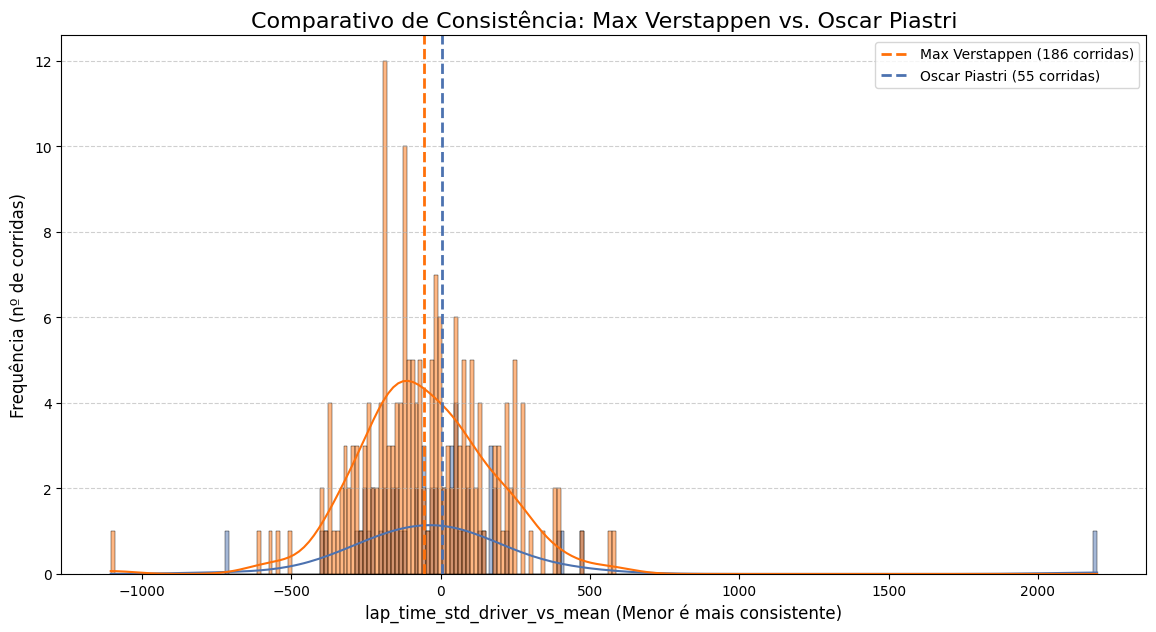

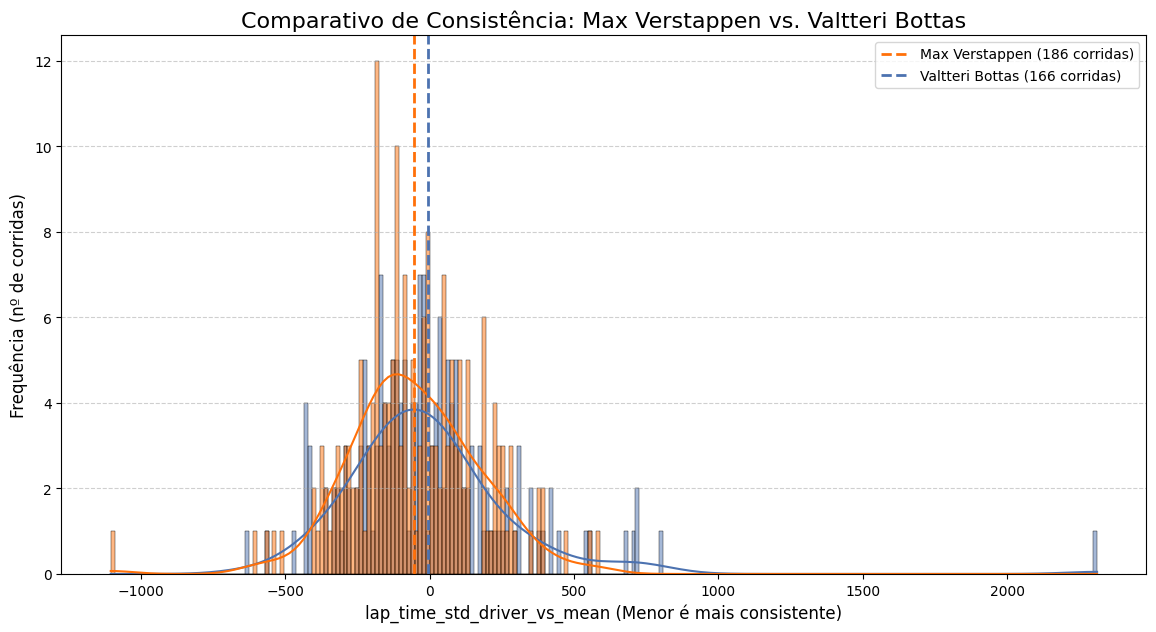

In [36]:
lista_pilotos_a_comparar = [
    # Campeões e Rivais Históricos
    'Lewis Hamilton',
    'Sebastian Vettel',
    'Fernando Alonso',
    'Nico Rosberg',
    'Kimi Räikkönen',
    'Michael Schumacher',
    
    # Companheiros de Equipe (atuais e passados)
    'Sergio Pérez',
    'Daniel Ricciardo',
    'Alexander Albon',
    'Pierre Gasly',
    'Carlos Sainz',
    'Yuki Tsunoda',
    
    # Nova Geração e Rivais Atuais
    'Charles Leclerc',
    'Lando Norris',
    'George Russell',
    'Oscar Piastri',
    'Valtteri Bottas'
]

fxns.comparar_consistencia_pilotos_hist(
    df_consistencia=df_lap_times_std,
    pilotos_a_comparar=lista_pilotos_a_comparar,
    metrica='lap_time_std_driver_vs_mean',
    bins=250
)


Bom, eu acredito que cheguei em alguma análise com um bom critério, porque os resultados nas comparações acima foram "consistentes" (risos):

- O Verstappen parece possuir uma consistência fora do normal, olhando cada gráfico acima, a média de seu desvio padrão relativo é menor do que todos os outros pilotos que estamos trazendo na comparação.
- Um piloto que chega bem perto (tendo uma quantidade muito alta de corridas também, o que é mais um reforço em termos de consistência) é ninguém mais, ninguém menos que Lewis Hamilton (que surpresa)...
- Interessante ver George Russel com altíssima consistência;

Para tentar simplificar essa visão de comparação de médias, podemos ir direto nisso também:



In [37]:
df_lap_times_std

race_name  year driver_full_name  lap_time_std  \
0     70th Anniversary Grand Prix  2020  Alexander Albon   1549.280959   
1     70th Anniversary Grand Prix  2020     Carlos Sainz   1092.583107   
2     70th Anniversary Grand Prix  2020  Charles Leclerc   1102.407961   
3     70th Anniversary Grand Prix  2020     Daniil Kvyat   1271.997637   
4     70th Anniversary Grand Prix  2020     Esteban Ocon   1102.583734   
...                           ...   ...              ...           ...   
5352     United States Grand Prix  2024   Max Verstappen    724.766712   
5353     United States Grand Prix  2024  Nico Hülkenberg   1248.924967   
5354     United States Grand Prix  2024    Oscar Piastri   1125.157024   
5355     United States Grand Prix  2024     Pierre Gasly   1007.196723   
5356     United States Grand Prix  2024     Sergio Pérez   1118.916827   

      lap_time_mean  lap_time_std_mean  lap_time_std_driver_vs_mean  
0      91788.659574        1120.971797                   428.309162  
1      92355.744681        1120.971797                   -28.388690  
2      91942.979592        1120.971797                   -18.563837  
3      92375.425532        1120.971797                   151.025840  
4      92689.326531        1120.971797                   -18.388063  
...             ...                ...                          ...  
5352   99301.780000        1115.039457                  -390.272744  
5353  100093.760000        1115.039457                   133.885510  
5354   99355.720000        1115.039457                    10.117567  
5355  100499.840000        1115.039457                  -107.842734  
5356  100076.460000        1115.039457                     3.877370  

[5357 rows x 7 columns]

In [38]:
df_lap_times_std_agrup = df_lap_times_std[
    # Quero só trazer uma era mais "moderna", por exemplo, não vejo sentido em comparar com Senna, por n motivos
    (df_lap_times_std['year']>2010) &\
    (df_lap_times_std['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen', 'Lance Stroll', 'Yuki Tsunoda']))
    ].groupby( 
    by=[
        'driver_full_name',
    ]
).agg(
    {
        'lap_time_std_driver_vs_mean':'mean'
    }
).reset_index()

df_lap_times_std_agrup.sort_values('lap_time_std_driver_vs_mean', ascending=True)

driver_full_name  lap_time_std_driver_vs_mean
18        Yuki Tsunoda                   -99.032264
5       George Russell                   -74.127030
10      Max Verstappen                   -54.800470
2      Charles Leclerc                   -48.302433
1         Carlos Sainz                   -39.042686
4      Fernando Alonso                   -34.858907
6       Kimi Räikkönen                   -33.460668
15    Sebastian Vettel                   -32.626240
9       Lewis Hamilton                   -18.340348
8         Lando Norris                   -10.413458
12        Nico Rosberg                    -9.010929
17     Valtteri Bottas                    -4.590958
7         Lance Stroll                     2.575904
13       Oscar Piastri                     3.562653
14        Pierre Gasly                     8.611283
16        Sergio Pérez                    23.809362
3     Daniel Ricciardo                    31.817042
0      Alexander Albon                   138.724495
11  Michael Schumacher                   139.238868

C:\Users\jvsen\AppData\Local\Temp\ipykernel_31388\637851152.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lap_time_std_driver_vs_mean', y='driver_full_name', data=df_lap_times_std_agrup, palette=palette, ax=ax)


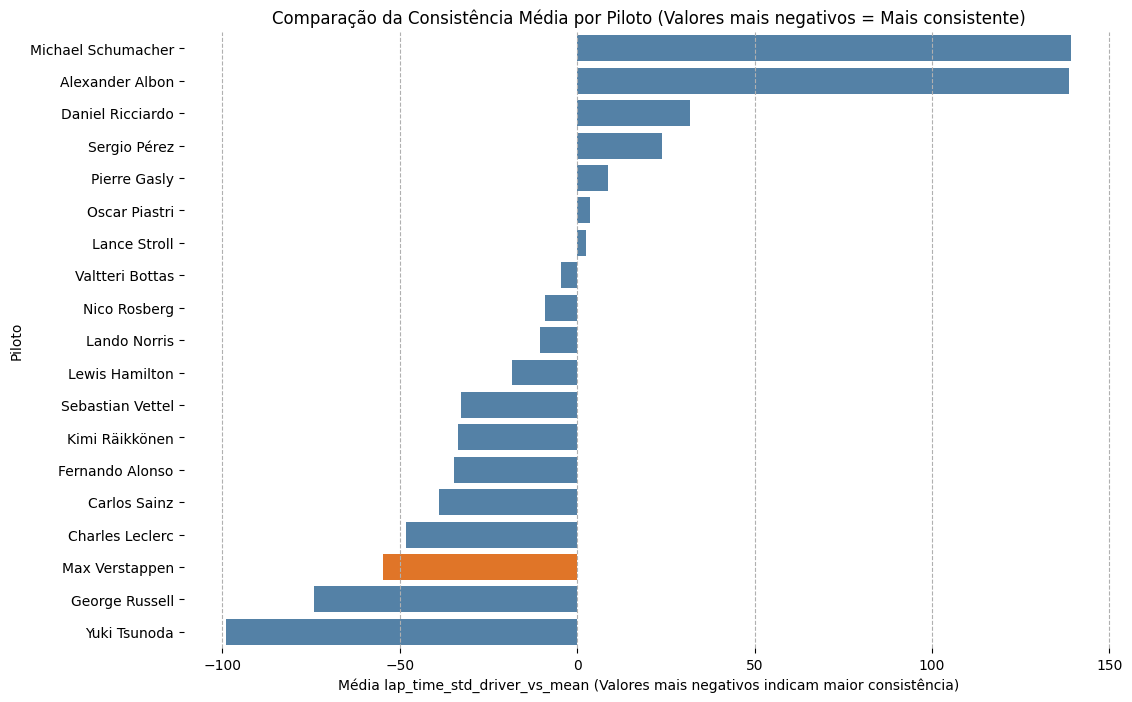

In [39]:
# Define a cor laranja para o Verstappen
cor_verstappen = "#FF7009"

# Cria a paleta de cores.  Outros pilotos serão azuis.
palette = {piloto: cor_verstappen if piloto == 'Max Verstappen' else 'steelblue' for piloto in df_lap_times_std_agrup['driver_full_name']}

# Ordena o DataFrame para que o piloto mais consistente apareça no topo
df_lap_times_std_agrup = df_lap_times_std_agrup.sort_values('lap_time_std_driver_vs_mean', ascending=False)

# Cria o gráfico
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='lap_time_std_driver_vs_mean', y='driver_full_name', data=df_lap_times_std_agrup, palette=palette, ax=ax)

# Adiciona rótulos e título
ax.set_xlabel('Média lap_time_std_driver_vs_mean (Valores mais negativos indicam maior consistência)')
ax.set_ylabel('Piloto')
ax.set_title('Comparação da Consistência Média por Piloto (Valores mais negativos = Mais consistente)')

# Adiciona grid para facilitar a leitura
ax.grid(axis='x', linestyle='--')

# Remove as bordas do gráfico
sns.despine(left=True, bottom=True)

# Mostra o gráfico
plt.show()

Max Verstappen se apresenta como o piloto mais consistente da análise:

- Seguido de George Russel, o que é bem interessante;
- Vemos outros grandes nomes da F1, muitos que já foram campeões, todos se apresentando como mais consistentes do que a média.
- Depois, podemos ver alguns outros nomes que se apresentam menos consistentes do que a média. 

*Obs: Coitado do Alexander Albon, no caso dele, eu diria que as equipes das quais fez parte possuem forte influência nisso, eu o considero um bom piloto*

## Comparação com Companheiro de Equipe (Head 2 Head):

Como mencionei no começo do documento, pensei em duas formas de analisar a capacidade individual do piloto, tentando isolar a influência de sua equipe.

A primeira foi a análise de consistência que apresentei acima, tomando como métrica de "qualidade" para o piloto, a sua consistência de tempo de volta.

A segunda forma vai ser a que eu vou tentar trazer agora, comparando a performance 

### Vou separar a análise em 3 partes:

- Resultados e pontuação de campeonato;
- Resultados de qualificação e tempos de voltas;
- Resultados de corridas (aqui posso tentar olhar usar um pouco do dataset acima pra comparar diretamente companheiros de equipe);



Vou detalhando abaixo conforme for avançando com a análise...

### Head 2 Head no Campeonato:

Como as quantidades de corridas etc vão variando ao longo dos anos, se torna um tanto difícil de eu comparar pontuações historicamente entre diferentes pilotos pois o campeonato foi evoluindo em termos de estrutura ao longo dos anos. Portanto, pra não mergulhar em uma seara muito específica, essa análise de campeonato vai ser um pouco mais breve, porque eu acho que as descobertas aqui são mais suscetíveis a discussões que podem levar a uma imensidão de considerações e desconsiderações a serem feitas.

In [40]:
df_championship = f1_db.run_query_file("data/db_queries/drivers_standings.sql").drop_duplicates()
df_championship

round_id  year             race_name  driver_id      driver_ref  \
0        1143.0  2025  Singapore Grand Prix        857         piastri   
1        1143.0  2025  Singapore Grand Prix        845          norris   
2        1143.0  2025  Singapore Grand Prix        831  max_verstappen   
3        1143.0  2025  Singapore Grand Prix        847         russell   
4        1143.0  2025  Singapore Grand Prix        843         leclerc   
...         ...   ...                   ...        ...             ...   
35079       1.0  1950    British Grand Prix          1          farina   
35080       1.0  1950    British Grand Prix          2         fagioli   
35081       1.0  1950    British Grand Prix          3     reg_parnell   
35082       1.0  1950    British Grand Prix          4       cabantous   
35083       1.0  1950    British Grand Prix          5          rosier   

       driver_number driver_code driver_forename driver_surname  \
0               81.0         PIA           Oscar        Piastri   
1                4.0         NOR           Lando         Norris   
2               33.0         VER             Max     Verstappen   
3               63.0         RUS          George        Russell   
4               16.0         LEC         Charles        Leclerc   
...              ...         ...             ...            ...   
35079            NaN        None            Nino         Farina   
35080            NaN        None           Luigi        Fagioli   
35081            NaN        None             Reg        Parnell   
35082            NaN        None            Yves      Cabantous   
35083            NaN        None           Louis         Rosier   

      driver_full_name  points  position  wins  
0        Oscar Piastri   336.0       1.0     7  
1         Lando Norris   314.0       2.0     5  
2       Max Verstappen   273.0       3.0     4  
3       George Russell   237.0       4.0     2  
4      Charles Leclerc   173.0       5.0     0  
...                ...     ...       ...   ...  
35079      Nino Farina     9.0       1.0     1  
35080    Luigi Fagioli     6.0       2.0     0  
35081      Reg Parnell     4.0       3.0     0  
35082   Yves Cabantous     3.0       4.0     0  
35083     Louis Rosier     2.0       5.0     0  

[35084 rows x 13 columns]

In [41]:
# Nesse dataset, provavelmente vou acabar usando apenas a última etapa do campeonato, pra ver a posição no final
# Então, o que eu posso fazer é criar uma flag pra identificar isso

df_championship['last_round_id'] = df_championship.groupby(['year'])['round_id'].transform('max')

df_championship['last_round_of_year_flag'] = df_championship['round_id'] == df_championship['last_round_id']

df_championship = df_championship.drop(columns=['last_round_id'])

df_championship

round_id  year             race_name  driver_id      driver_ref  \
0        1143.0  2025  Singapore Grand Prix        857         piastri   
1        1143.0  2025  Singapore Grand Prix        845          norris   
2        1143.0  2025  Singapore Grand Prix        831  max_verstappen   
3        1143.0  2025  Singapore Grand Prix        847         russell   
4        1143.0  2025  Singapore Grand Prix        843         leclerc   
...         ...   ...                   ...        ...             ...   
35079       1.0  1950    British Grand Prix          1          farina   
35080       1.0  1950    British Grand Prix          2         fagioli   
35081       1.0  1950    British Grand Prix          3     reg_parnell   
35082       1.0  1950    British Grand Prix          4       cabantous   
35083       1.0  1950    British Grand Prix          5          rosier   

       driver_number driver_code driver_forename driver_surname  \
0               81.0         PIA           Oscar        Piastri   
1                4.0         NOR           Lando         Norris   
2               33.0         VER             Max     Verstappen   
3               63.0         RUS          George        Russell   
4               16.0         LEC         Charles        Leclerc   
...              ...         ...             ...            ...   
35079            NaN        None            Nino         Farina   
35080            NaN        None           Luigi        Fagioli   
35081            NaN        None             Reg        Parnell   
35082            NaN        None            Yves      Cabantous   
35083            NaN        None           Louis         Rosier   

      driver_full_name  points  position  wins  last_round_of_year_flag  
0        Oscar Piastri   336.0       1.0     7                     True  
1         Lando Norris   314.0       2.0     5                     True  
2       Max Verstappen   273.0       3.0     4                     True  
3       George Russell   237.0       4.0     2                     True  
4      Charles Leclerc   173.0       5.0     0                     True  
...                ...     ...       ...   ...                      ...  
35079      Nino Farina     9.0       1.0     1                    False  
35080    Luigi Fagioli     6.0       2.0     0                    False  
35081      Reg Parnell     4.0       3.0     0                    False  
35082   Yves Cabantous     3.0       4.0     0                    False  
35083     Louis Rosier     2.0       5.0     0                    False  

[35084 rows x 14 columns]

In [42]:
# Podemos olhar aqui rapidamente, o histórico de Verstappen ao final dos campeonatos:

df_championship_ver = df_championship[(df_championship['last_round_of_year_flag']) & (df_championship['driver_ref']=='max_verstappen')]

# Vou adicionar a equipe dele, só pra contribuir pra análise:
df_championship_ver = pd.merge(
    left=df_championship_ver,
    right=df_races[['round_id', 'driver_ref', 'constructor_name']],
    on=['driver_ref', 'round_id']
)

df_championship_ver

round_id  year             race_name  driver_id      driver_ref  \
0     1143.0  2025  Singapore Grand Prix        831  max_verstappen   
1     1125.0  2024  Abu Dhabi Grand Prix        831  max_verstappen   
2     1101.0  2023  Abu Dhabi Grand Prix        831  max_verstappen   
3     1079.0  2022  Abu Dhabi Grand Prix        831  max_verstappen   
4     1057.0  2021  Abu Dhabi Grand Prix        831  max_verstappen   
5     1035.0  2020  Abu Dhabi Grand Prix        831  max_verstappen   
6     1018.0  2019  Abu Dhabi Grand Prix        831  max_verstappen   
7      997.0  2018  Abu Dhabi Grand Prix        831  max_verstappen   
8      976.0  2017  Abu Dhabi Grand Prix        831  max_verstappen   
9      956.0  2016  Abu Dhabi Grand Prix        831  max_verstappen   
10     935.0  2015  Abu Dhabi Grand Prix        831  max_verstappen   

    driver_number driver_code driver_forename driver_surname driver_full_name  \
0            33.0         VER             Max     Verstappen   Max Verstappen   
1            33.0         VER             Max     Verstappen   Max Verstappen   
2            33.0         VER             Max     Verstappen   Max Verstappen   
3            33.0         VER             Max     Verstappen   Max Verstappen   
4            33.0         VER             Max     Verstappen   Max Verstappen   
5            33.0         VER             Max     Verstappen   Max Verstappen   
6            33.0         VER             Max     Verstappen   Max Verstappen   
7            33.0         VER             Max     Verstappen   Max Verstappen   
8            33.0         VER             Max     Verstappen   Max Verstappen   
9            33.0         VER             Max     Verstappen   Max Verstappen   
10           33.0         VER             Max     Verstappen   Max Verstappen   

    points  position  wins  last_round_of_year_flag constructor_name  
0    273.0       3.0     4                     True         Red Bull  
1    437.0       1.0     9                     True         Red Bull  
2    575.0       1.0    19                     True         Red Bull  
3    454.0       1.0    15                     True         Red Bull  
4    395.5       1.0    10                     True         Red Bull  
5    214.0       3.0     2                     True         Red Bull  
6    278.0       3.0     3                     True         Red Bull  
7    249.0       4.0     2                     True         Red Bull  
8    168.0       6.0     2                     True         Red Bull  
9    204.0       5.0     1                     True         Red Bull  
10    49.0      12.0     0                     True       Toro Rosso

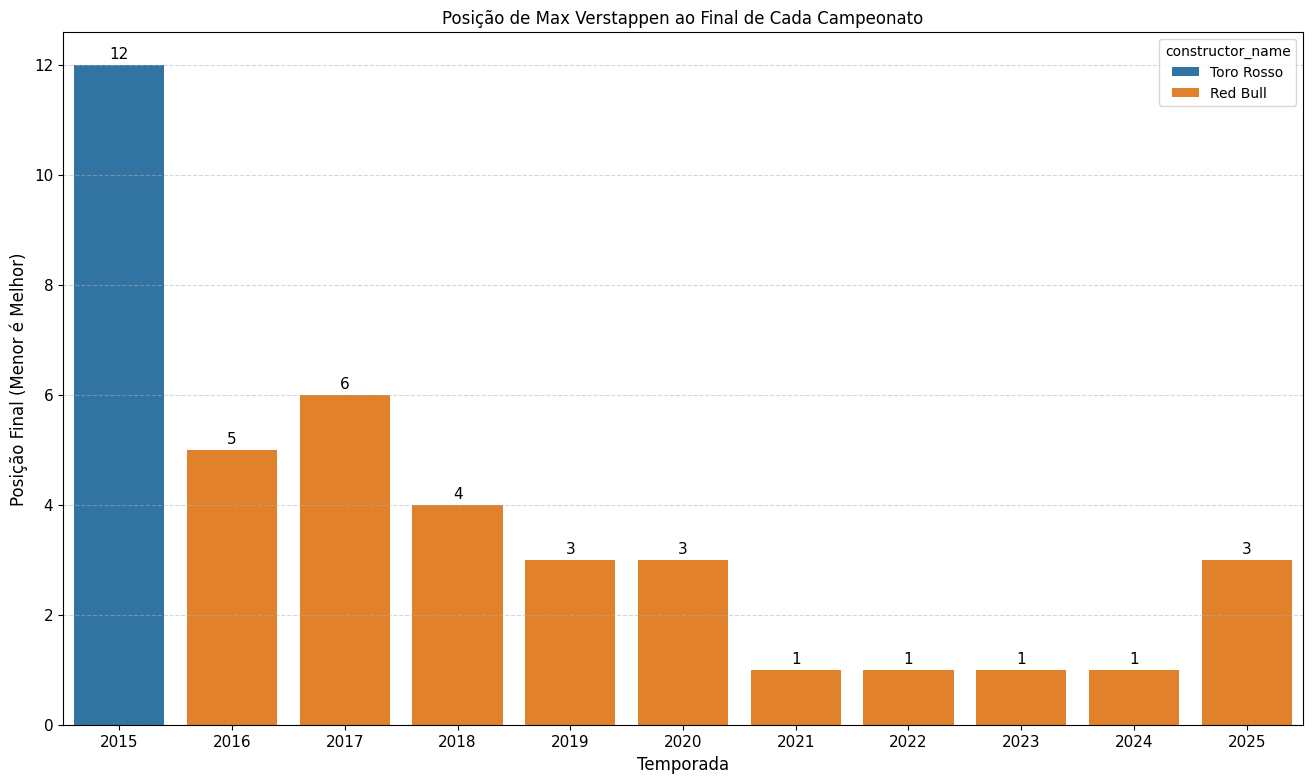

In [43]:
fig, ax = plt.subplots(figsize=(16, 9))

# Grade de fundo (leve, só no eixo Y)
ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

sns.barplot(
    data=df_championship_ver,
    x='year',
    y='position',
    ax=ax,
    hue='constructor_name'
)

# Adicionar os valores (posições) em cima das barras
for p in ax.patches[0:-2]: # Tive que fazer esse indexing pq tem um 0 aleatório que fica aparecendo no gráfico (?)
    ax.annotate(
        f'{p.get_height():.0f}',        # O valor (posição, ex: "1")
        (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
        ha='center', va='center',       # Centralizado na barra
        xytext=(0, 8),                  # Offset de 8 pontos para cima
        textcoords='offset points',
        fontsize=11,
    )

ax.set_title(
    "Posição de Max Verstappen ao Final de Cada Campeonato",
)

# Labels mais claros
ax.set_xlabel("Temporada", fontsize=12)
ax.set_ylabel("Posição Final (Menor é Melhor)", fontsize=12)

# Ajuste de ticks
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)


Acima, podemos ver o histórico de desempenho do Verstappen ao final de cada temporada.

In [44]:
df_championship_vs = fxns.add_colunas_companheiro_equipe(
    df_dados=df_championship[df_championship['last_round_of_year_flag']],
    metricas=['position', 'wins', 'points'],
    df_lookup=df_races
)

In [45]:
df_championship_vs

round_id  year             race_name  driver_id      driver_ref  \
0       1143.0  2025  Singapore Grand Prix        857         piastri   
1       1143.0  2025  Singapore Grand Prix        845          norris   
2       1143.0  2025  Singapore Grand Prix        831  max_verstappen   
3       1143.0  2025  Singapore Grand Prix        847         russell   
4       1143.0  2025  Singapore Grand Prix        843         leclerc   
...        ...   ...                   ...        ...             ...   
3139       7.0  1950    Italian Grand Prix          8       etancelin   
3140       7.0  1950    Italian Grand Prix         68         bonetto   
3141       7.0  1950    Italian Grand Prix         72         chaboud   
3142       7.0  1950    Italian Grand Prix         38    bettenhausen   
3143       7.0  1950    Italian Grand Prix         39        chitwood   

      driver_number driver_code driver_forename driver_surname  \
0              81.0         PIA           Oscar        Piastri   
1               4.0         NOR           Lando         Norris   
2              33.0         VER             Max     Verstappen   
3              63.0         RUS          George        Russell   
4              16.0         LEC         Charles        Leclerc   
...             ...         ...             ...            ...   
3139            NaN        None        Philippe      Étancelin   
3140            NaN        None          Felice        Bonetto   
3141            NaN        None          Eugène        Chaboud   
3142            NaN        None            Tony   Bettenhausen   
3143            NaN        None            Joie       Chitwood   

        driver_full_name  ...  position  wins  last_round_of_year_flag  \
0          Oscar Piastri  ...       1.0     7                     True   
1           Lando Norris  ...       2.0     5                     True   
2         Max Verstappen  ...       3.0     4                     True   
3         George Russell  ...       4.0     2                     True   
4        Charles Leclerc  ...       5.0     0                     True   
...                  ...  ...       ...   ...                      ...   
3139  Philippe Étancelin  ...      18.0     0                     True   
3140      Felice Bonetto  ...      19.0     0                     True   
3141      Eugène Chaboud  ...      20.0     0                     True   
3142   Tony Bettenhausen  ...      21.0     0                     True   
3143       Joie Chitwood  ...      22.0     0                     True   

      position_tmate  wins_tmate  points_tmate  driver_ref_tmate  \
0                2.0         5.0         314.0            norris   
1                1.0         7.0         336.0           piastri   
2               17.0         0.0          20.0           tsunoda   
3                7.0         0.0          88.0         antonelli   
4                6.0         0.0         125.0          hamilton   
...              ...         ...           ...               ...   
3139             NaN         0.0           0.0             claes   
3140             NaN         NaN           NaN               NaN   
3141             NaN         0.0           0.0            gerard   
3142             NaN         0.0           0.0            gerard   
3143             NaN         0.0           0.0            gerard   

     position_diff_tmate  wins_diff_tmate  points_diff_tmate  
0                   -1.0              2.0               22.0  
1                    1.0             -2.0              -22.0  
2                  -14.0              4.0              253.0  
3                   -3.0              2.0              149.0  
4                   -1.0              0.0               48.0  
...                  ...              ...                ...  
3139                 NaN              0.0                3.0  
3140                 NaN              NaN                NaN  
3141                 NaN              0.0                1.0  


In [46]:
# Podemos agora tratar um pouco esse dataset pra ter insights:

df_championship_vs_filtrado = df_championship_vs[df_championship_vs['driver_full_name'].isin(['Max Verstappen'] + lista_pilotos_a_comparar)]

df_championship_vs_agrup = df_championship_vs_filtrado.groupby(
    by=['driver_ref', 'driver_full_name']
).agg(
    {
        'position_diff_tmate':'mean',
        'wins_diff_tmate':'mean',
        'points_diff_tmate':'mean'
    }
).reset_index()

# A coluna de position_diff é negativa quando o piloto fica a frente, só pro gráfico ficar mais intuitivo depois, eu vou inverter o sinal
df_championship_vs_agrup['position_diff_tmate'] = df_championship_vs_agrup['position_diff_tmate']*(-1)

df_championship_vs_agrup

driver_ref    driver_full_name  position_diff_tmate  \
0                albon     Alexander Albon             1.166667   
1               alonso     Fernando Alonso             4.333333   
2               bottas     Valtteri Bottas             0.666667   
3                gasly        Pierre Gasly             4.777778   
4             hamilton      Lewis Hamilton             1.368421   
5              leclerc     Charles Leclerc             2.000000   
6       max_verstappen      Max Verstappen             3.454545   
7   michael_schumacher  Michael Schumacher             0.823529   
8               norris        Lando Norris             0.285714   
9                perez        Sergio Pérez             0.142857   
10             piastri       Oscar Piastri            -1.333333   
11           raikkonen      Kimi Räikkönen             1.388889   
12           ricciardo    Daniel Ricciardo            -0.142857   
13             rosberg        Nico Rosberg             2.636364   
14             russell      George Russell             0.714286   
15               sainz        Carlos Sainz            -0.363636   
16             tsunoda        Yuki Tsunoda            -2.000000   
17              vettel    Sebastian Vettel             1.750000   

    wins_diff_tmate  points_diff_tmate  
0         -0.833333         -37.000000  
1          1.136364          53.318182  
2         -3.333333         -37.208333  
3          0.111111          31.222222  
4          3.000000          39.026316  
5          0.375000          36.937500  
6          5.272727         136.681818  
7          3.789474          24.447368  
8         -0.142857          34.714286  
9         -3.357143         -60.321429  
10         0.000000         -56.000000  
11        -0.388889          -6.722222  
12         0.214286          -0.285714  
13        -0.818182           4.318182  
14         0.428571          22.571429  
15        -0.181818         -11.500000  
16        -0.800000         -61.000000  
17         2.375000          43.718750

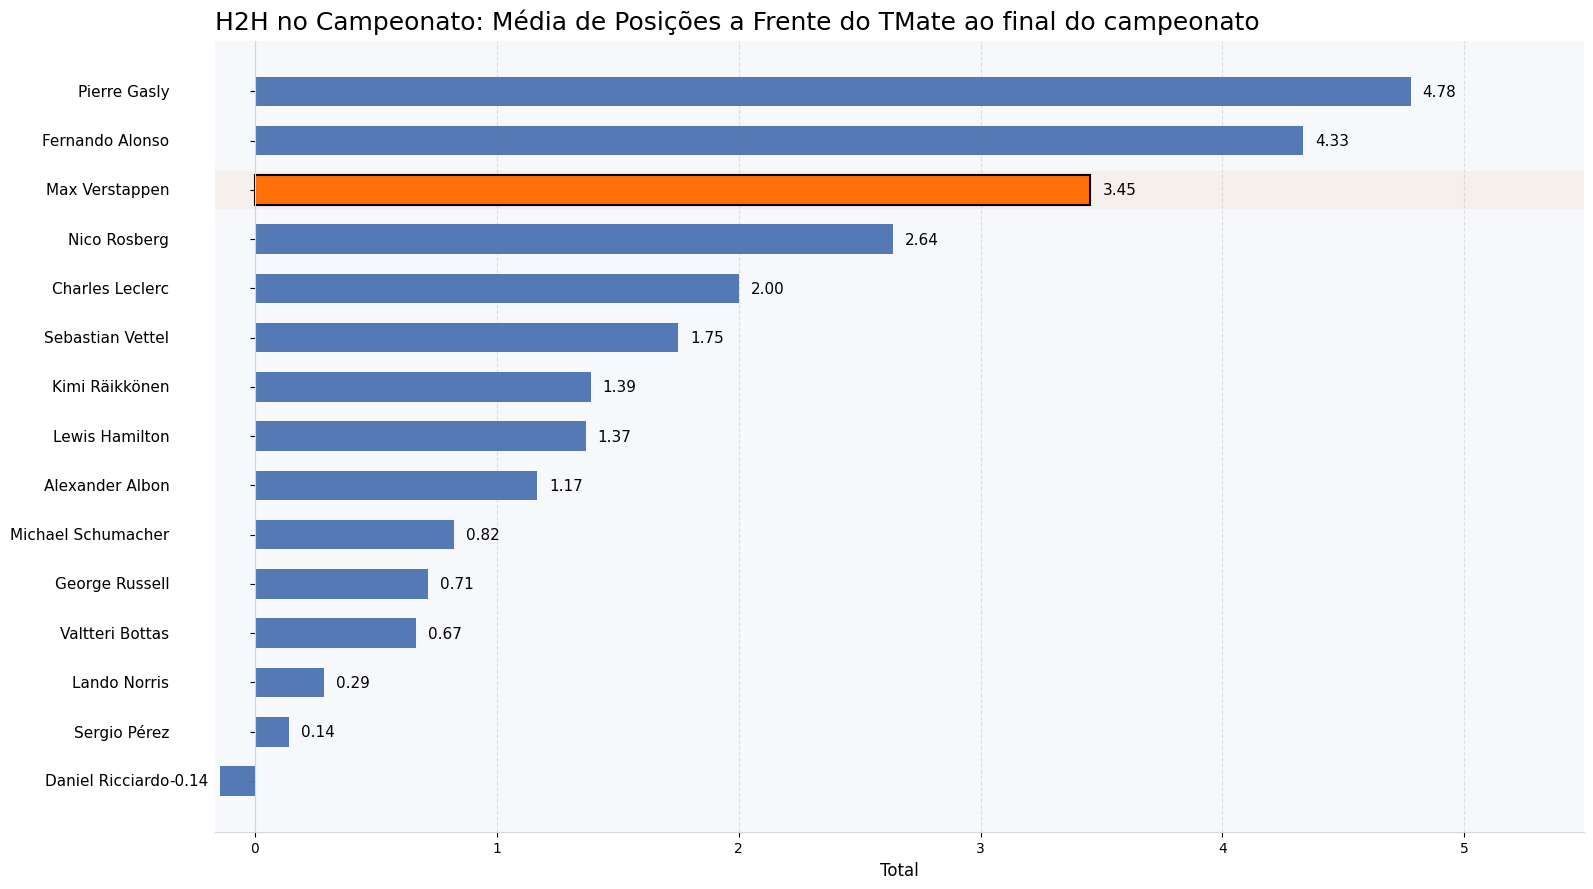

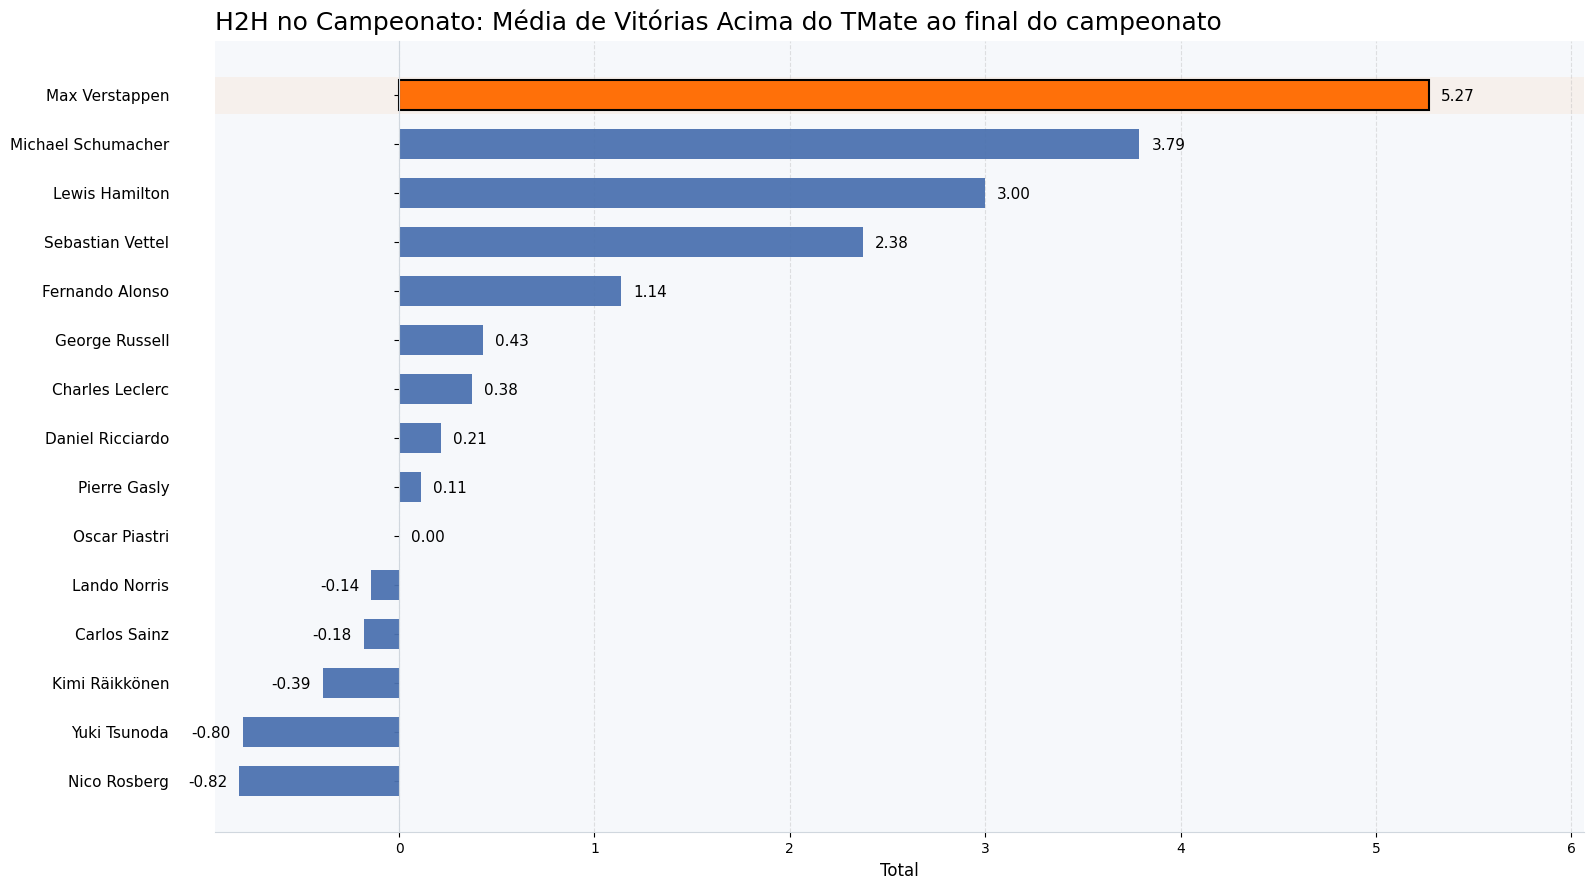

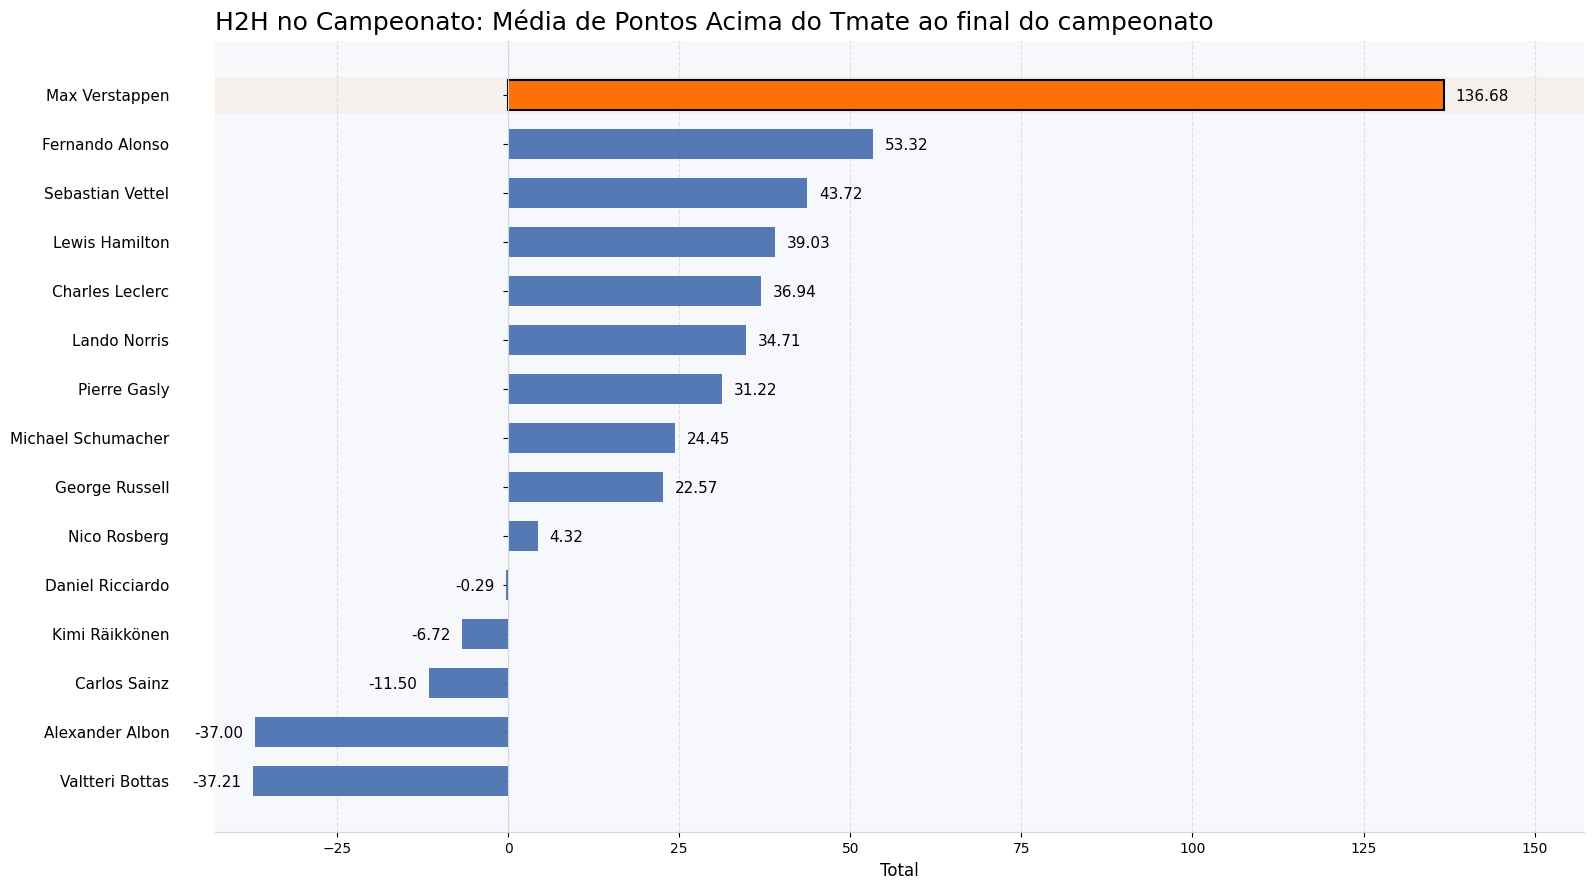

In [47]:
dict_cols_plot = {
    'position_diff_tmate':'Média de Posições a Frente do TMate',
    'wins_diff_tmate':'Média de Vitórias Acima do TMate',
    'points_diff_tmate':'Média de Pontos Acima do Tmate'
}

for col_valor, traducao in dict_cols_plot.items():

    fxns.graf_top_pilotos(
        df=df_championship_vs_agrup,
        col_valor=col_valor,
        titulo=f'H2H no Campeonato: {traducao} ao final do campeonato',
        top_n=15,
        valor_format_str="{:,.2f}",
        figsize=(16,9)
    )

Acima nós podemos ver, respectivamente:

- **Média de quantas posições o piloto estava a frente de seu companheiro de equipe**, ou seja, podemos interpretar, que em média, o Gasly fica quase 5 posições acima de seu companheiro de equipe ao final do campeonato (piloto underrated?)
    - Nesse gráfico, podemos ver que o Verstappen aparece em terceiro lugar, e isso por si só é muioto bom. Mas tem uma consideração aqui, eu diria que o 3.45 do VER é "diferente" que o 4.33 do ALO por mais do que pareça óbvio o que estou dizendo, e digo isso porque o Verstappen vem dominando muitos campeonatos historicamente, sendo que o VER, depois de seu primeiro campeonato na F1, que terminou em 12o, as suas piores posições ao final de um campeonato foi de um 6o e um 4o, fora isso ele ficou entre os 3 primeiros em todos os outros campeonatos. Já o Alonso, até por ter disputado muito mais campeonatos e participar de equipes que não estão sempre à frente, existe muito mais trocas de posição e "sensibilidade" aos pontos do que nas primeiras posições (Verstappen está no hardcap enquanto Alonso tem mais posições pra subir frente ao seu companheiro), mas isso, de forma alguma, deixa de mostrar o quão grande piloto o Alonso é, eu só acho que essa análise é um tanto enviesada por ele ter pilotado em equipes que ficam mais atrás no campeonato do que Verstappen (vou deixar de lado que o companheiro de equipe nos últimos anos de Alonso tenha sido o Stroll). Uma linha de raciocínio, na minha visão, também contribui pro valor elevado do Gasly, de novo, de forma que isso não invalida que ele é um bom piloto.

- **Média de vitórias a mais que o companheiro de equipe ao final do campeonato**, ou seja, interpretamos que o Verstappen ganha, em média, 5.3 corridas a mais que o seu companheiro de equipe ao final do campeonato.
    - Isso é muito interessante, e acho que é uma das características mais marcantes dos campeonatos do Verstappen historicamente, ele costuma despontar muito de seu companheiro de equipe, e isso é traduzido aqui, ele é, em média, o piloto que tem a maior quantidade de vitórias a mais que seu companheiro de equipe quando o ano termina.

- **Média de Pontos acima do companheiro de equipe ao final do campeonato**, ou seja, interpretamos, que, em média, Verstappen termina o campeonato 136 pontos acima de seu companheiro de equipe, o que é meio bizarro, e foi muito elevado nos últimos anos com o Perez que não estava conseguindo performar, mas também por outros pilotos em que isso aconteceu (sim, existe um padrão aqui e meu objetivo não vai ser tentar analisar isso especificamente, podemos passar muitas horas discutindo pq os companheiros de equipe do Verstappen não performam bem, mas eu já mencionei no início que tenho a premissa que os carros entre companheiros de equipe tem o mesmo potencial de performance, pra não correr o risco de entrar em uma tangente absurda).


O que consigo extrair da análise acima, é que, resumidamente, o Verstappen costuma se "descolar" mais de seu companheiro de equipe ao longo do campeonato do que outros pilotos, levando a tese de que é um piloto que consegue extrair mais do carro do que outros pilotos conseguiriam.

### H2H na Qualificação

Mencionei acima que uma outra forma de abordarmos a comparação com o companheiro de equipe seria através do resultado de qualificação, então vamos lá e, como sempre, vou explicando ao longo da análise:

#### Percentual de "vitórias" em qualificação

Uma primeira, e simples abordagem, é ver o percentual de vitórias contra o companheiro de equipe em qualificação. A ideia é que quanto maior o percentual de vitória, "melhor" é o piloto, dado que ele performou melhor contra alguém que estava com o mesmo "equipamento" que ele.

Obs.: eu uso o termo "vitória" de forma mais genérica aqui, a ideia é ver quem qualificou na frente, é isso que eu to considerando como "vitória", não de fato ter ganhado a corrida.  

In [48]:
df_quali = f1_db.run_query_file("data/db_queries/qualify_report.sql")
df_quali = fxns.add_lap_time_ms_column(df_quali, lap_time_col='best_lap_time')

In [49]:
fxns.filtrar_evento(df_quali, year=2015, driver_full_name='Carlos Sainz')

race_name  year  round_id   race_date  \
9341       Abu Dhabi Grand Prix  2015       935  2015-11-29   
9361       Abu Dhabi Grand Prix  2015       935  2015-11-29   
9375       Abu Dhabi Grand Prix  2015       935  2015-11-29   
9387       Brazilian Grand Prix  2015       934  2015-11-15   
9407       Brazilian Grand Prix  2015       934  2015-11-15   
9431         Mexican Grand Prix  2015       933  2015-11-01   
9451         Mexican Grand Prix  2015       933  2015-11-01   
9485   United States Grand Prix  2015       932  2015-10-25   
9556        Japanese Grand Prix  2015       930  2015-09-27   
9576        Japanese Grand Prix  2015       930  2015-09-27   
9600       Singapore Grand Prix  2015       929  2015-09-20   
9620       Singapore Grand Prix  2015       929  2015-09-20   
9644         Italian Grand Prix  2015       928  2015-09-06   
9664         Italian Grand Prix  2015       928  2015-09-06   
9685         Belgian Grand Prix  2015       927  2015-08-23   
9705         Belgian Grand Prix  2015       927  2015-08-23   
9718         Belgian Grand Prix  2015       927  2015-08-23   
9730       Hungarian Grand Prix  2015       926  2015-07-26   
9750       Hungarian Grand Prix  2015       926  2015-07-26   
9770         British Grand Prix  2015       925  2015-07-05   
9790         British Grand Prix  2015       925  2015-07-05   
9805         British Grand Prix  2015       925  2015-07-05   
9820        Austrian Grand Prix  2015       924  2015-06-21   
9840        Austrian Grand Prix  2015       924  2015-06-21   
9862        Canadian Grand Prix  2015       923  2015-06-07   
9881        Canadian Grand Prix  2015       923  2015-06-07   
9903          Monaco Grand Prix  2015       922  2015-05-24   
9923          Monaco Grand Prix  2015       922  2015-05-24   
9938          Monaco Grand Prix  2015       922  2015-05-24   
9945         Spanish Grand Prix  2015       921  2015-05-10   
9965         Spanish Grand Prix  2015       921  2015-05-10   
9980         Spanish Grand Prix  2015       921  2015-05-10   
9994         Bahrain Grand Prix  2015       920  2015-04-19   
10013        Bahrain Grand Prix  2015       920  2015-04-19   
10028        Bahrain Grand Prix  2015       920  2015-04-19   
10043        Chinese Grand Prix  2015       919  2015-04-12   
10063        Chinese Grand Prix  2015       919  2015-04-12   
10089      Malaysian Grand Prix  2015       918  2015-03-29   
10108      Malaysian Grand Prix  2015       918  2015-03-29   
10126     Australian Grand Prix  2015       917  2015-03-15   
10144     Australian Grand Prix  2015       917  2015-03-15   
10159     Australian Grand Prix  2015       917  2015-03-15   

                   circuit_name circuit_locality circuit_country  driver_id  \
9341       Abu Dhabi Grand Prix        Abu Dhabi             UAE        830   
9361       Abu Dhabi Grand Prix        Abu Dhabi             UAE        830   
9375       Abu Dhabi Grand Prix        Abu Dhabi             UAE        830   
9387       Brazilian Grand Prix        São Paulo          Brazil        830   
9407       Brazilian Grand Prix        São Paulo          Brazil        830   
9431         Mexican Grand Prix      Mexico City          Mexico        830   
9451         Mexican Grand Prix      Mexico City          Mexico        830   
9485   United States Grand Prix           Austin             USA        830   
9556        Japanese Grand Prix           Suzuka           Japan        830   
9576        Japanese Grand Prix           Suzuka           Japan        830   
9600       Singapore Grand Prix       Marina Bay       Singapore        830   
9620       Singapore Grand Prix       Marina Bay       Singapore        830   
9644         Italian Grand Prix            Monza           Italy        830   
9664         Italian Grand Prix            Monza           Italy        830   
9685         Belgian Grand Prix              Spa         Belgium        830   
9705         Belgian Grand Prix              Spa

In [50]:
# Pra não correr o risco de analisar pilotos que possam ter participado de pouquíssimas corridas, vou removê-los da análise:

# Adiciono uma coluna contando de quantos eventos o piloto participou
df_quali['event_count'] = df_quali.groupby(['driver_ref', 'session_type'])['race_name'].transform('count')
# ^^ Aqui eu posso fazer o groupby dessa forma pq todo piloto necessariamente passou pelo Q1, então contar pelo session_type aqui funciona

# Filtro só quem participou de mais do que 20 eventos, isolando pilotos das antigas que participaram de poucas etapas

df_quali = df_quali[df_quali['event_count']>20]

In [51]:
df_quali

race_name  year  round_id   race_date          circuit_name  \
0      Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
1      Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
2      Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
3      Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
6      Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
...                     ...   ...       ...         ...                   ...   
20790  Brazilian Grand Prix  1994       549  1994-03-27  Brazilian Grand Prix   
20791  Brazilian Grand Prix  1994       549  1994-03-27  Brazilian Grand Prix   
20792  Brazilian Grand Prix  1994       549  1994-03-27  Brazilian Grand Prix   
20793  Brazilian Grand Prix  1994       549  1994-03-27  Brazilian Grand Prix   
20795  Brazilian Grand Prix  1994       549  1994-03-27  Brazilian Grand Prix   

      circuit_locality circuit_country  driver_id driver_forename  \
0           Marina Bay       Singapore        795           Lewis   
1           Marina Bay       Singapore        847          George   
2           Marina Bay       Singapore        845           Lando   
3           Marina Bay       Singapore        831             Max   
6           Marina Bay       Singapore        857           Oscar   
...                ...             ...        ...             ...   
20790        São Paulo          Brazil        720           Eddie   
20791        São Paulo          Brazil        655         Gerhard   
20792        São Paulo          Brazil        648          Martin   
20793        São Paulo          Brazil        723         Olivier   
20795        São Paulo          Brazil        679          Johnny   

      driver_surname driver_full_name driver_nationality      driver_ref  \
0           Hamilton   Lewis Hamilton            British        hamilton   
1            Russell   George Russell            British         russell   
2             Norris     Lando Norris            British          norris   
3         Verstappen   Max Verstappen              Dutch  max_verstappen   
6            Piastri    Oscar Piastri         Australian         piastri   
...              ...              ...                ...             ...   
20790         Irvine     Eddie Irvine            British          irvine   
20791         Berger   Gerhard Berger           Austrian          berger   
20792        Brundle   Martin Brundle            British         brundle   
20793          Panis    Olivier Panis             French           panis   
20795        Herbert   Johnny Herbert            British         herbert   

      constructor_name constructor_nationality  position best_lap_time  \
0              Ferrari                 Italian         1  00:01:29.765   
1             Mercedes                  German         2  00:01:29.928   
2              McLaren                 British         3  00:01:29.932   
3             Red Bull                Austrian         4  00:01:30.028   
6              McLaren                 British         7  00:01:30.313   
...                ...                     ...       ...           ...   
20790           Jordan                   Irish        16  00:01:18.751   
20791          Ferrari                 Italian        17  00:01:18.855   
20792          McLaren                 British        18  00:01:18.864   
20793           Ligier                  French        19  00:01:19.304   
20795       Team Lotus                 British        21  00:01:19.483   

      session_type  best_lap_time_ms  event_count  
0               Q1           89765.0          374  
1               Q1           89928.0          146  
2               Q1           89932.0          146  
3               Q1           90028.0          227  
6               Q1           90313.0           64  
...            ...               ...          ...  
20790           QB           78751.0           64 

In [52]:
# Quero filtrar apenas a última sessão em que cada piloto chegou (tem gente que só vai pro Q1 etc)
# Não vou analisar sessão por sessão, ou seja, não quero Q1 vs Q1 etc, quero só até onde cada piloto chegou e vou ver a performance na quali como um todo

df_quali_valid = fxns.get_final_quali_session(df_quali)

In [53]:
df_quali_valid

race_name  year  round_id   race_date          circuit_name  \
18080    Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
18085    Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
18076    Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
18088    Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
18077    Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
...                     ...   ...       ...         ...                   ...   
34     Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
39     Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
10     Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
8      Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
15     Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   

      circuit_locality circuit_country  driver_id driver_forename  \
18080           Sakhir         Bahrain        703         Michael   
18085           Sakhir         Bahrain        715          Rubens   
18076           Sakhir         Bahrain        728           David   
18088           Sakhir         Bahrain        744       Giancarlo   
18077           Sakhir         Bahrain        747           Jarno   
...                ...             ...        ...             ...   
34          Marina Bay       Singapore        851            Yuki   
39          Marina Bay       Singapore        857           Oscar   
10          Marina Bay       Singapore        858            Liam   
8           Marina Bay       Singapore        859          Oliver   
15          Marina Bay       Singapore        860          Franco   

      driver_surname      driver_full_name driver_nationality  \
18080     Schumacher    Michael Schumacher             German   
18085    Barrichello    Rubens Barrichello          Brazilian   
18076      Coulthard       David Coulthard            British   
18088     Fisichella  Giancarlo Fisichella            Italian   
18077         Trulli          Jarno Trulli            Italian   
...              ...                   ...                ...   
34           Tsunoda          Yuki Tsunoda           Japanese   
39           Piastri         Oscar Piastri         Australian   
10            Lawson           Liam Lawson      New Zealander   
8            Bearman        Oliver Bearman            British   
15         Colapinto      Franco Colapinto          Argentine   

               driver_ref constructor_name constructor_nationality  \
18080  michael_schumacher          Ferrari                 Italian   
18085         barrichello            Honda                Japanese   
18076           coulthard         Red Bull                Austrian   
18088          fisichella          Renault                  French   
18077              trulli           Toyota                Japanese   
...                   ...              ...                     ...   
34                tsunoda         Red Bull                Austrian   
39                piastri          McLaren                 British   
10                 lawson       RB F1 Team                 Italian   
8                 bearman     Haas F1 Team                American   
15              colapinto   Alpine F1 Team                  French   

       final_quali_position best_lap_time session_type  best_lap_time_ms  \
18080                     1  00:01:31.431           Q3           91431.0   
18085                     6  00:01:32.579           Q3           92579.0   
18076                    13   00:01:32.85           Q2           92850.0   
18088                     9  00:01:33.496           Q3           93496.0   
18077                    14  00:01:33.066           Q2           93066.0   
...                     ...           ...          ...               ...   
34                       13  00:01:30.353           Q2        

In [54]:
# Agora vou trazer as informações sobre o companheiro de equipe pra comparar as métricas:

df_quali_vs = fxns.add_colunas_companheiro_equipe(
    df_dados=df_quali_valid,
    metricas=['best_lap_time_ms', 'final_quali_position'],
    colunas_id_tmate=['driver_ref', 'driver_full_name', 'session_type'] # Vou trazer até qual sessão o companheiro chegou, vai ser útil pra depois, confia
)

df_quali_vs.sort_values('round_id', ascending=False)

race_name  year  round_id   race_date          circuit_name  \
7964  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7965  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7963  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7960  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7961  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
...                    ...   ...       ...         ...                   ...   
11      Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
3       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
2       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
1       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
0       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   

     circuit_locality circuit_country  driver_id driver_forename  \
7964       Marina Bay       Singapore        859          Oliver   
7965       Marina Bay       Singapore        860          Franco   
7963       Marina Bay       Singapore        858            Liam   
7960       Marina Bay       Singapore        847          George   
7961       Marina Bay       Singapore        851            Yuki   
...               ...             ...        ...             ...   
11             Sakhir         Bahrain        769          Takuma   
3              Sakhir         Bahrain        744       Giancarlo   
2              Sakhir         Bahrain        728           David   
1              Sakhir         Bahrain        715          Rubens   
0              Sakhir         Bahrain        703         Michael   

     driver_surname  ... session_type best_lap_time_ms event_count  \
7964        Bearman  ...           Q1          90420.0          21   
7965      Colapinto  ...           Q1          90982.0          21   
7963         Lawson  ...           Q1          90681.0          29   
7960        Russell  ...           Q3          89158.0          82   
7961        Tsunoda  ...           Q2          90353.0          76   
...             ...  ...          ...              ...         ...   
11             Sato  ...           Q1          97411.0          39   
3        Fisichella  ...           Q3          93496.0          27   
2         Coulthard  ...           Q2          92850.0          39   
1       Barrichello  ...           Q3          92579.0          45   
0        Schumacher  ...           Q3          91431.0          45   

     best_lap_time_ms_tmate final_quali_position_tmate  driver_ref_tmate  \
7964                90989.0                       17.0              ocon   
7965                91261.0                       18.0             gasly   
7963                    NaN                        NaN               NaN   
7960                    NaN                        NaN               NaN   
7961                89340.0                        2.0    max_verstappen   
...                     ...                        ...               ...   
11                      NaN                        NaN               NaN   
3                   91702.0                        4.0            alonso   
2                       NaN                        NaN               NaN   
1                   91549.0                        3.0            button   
0                   91478.0                        2.0             massa   

     driver_full_name_tmate session_type_tmate  best_lap_time_ms_diff_tmate  \
7964           Esteban Ocon                 Q1                       -569.0   
7965           Pierre Gasly                 Q1                       -279.0   
7963                    NaN                NaN                          NaN   
7960                    NaN                NaN                          NaN   
7961         Max Verstappen                 Q3                       1013.0   
...        

In [55]:
# Vou colocar uma flag indicando se o piloto "ganhou" do tmate dele naquele evento de qualificação

df_quali_vs['fl_win_quali_vs_tmate'] = df_quali_vs['final_quali_position'] < df_quali_vs['final_quali_position_tmate']

df_quali_vs

race_name  year  round_id   race_date          circuit_name  \
0       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
1       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
2       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
3       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
4       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
...                    ...   ...       ...         ...                   ...   
7961  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7962  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7963  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7964  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7965  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   

     circuit_locality circuit_country  driver_id driver_forename  \
0              Sakhir         Bahrain        703         Michael   
1              Sakhir         Bahrain        715          Rubens   
2              Sakhir         Bahrain        728           David   
3              Sakhir         Bahrain        744       Giancarlo   
4              Sakhir         Bahrain        747           Jarno   
...               ...             ...        ...             ...   
7961       Marina Bay       Singapore        851            Yuki   
7962       Marina Bay       Singapore        857           Oscar   
7963       Marina Bay       Singapore        858            Liam   
7964       Marina Bay       Singapore        859          Oliver   
7965       Marina Bay       Singapore        860          Franco   

     driver_surname  ... best_lap_time_ms event_count best_lap_time_ms_tmate  \
0        Schumacher  ...          91431.0          45                91478.0   
1       Barrichello  ...          92579.0          45                91549.0   
2         Coulthard  ...          92850.0          39                    NaN   
3        Fisichella  ...          93496.0          27                91702.0   
4            Trulli  ...          93066.0          65                94702.0   
...             ...  ...              ...         ...                    ...   
7961        Tsunoda  ...          90353.0          76                89340.0   
7962        Piastri  ...          89524.0          55                89586.0   
7963         Lawson  ...          90681.0          29                    NaN   
7964        Bearman  ...          90420.0          21                90989.0   
7965      Colapinto  ...          90982.0          21                91261.0   

     final_quali_position_tmate driver_ref_tmate  driver_full_name_tmate  \
0                           2.0            massa            Felipe Massa   
1                           3.0           button           Jenson Button   
2                           NaN              NaN                     NaN   
3                           4.0           alonso         Fernando Alonso   
4                          17.0  ralf_schumacher         Ralf Schumacher   
...                         ...              ...                     ...   
7961                        2.0   max_verstappen          Max Verstappen   
7962                        5.0           norris            Lando Norris   
7963                        NaN              NaN                     NaN   
7964                       17.0             ocon            Esteban Ocon   
7965                       18.0            gasly            Pierre Gasly   

     session_type_tmate best_lap_time_ms_diff_tmate  \
0                    Q3                       -47.0   
1                    Q3                      1030.0   
2                   NaN                         NaN   
3                    Q3                      1794.0   
4                    Q1                     -1636.0   
...                 ...            

In [56]:
df_quali_vs[(df_quali_vs['driver_ref']=='max_verstappen') & (df_quali_vs['driver_ref_tmate']=='sainz')]

race_name  year  round_id   race_date  \
3540     Australian Grand Prix  2015       917  2015-03-15   
3558      Malaysian Grand Prix  2015       918  2015-03-29   
3576        Chinese Grand Prix  2015       919  2015-04-12   
3593        Bahrain Grand Prix  2015       920  2015-04-19   
3611        Spanish Grand Prix  2015       921  2015-05-10   
3629         Monaco Grand Prix  2015       922  2015-05-24   
3646       Canadian Grand Prix  2015       923  2015-06-07   
3664       Austrian Grand Prix  2015       924  2015-06-21   
3682        British Grand Prix  2015       925  2015-07-05   
3700      Hungarian Grand Prix  2015       926  2015-07-26   
3718        Belgian Grand Prix  2015       927  2015-08-23   
3736        Italian Grand Prix  2015       928  2015-09-06   
3754      Singapore Grand Prix  2015       929  2015-09-20   
3772       Japanese Grand Prix  2015       930  2015-09-27   
3807  United States Grand Prix  2015       932  2015-10-25   
3825        Mexican Grand Prix  2015       933  2015-11-01   
3843      Brazilian Grand Prix  2015       934  2015-11-15   
3861      Abu Dhabi Grand Prix  2015       935  2015-11-29   
3880     Australian Grand Prix  2016       936  2016-03-20   
3900        Bahrain Grand Prix  2016       937  2016-04-03   
3922        Chinese Grand Prix  2016       938  2016-04-17   
3943        Russian Grand Prix  2016       939  2016-05-01   

                  circuit_name circuit_locality circuit_country  driver_id  \
3540     Australian Grand Prix        Melbourne       Australia        831   
3558      Malaysian Grand Prix     Kuala Lumpur        Malaysia        831   
3576        Chinese Grand Prix         Shanghai           China        831   
3593        Bahrain Grand Prix           Sakhir         Bahrain        831   
3611        Spanish Grand Prix         Montmeló           Spain        831   
3629         Monaco Grand Prix      Monte-Carlo          Monaco        831   
3646       Canadian Grand Prix         Montreal          Canada        831   
3664       Austrian Grand Prix        Spielberg         Austria        831   
3682        British Grand Prix      Silverstone              UK        831   
3700      Hungarian Grand Prix         Budapest         Hungary        831   
3718        Belgian Grand Prix              Spa         Belgium        831   
3736        Italian Grand Prix            Monza           Italy        831   
3754      Singapore Grand Prix       Marina Bay       Singapore        831   
3772       Japanese Grand Prix           Suzuka           Japan        831   
3807  United States Grand Prix           Austin             USA        831   
3825        Mexican Grand Prix      Mexico City          Mexico        831   
3843      Brazilian Grand Prix        São Paulo          Brazil        831   
3861      Abu Dhabi Grand Prix        Abu Dhabi             UAE        831   
3880     Australian Grand Prix        Melbourne       Australia        831   
3900        Bahrain Grand Prix           Sakhir         Bahrain        831   
3922        Chinese Grand Prix         Shanghai           China        831   
3943        Russian Grand Prix            Sochi          Russia        831   

     driver_forename driver_surname  ... best_lap_time_ms event_count  \
3540             Max     Verstappen  ...          88868.0         216   
3558             Max     Verstappen  ...         111981.0         204   
3576             Max     Verstappen  ...          98393.0         216   
3593             Max     Verstappen  ...          95103.0         216   
3611             Max     Verstappen  ...          86249.0         204   
3629             Max     Verstappen  ...          76957.0         204   
3646             Max     Verstappen  ...          76245.0         216   
3664             Max     Verstappen  ...          69612.0         204   
3682             Max     Verstappen  ...          94502.0         216   
3700             Max     Verstappen  ...          83679.0         204

In [57]:
# Agora posso agrupar o dataset pra contar quantidade de "vitórias" em quali para cada piloto

df_quali_vs_agrup = df_quali_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'fl_win_quali_vs_tmate'
    ]
).agg(
    {'round_id':'count'}
).reset_index(
).rename(
    columns={
        'round_id':'qt_rounds'
    }
)

# Adiciono uma coluna calculando o percentual:
# Primeiro calculo a quantidade total:
df_quali_vs_agrup['total_rounds_for_driver'] = df_quali_vs_agrup.groupby(['driver_ref'])['qt_rounds'].transform('sum')

# Calculo o percentual dividindo uma coisa pela outra:
df_quali_vs_agrup['result_percentage'] = df_quali_vs_agrup['qt_rounds'] / df_quali_vs_agrup['total_rounds_for_driver']

# vou filtrar usando a flag, pra ter o percentual apenas referente a quando o piloto ficou na frente de seu companheiro de equipe:
df_quali_vs_agrup_wins = df_quali_vs_agrup[df_quali_vs_agrup['fl_win_quali_vs_tmate']]


In [58]:
df_quali_vs_agrup_wins.sort_values(['result_percentage'], ascending=False)

driver_ref   driver_full_name  fl_win_quali_vs_tmate  qt_rounds  \
55    jules_bianchi      Jules Bianchi                   True         29   
81   max_verstappen     Max Verstappen                   True        180   
7            alonso    Fernando Alonso                   True        267   
21            buemi    Sébastien Buemi                   True         39   
73          leclerc    Charles Leclerc                   True        113   
..              ...                ...                    ...        ...   
1            albers  Christijan Albers                   True          2   
69           latifi    Nicholas Latifi                   True          4   
123        sargeant     Logan Sargeant                   True          2   
83          mazepin     Nikita Mazepin                   True          1   
105       piquet_jr  Nelson Piquet Jr.                   True          1   

     total_rounds_for_driver  result_percentage  
55                        34           0.852941  
81                       227           0.792952  
7                        351           0.760684  
21                        55           0.709091  
73                       167           0.676647  
..                       ...                ...  
1                         27           0.074074  
69                        61           0.065574  
123                       36           0.055556  
83                        22           0.045455  
105                       28           0.035714  

[76 rows x 6 columns]

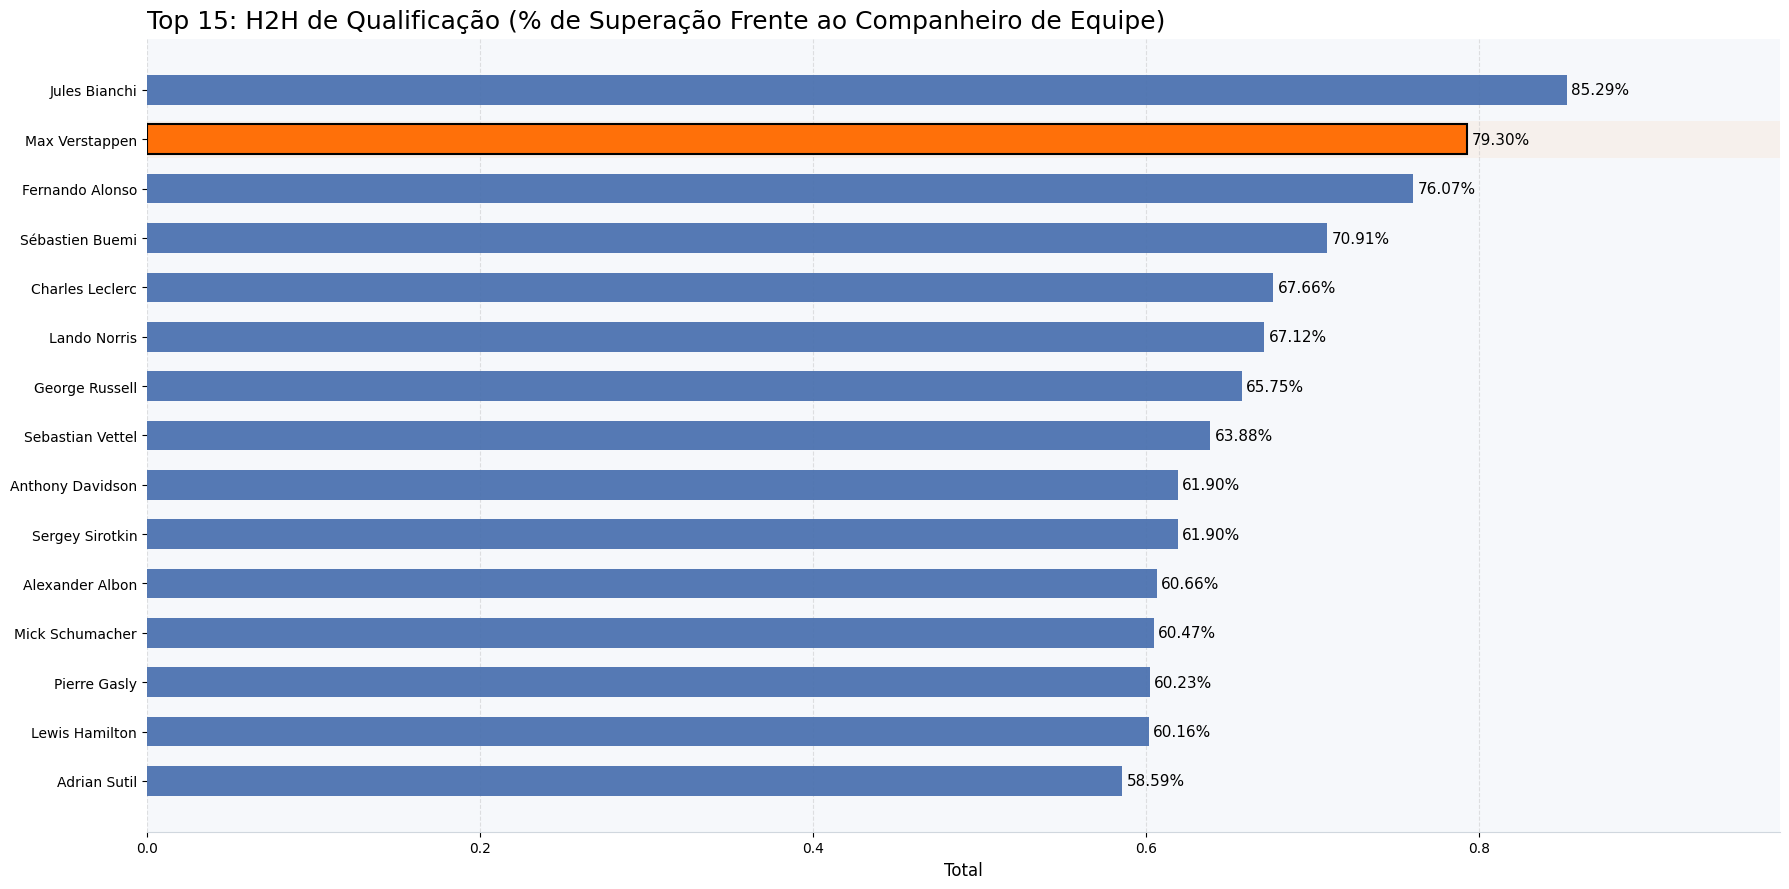

In [59]:
fxns.graf_top_pilotos(
    df=df_quali_vs_agrup_wins,
    top_n=15,
    col_valor='result_percentage',
    valor_format_str='{:.2%}',
    titulo='Top 15: H2H de Qualificação (% de Superação Frente ao Companheiro de Equipe)'
)

Acima, temos os top 15 pilotos com o maior percentual de superação frente ao companheiro de equipe em qualificação. Entenda da seguinte forma: Jules Bianchi qualificou na frente de seu companheiro de equipe em 85,29% das vezes.

Novamente, vemos o Verstappen aparecendo logo depois de Jules Bianchi, e uma observação sobre isso à quem não sabe:
- Jules Bianchi foi um piloto promissor que teve sua carreira interrompida por um trágico acidente no GP de Suzuka de 2014. Ele começou sua carreira na F1 em 2013 e no seu segundo ano da F1 sofreu esse acidente. Sua morte foi a primeira fatalidade decorrente de um acidente na F1 desde Ayrton Senna em 1994 e levou a diversas mudanças nas medidas de segurança nos eventos da F1.
- **Sobre sua breve carreira**: Ele particiou de 34 GPs da F1, todos pela Marussia e correu contra apenas 1 companheiro de equipe, que superou em quase todos eventos de qualificação que participaram. Infelizmente, considero que ele não teve oportunidade de apresentar todo seu potencial na F1. O número apresentado no gráfico acima é uma prova de que era um piloto de qualidade. Mas, o fato é, por ter tido sua carreira tragicamente interrompida, consequentemente não podendo ter alcançado números de GP como de Hamilton, Alonso, Verstappen etc e ter tido apenas um companheiro de equipe durante sua carreira na F1. Veja esse percentual como um número que atesta a sua qualidade como piloto, mas não como uma métrica diretamente comparável ao de outros pilotos que trago no gráfico acima.
- **Novamente Verstappen aparece com números completamente dominadores**: Dentre todos os pilotos da era moderna, e que participaram de uma grande quantidade de GPs, o Verstappen aparece simplesmente superando todos eles. Seguido de Alonso, que tem um percentual muito surpreendente também.

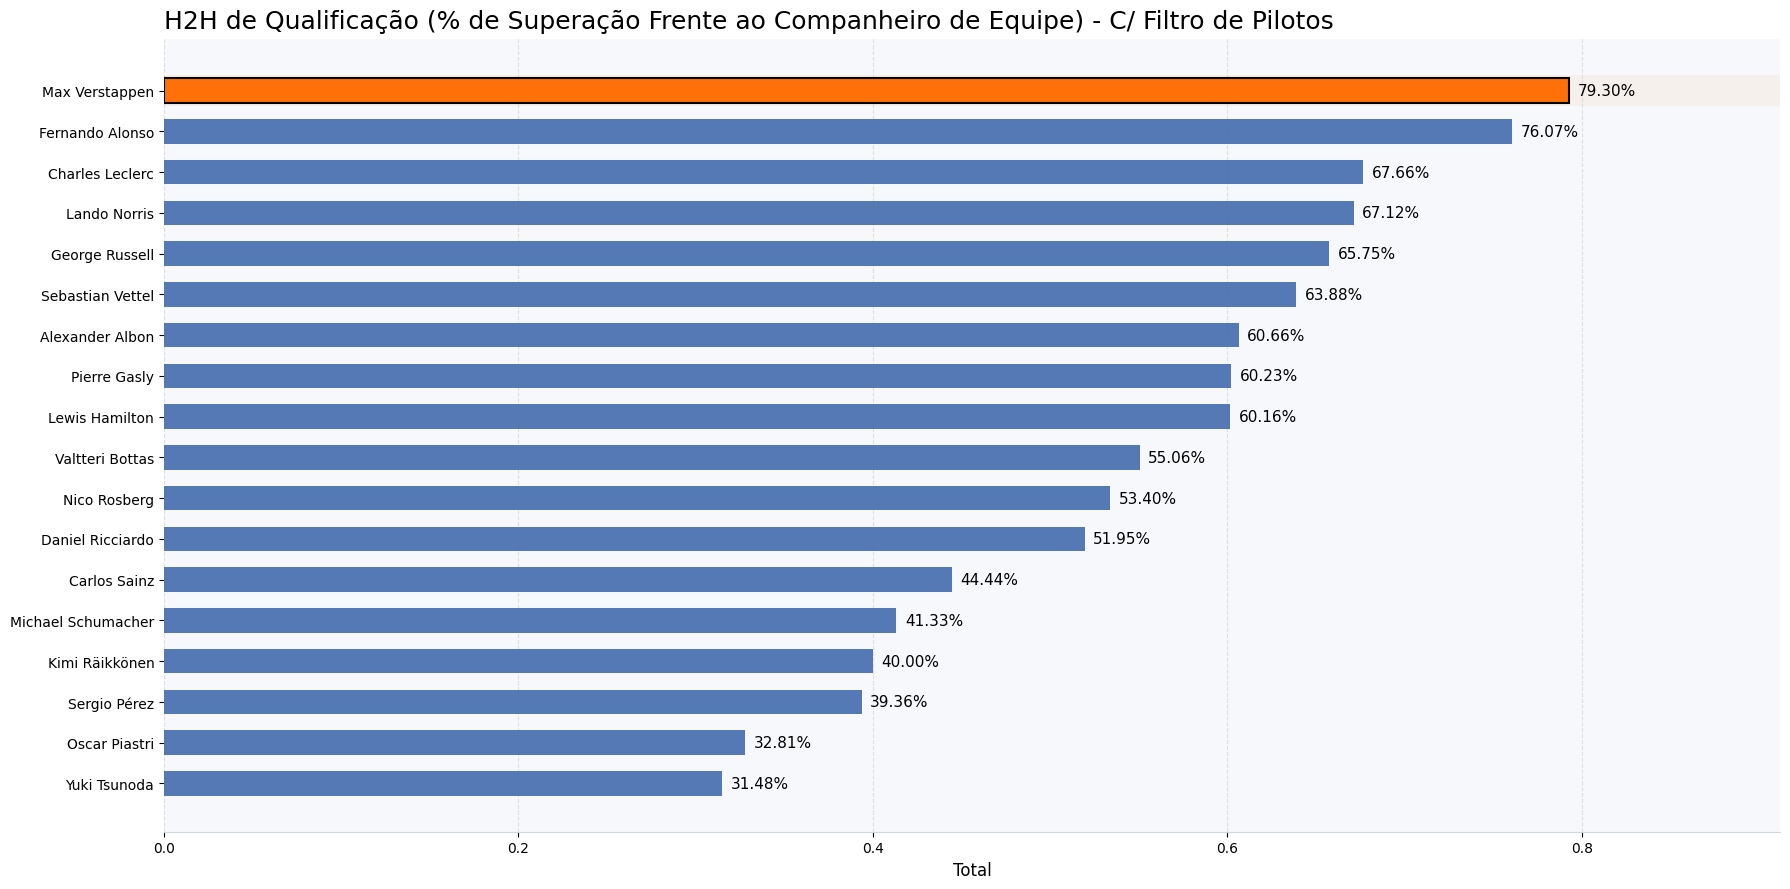

In [60]:
# Se pegarmos só os pilotos mais "Comparáveis":

fxns.graf_top_pilotos(
    df=df_quali_vs_agrup_wins[df_quali_vs_agrup_wins['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen'])],
    top_n=30,
    col_valor='result_percentage',
    valor_format_str='{:.2%}',
    titulo='H2H de Qualificação (% de Superação Frente ao Companheiro de Equipe) - C/ Filtro de Pilotos'
)

Ao utilizarmos a lista que eu tinha criado acima, usando grandes nomes de uma era mais moderna da F1, vemos que o Verstappen simplesmente supera todos eles.

E vale mencionar também o quão grande piloto o Alonso é, está na F1 há um século já, participou de diversas equipes, teve diversos companheiros de equipe e tem uma taxa de superação absurdamente alta (o fato de o companheiro atual ser o Stroll pode ter ajudado um pouco...)

Podemos também ver como Verstappen foi contra cada companheiro de equipe que teve, será que algum foi capaz de superá-lo?

In [61]:
# Agora posso agrupar o dataset pra contar quantidade de "vitórias" em quali para cada piloto

df_quali_vs_agrup_tmate = df_quali_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'driver_full_name_tmate',
        'fl_win_quali_vs_tmate'
    ]
).agg(
    {'round_id':'count'}
).reset_index(
).rename(
    columns={
        'round_id':'qt_rounds'
    }
)

# Adiciono uma coluna calculando o percentual:
# Primeiro calculo a quantidade total que ele teve com aquele compnaheiro de equipe:
df_quali_vs_agrup_tmate['total_rounds_for_driver_w_tmate'] = df_quali_vs_agrup_tmate.groupby(['driver_ref', 'driver_full_name_tmate'])['qt_rounds'].transform('sum')

# Calculo o percentual dividindo uma coisa pela outra:
df_quali_vs_agrup_tmate['result_percentage'] = df_quali_vs_agrup_tmate['qt_rounds'] / df_quali_vs_agrup_tmate['total_rounds_for_driver_w_tmate']

# vou filtrar usando a flag, pra ter o percentual apenas referente a quando o piloto ficou na frente de seu companheiro de equipe:
df_quali_vs_agrup_tmate_wins = df_quali_vs_agrup_tmate[df_quali_vs_agrup_tmate['fl_win_quali_vs_tmate']]

df_quali_vs_agrup_tmate_wins.sort_values(['result_percentage'], ascending=False)

driver_ref    driver_full_name driver_full_name_tmate  \
48       bottas     Valtteri Bottas         George Russell   
32       alonso     Fernando Alonso        Romain Grosjean   
126  giovinazzi  Antonio Giovinazzi          Robert Kubica   
94     ericsson     Marcus Ericsson     Antonio Giovinazzi   
254     leclerc     Charles Leclerc         Oliver Bearman   
..          ...                 ...                    ...   
144   gutierrez   Esteban Gutiérrez        Nico Hülkenberg   
244      latifi     Nicholas Latifi         George Russell   
298     mazepin      Nikita Mazepin        Mick Schumacher   
11        albon     Alexander Albon         Max Verstappen   
354   piquet_jr   Nelson Piquet Jr.        Fernando Alonso   

     fl_win_quali_vs_tmate  qt_rounds  total_rounds_for_driver_w_tmate  \
48                    True          1                                1   
32                    True          7                                7   
126                   True          2                                2   
94                    True          2                                2   
254                   True          1                                1   
..                     ...        ...                              ...   
144                   True          1                               19   
244                   True          2                               38   
298                   True          1                               21   
11                    True          1                               26   
354                   True          1                               28   

     result_percentage  
48            1.000000  
32            1.000000  
126           1.000000  
94            1.000000  
254           1.000000  
..                 ...  
144           0.052632  
244           0.052632  
298           0.047619  
11            0.038462  
354           0.035714  

[256 rows x 7 columns]

In [62]:
df_quali_vs_agrup_tmate_wins[df_quali_vs_agrup_tmate_wins['driver_full_name']=='Max Verstappen']

driver_ref driver_full_name driver_full_name_tmate  \
286  max_verstappen   Max Verstappen        Alexander Albon   
288  max_verstappen   Max Verstappen           Carlos Sainz   
290  max_verstappen   Max Verstappen       Daniel Ricciardo   
291  max_verstappen   Max Verstappen            Liam Lawson   
293  max_verstappen   Max Verstappen           Pierre Gasly   
295  max_verstappen   Max Verstappen           Sergio Pérez   
296  max_verstappen   Max Verstappen           Yuki Tsunoda   

     fl_win_quali_vs_tmate  qt_rounds  total_rounds_for_driver_w_tmate  \
286                   True         25                               26   
288                   True         11                               22   
290                   True         34                               58   
291                   True          2                                2   
293                   True         11                               12   
295                   True         81                               90   
296                   True         16                               16   

     result_percentage  
286           0.961538  
288           0.500000  
290           0.586207  
291           1.000000  
293           0.916667  
295           0.900000  
296           1.000000

Text(0.5, 1.0, 'H2H Qualificação: Gap Médio de Qualificação Por Companheiro')

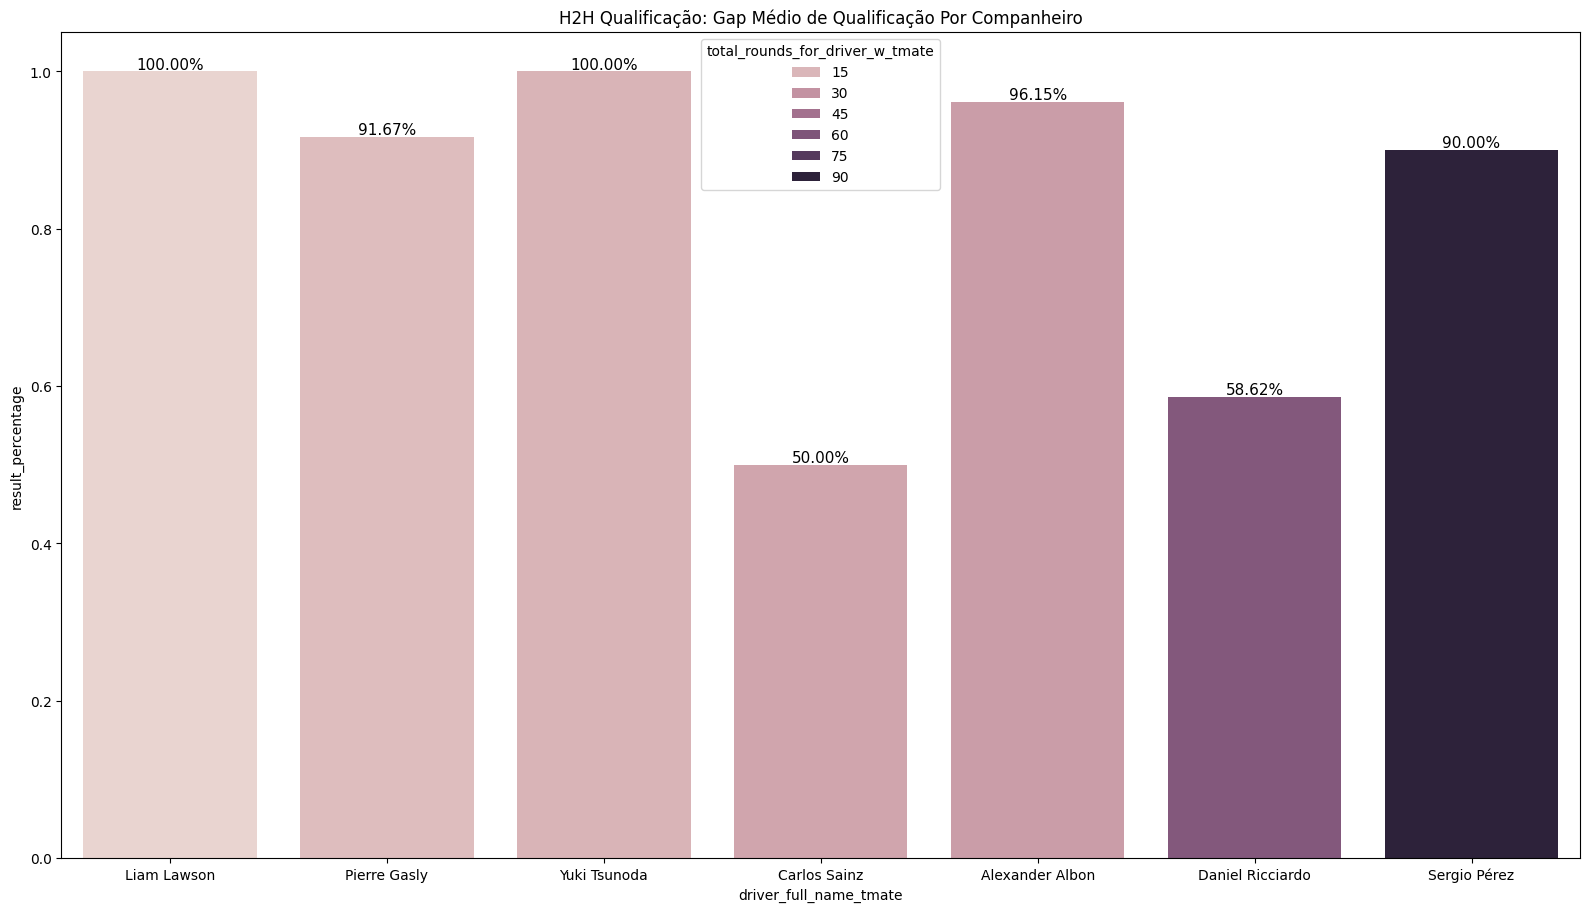

In [63]:
fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(
    df_quali_vs_agrup_tmate_wins[df_quali_vs_agrup_tmate_wins['driver_full_name']=='Max Verstappen'].sort_values('total_rounds_for_driver_w_tmate'),
    x='driver_full_name_tmate',
    y='result_percentage',
    hue='total_rounds_for_driver_w_tmate'
)

for p in ax.patches[:-6]:
    ax.annotate(
        f'{p.get_height():.2%}', # Formato do texto (ex: "89.5%")
        (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
        ha='center',        # Alinhamento horizontal
        va='center',        # Alinhamento vertical
        xytext=(0, 5),      # Offset (5 pontos acima da barra)
        textcoords='offset points',
        fontsize=11
    )

plt.tight_layout()

ax.set_title('H2H Qualificação: Gap Médio de Qualificação Por Companheiro')

Acima, podemos ver que Verstappen superou todos os companheiros de equipe com exceção de Carlos Sainz, contra quem empatou em performance de qualificação!

Isso foi na Toro Rosso, na temporada de estreia de ambos os pilotos!

Obs.: Existem diversas fontes que apontam que Verstappen superou Sainz em qualificação durante seu tempo juntos na Toro Rosso, por um evento de qualificação que seria o da Russia em 2015, mas a questão é que Sainz não participou dessa quali, por ter sofrido um acidente no TL3, que fez com que seu carro ficasse destruído e que Sainz precisasse de assistência média. Em relação a isso, sei que tem quem vai falar que isso é culpa de Sainz, já que se ele não tivesse batido, teria participado da quali. Porém, eu só to colocando aqui eventos em que ambos os pilotos participaram, e, sendo assim, ambos bateram um ao outro exatamente 11 vezes.

### Mas, e se tentarmos quantificar o quanto um piloto está superando o outro?

Meu próximo ângulo dessa análise será de ver em quanto cada piloto supera o seu companheiro de equipe em qualificação:

In [64]:
# Após observar o dataset, notei que se um pilot tem alguma volta muito lenta, isso pode acabar atrapalhando a análise que vou fazer abaixo
# Sendo assim, vou tirar aberrações que seriam coisas "fora do normal" nessa comparação de tempos

# Sempre que a diferença for maior do que 2 segundos, eu vou remover a volta da comparação
# Acredito que 2 segundos é um gap temporal grande o suficiente para que só ocorra se um dos pilotos tiver algum problema
df_quali_vs = df_quali_vs[df_quali_vs['best_lap_time_ms_diff_tmate']>-2000]
df_quali_vs = df_quali_vs[df_quali_vs['best_lap_time_ms_diff_tmate']<2000]

# Uma outra coisa que pode acontecer são "situações adversas" durante a quali (principalmente chuva), que faz com que a pista fique mais lenta ao longo da quali
# Isso faz com que se eu considerar tempos de Qs diferentes, a comparação fica estranha (Acredite, eu tentei)
# Isso faz sentido também ao se considerar como a pista "evolui" entre as sessões, contribuindo pra eu comparar apenas sessões iguais
df_quali_vs = df_quali_vs[df_quali_vs['session_type']== df_quali_vs['session_type_tmate']]

df_quali_vs

race_name  year  round_id   race_date          circuit_name  \
0       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
1       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
3       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
7       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
9       Bahrain Grand Prix  2006       751  2006-03-12    Bahrain Grand Prix   
...                    ...   ...       ...         ...                   ...   
7958  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7959  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7962  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7964  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   
7965  Singapore Grand Prix  2025      1143  2025-10-05  Singapore Grand Prix   

     circuit_locality circuit_country  driver_id driver_forename  \
0              Sakhir         Bahrain        703         Michael   
1              Sakhir         Bahrain        715          Rubens   
3              Sakhir         Bahrain        744       Giancarlo   
7              Sakhir         Bahrain        759          Jenson   
9              Sakhir         Bahrain        763        Fernando   
...               ...             ...        ...             ...   
7958       Marina Bay       Singapore        845           Lando   
7959       Marina Bay       Singapore        846       Alexander   
7962       Marina Bay       Singapore        857           Oscar   
7964       Marina Bay       Singapore        859          Oliver   
7965       Marina Bay       Singapore        860          Franco   

     driver_surname  ... best_lap_time_ms event_count best_lap_time_ms_tmate  \
0        Schumacher  ...          91431.0          45                91478.0   
1       Barrichello  ...          92579.0          45                91549.0   
3        Fisichella  ...          93496.0          27                91702.0   
7            Button  ...          91549.0         108                92579.0   
9            Alonso  ...          91702.0         237                93496.0   
...             ...  ...              ...         ...                    ...   
7958         Norris  ...          89586.0         121                89524.0   
7959          Albon  ...          90202.0          94                90235.0   
7962        Piastri  ...          89524.0          55                89586.0   
7964        Bearman  ...          90420.0          21                90989.0   
7965      Colapinto  ...          90982.0          21                91261.0   

     final_quali_position_tmate driver_ref_tmate  driver_full_name_tmate  \
0                           2.0            massa            Felipe Massa   
1                           3.0           button           Jenson Button   
3                           4.0           alonso         Fernando Alonso   
7                           6.0      barrichello      Rubens Barrichello   
9                           9.0       fisichella    Giancarlo Fisichella   
...                         ...              ...                     ...   
7958                        3.0          piastri           Oscar Piastri   
7959                       13.0            sainz            Carlos Sainz   
7962                        5.0           norris            Lando Norris   
7964                       17.0             ocon            Esteban Ocon   
7965                       18.0            gasly            Pierre Gasly   

     session_type_tmate best_lap_time_ms_diff_tmate  \
0                    Q3                       -47.0   
1                    Q3                      1030.0   
3                    Q3                      1794.0   
7                    Q3                     -1030.0   
9                    Q3                     -1794.0   
...                 ...            

In [65]:
df_quali_vs_time = df_quali_vs.groupby(
    [
        'driver_ref',
        'driver_full_name'
    ]
).agg(
    {
        'best_lap_time_ms_diff_tmate' : 'mean'
    }
).reset_index()

# Vou inverter o sinal, pra ficar mais fácil de visualizar, dado que aqui, valores negativos são melhores
df_quali_vs_time['best_lap_time_ms_diff_tmate'] = df_quali_vs_time['best_lap_time_ms_diff_tmate']*-1

df_quali_vs_time.sort_values('best_lap_time_ms_diff_tmate', ascending=False)

driver_ref    driver_full_name  best_lap_time_ms_diff_tmate
27    jules_bianchi       Jules Bianchi                   644.121212
42  mick_schumacher     Mick Schumacher                   316.296296
39   max_verstappen      Max Verstappen                   307.780000
30        kobayashi     Kamui Kobayashi                   304.549020
20            glock          Timo Glock                   263.120000
..              ...                 ...                          ...
28      karthikeyan  Narain Karthikeyan                  -501.923077
40          mazepin      Nikita Mazepin                  -522.588235
73         yamamoto      Sakon Yamamoto                  -600.529412
12          chilton         Max Chilton                  -644.121212
51        piquet_jr   Nelson Piquet Jr.                 -1066.000000

[75 rows x 3 columns]

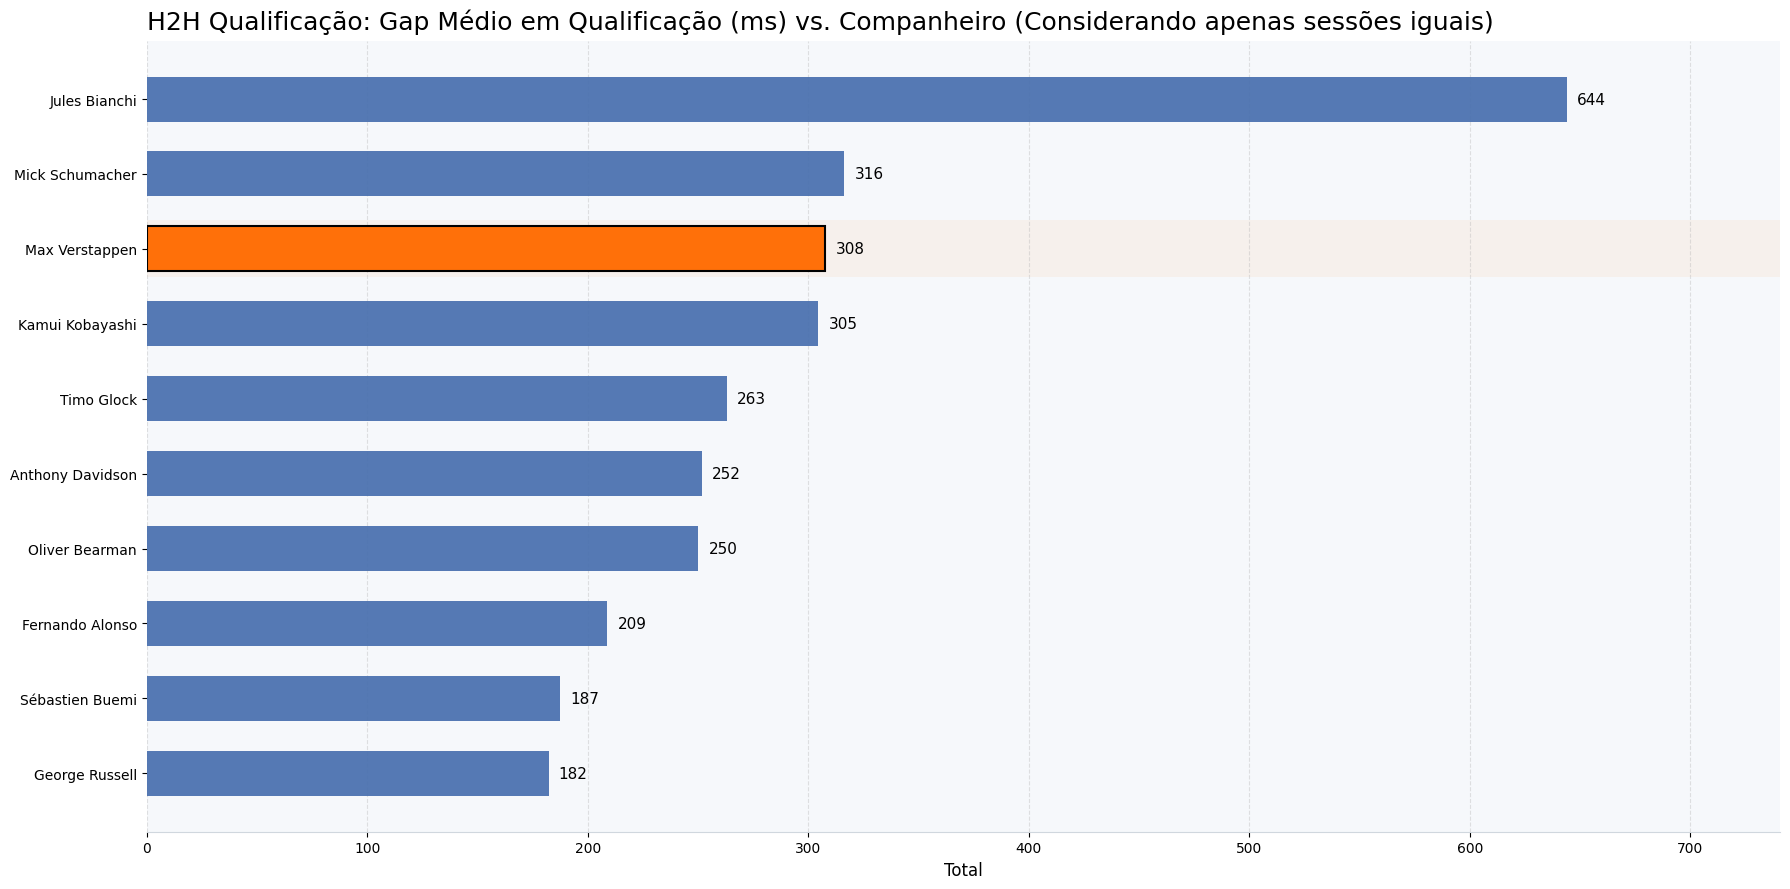

In [66]:
fxns.graf_top_pilotos(
    df=df_quali_vs_time,
    top_n=10,
    col_valor='best_lap_time_ms_diff_tmate',
    titulo='H2H Qualificação: Gap Médio em Qualificação (ms) vs. Companheiro (Considerando apenas sessões iguais)'
)

O gráfico acima é interessante, eu vejo nomes bem inesperados que aparecessem nessas análises e entendo isso da seguinte forma:
- Nomes como Jules Bianchi e Mick Schumacher tiveram temporadas muito dominantes contra seu companheiro de equipe em algum momento da carreira e não tiveram muitas outras performances além dessas, ou seja, tiveram temporadas específicas com companheiros que eram claramente mais "fracos", mas por si só não tiveram performances dominantes na F1;
- A maioria dos nomes são de pilotos que participaram de equipes do *mid field* pra trás, onde geralmente vemos maiores oscilações em termos de performance, e onde muitos pilotos que estão iniciando sua carreira estão fazendo parte;
- Também, nessas equipes, é mais comum que piltos terminem a qualificação em sessões diferentes (apenas 1 deles vai pro Q2 etc) e isso diminui o tamanho da amostra pra quando formos calcular a média, fazendo com que uma ou outra performance que seja mais dominante, apesar de não consistente, puxar a média pra cima.

Por esses e outros motivos, novamente, não acho que faça tanto sentido compararmos nomes como Mick Schumacher com Verstappen, Alonso, Russel etc porque tiveram trajetórias de carreira bem diferentes e que tiveram que performar contra diversos companheiros de equipe que realizaram conquistas na F1 por si só. Sendo assim, vou fazer o mesmo filtro que fiz antes em análises anteriores, selecionando só nomes específicos aqui pra análise.

E, novamente, com esses fatores que disse acima, eu não quis dizer que eu considero esses pilotos "piores" e portanto estou simplesmente removendo da análise por vontade própria pra criar alguma narrativa específica, mas eu acho que estamos falando de pilotos com trajtetórias de carreira na F1 muito diferentes e por conta disso acredito que a análise acabe perdendo um pouco de sentido.

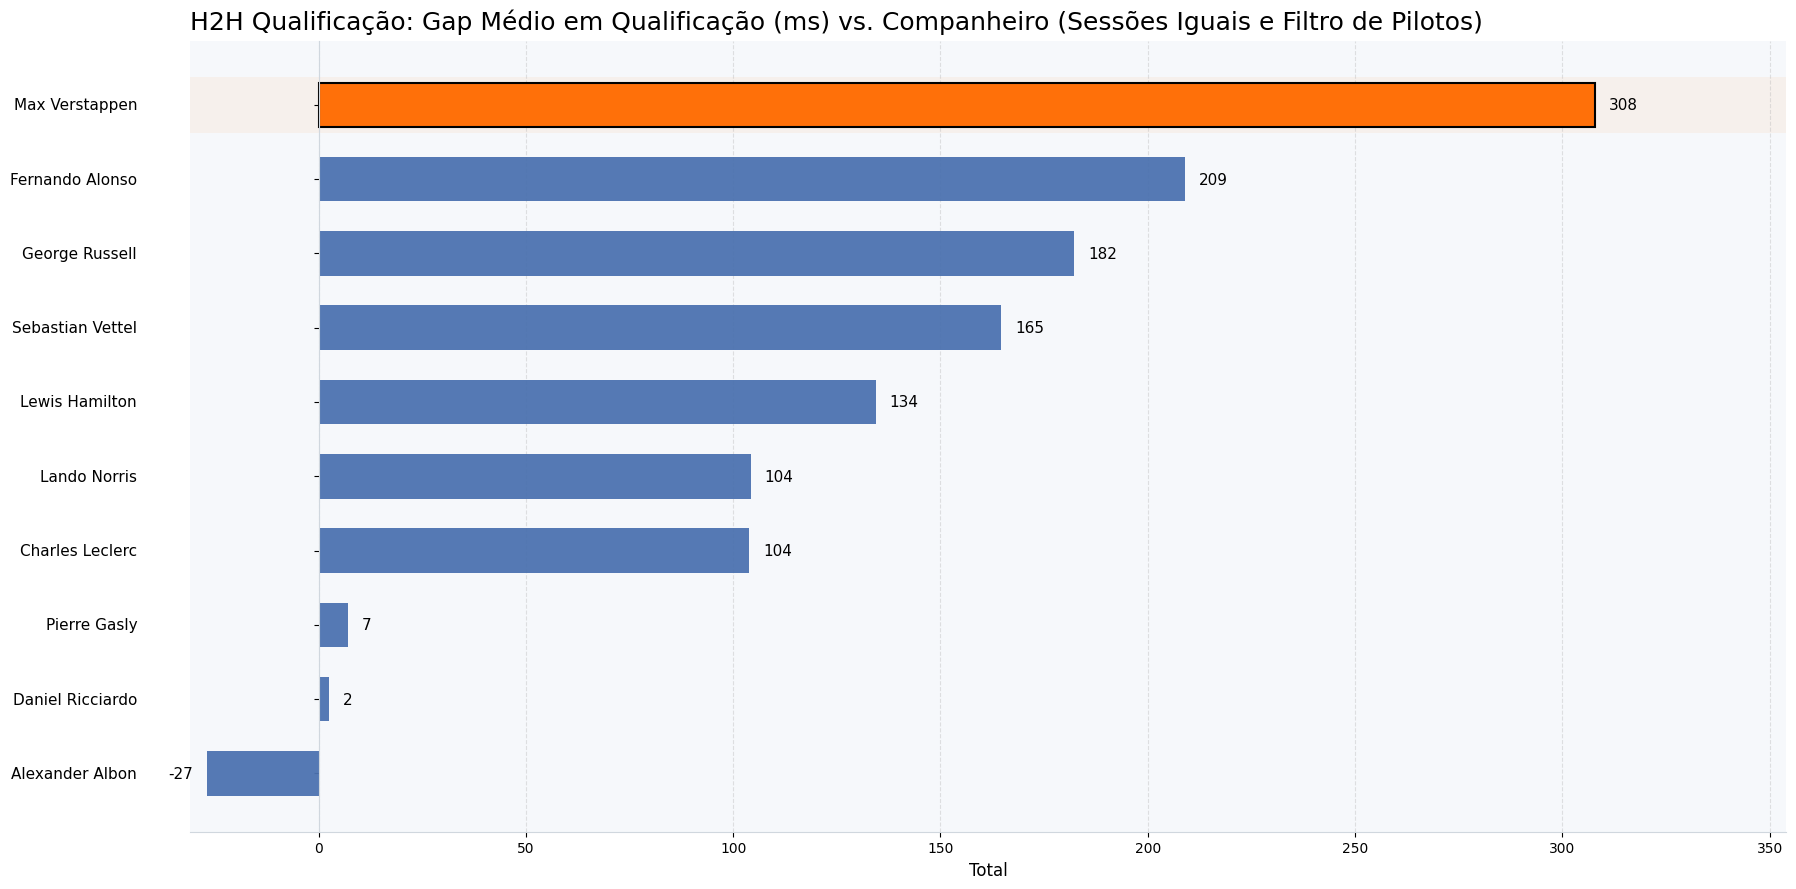

In [67]:
fxns.graf_top_pilotos(
    df=df_quali_vs_time[df_quali_vs_time['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen'])],
    top_n=10,
    col_valor='best_lap_time_ms_diff_tmate',
    titulo='H2H Qualificação: Gap Médio em Qualificação (ms) vs. Companheiro (Sessões Iguais e Filtro de Pilotos)'
)

Parece brincadeira, mas realmente parece que o Verstappen, novamente, possui maior média de superação de seu companheiro de equipe em qualificação (considerando apenas quando foram para a mesma sessão).

Podemos ver isso por companheiro de equipe do VER, tentando identificar até se teve algum que superou ele. Farei isso abaixo.

In [68]:
df_quali_vs_time_tmate = df_quali_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'driver_full_name_tmate'
    ]
).agg(
    {
        'best_lap_time_ms_diff_tmate' : 'mean',
        'round_id':'count' # Vou extrair também quantos eventos fizeram juntos
    }
).reset_index().rename(
    columns={
        'round_id':'round_count'
    }
)

# Vou inverter o sinal, pra ficar mais fácil de visualizar, dado que aqui, valores negativos são melhores
df_quali_vs_time_tmate['best_lap_time_ms_diff_tmate'] = df_quali_vs_time_tmate['best_lap_time_ms_diff_tmate']*-1

In [69]:
df_quali_vs_time_tmate[df_quali_vs_time_tmate['driver_full_name']=='Max Verstappen']

driver_ref driver_full_name driver_full_name_tmate  \
139  max_verstappen   Max Verstappen        Alexander Albon   
140  max_verstappen   Max Verstappen           Carlos Sainz   
141  max_verstappen   Max Verstappen       Daniel Ricciardo   
142  max_verstappen   Max Verstappen           Pierre Gasly   
143  max_verstappen   Max Verstappen           Sergio Pérez   
144  max_verstappen   Max Verstappen           Yuki Tsunoda   

     best_lap_time_ms_diff_tmate  round_count  
139                   497.000000           19  
140                   -45.428571            7  
141                    47.595745           47  
142                   591.000000            8  
143                   403.396825           63  
144                   777.166667            6

Text(0.5, 1.0, 'H2H Qualificação: Gap Médio de Qualificação Por Companheiro de Equipe')

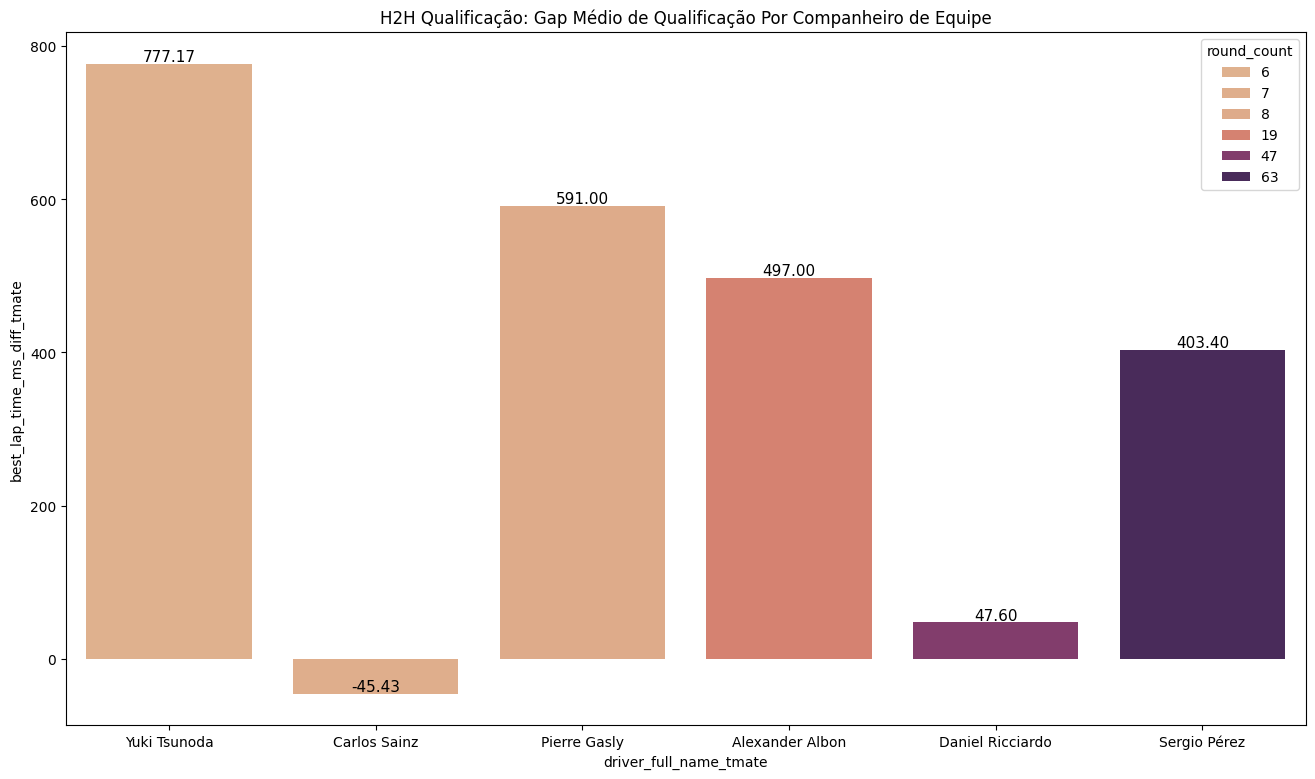

In [70]:
fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(
    df_quali_vs_time_tmate[df_quali_vs_time_tmate['driver_full_name']=='Max Verstappen'].sort_values('round_count'),
    x='driver_full_name_tmate',
    y='best_lap_time_ms_diff_tmate',
    hue='round_count',
    palette='flare'
)

for p in ax.patches[:-6]:
    ax.annotate(
        f'{p.get_height():,.2f}', # Formato do texto (ex: "89.5%")
        (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
        ha='center',        # Alinhamento horizontal
        va='center',        # Alinhamento vertical
        xytext=(0, 5),      # Offset (5 pontos acima da barra)
        textcoords='offset points',
        fontsize=11
    )

ax.set_title('H2H Qualificação: Gap Médio de Qualificação Por Companheiro de Equipe')

Acima podemos ver um gráfico que mostra, por companheiro de equipe, qual foi o gap médio entre eles. Para Verstappen: superou todos os seus companheiros de equipe com a exceção de sua primeira temporada na F1, em que foi levemente superado por Sainz, apesar de terem empatado em termos de resultado na quali, quando ambos terminaram na mesma sessão (ambos foram pro Q3, por exemplo, que infelizmente não foram muitos casos com apenas 7), podemos ver que Sainz levou uma pequena vantagem frente ao Verstappen.

Fora o Sainz, VER superou todos os outros em termos de tempo (o Ricciardo por muito pouco), quando terminaram na mesma sessão. E por conta desse filtro também que o Lawson não aparece na lista, na sua breve participação na RBR, ele não chegou a conseguir terminar nenhuma quali no Q3, por isso, não aparece no gráfico.

### H2H em Corridas:

Agora, pra finalmente fechar a parte de análises, antes de partir pra conclusão, vou dar uma olhada no dataset de corridas. Mas acho que algumas conclusões que eu vou apresentar aqui vão ser meio óbvias dado o andamento da análise até o momento, então vou tentar passar mais rapidamente e ir para um ponto que pode ser mais interessante. Vou explicando abaixo conforme for andando com a análise.

#### Resultados de corridas:

In [71]:
df_races

race_name  round_id  year  race_date  \
0      Australian Grand Prix      1126  2025 2025-03-16   
1      Australian Grand Prix      1126  2025 2025-03-16   
2      Australian Grand Prix      1126  2025 2025-03-16   
3      Australian Grand Prix      1126  2025 2025-03-16   
4      Australian Grand Prix      1126  2025 2025-03-16   
...                      ...       ...   ...        ...   
25748     Italian Grand Prix         7  1950 1950-09-03   
25749     Italian Grand Prix         7  1950 1950-09-03   
25750     Italian Grand Prix         7  1950 1950-09-03   
25751     Italian Grand Prix         7  1950 1950-09-03   
25752     Italian Grand Prix         7  1950 1950-09-03   

                         circuit_name circuit_country  driver_id driver_code  \
0      Albert Park Grand Prix Circuit       Australia        845         NOR   
1      Albert Park Grand Prix Circuit       Australia        831         VER   
2      Albert Park Grand Prix Circuit       Australia        847         RUS   
3      Albert Park Grand Prix Circuit       Australia        863         ANT   
4      Albert Park Grand Prix Circuit       Australia        846         ALB   
...                               ...             ...        ...         ...   
25748    Autodromo Nazionale di Monza           Italy         80        None   
25749    Autodromo Nazionale di Monza           Italy         28        None   
25750    Autodromo Nazionale di Monza           Italy         15        None   
25751    Autodromo Nazionale di Monza           Italy         81        None   
25752    Autodromo Nazionale di Monza           Italy         68        None   

           driver_ref driver_forename  ... laps_completed time_in_race_ms  \
0              norris           Lando  ...           57.0    01:42:06.304   
1      max_verstappen             Max  ...           57.0    01:42:07.199   
2             russell          George  ...           57.0    01:42:14.785   
3           antonelli     Andrea Kimi  ...           57.0    01:42:16.439   
4               albon       Alexander  ...           57.0    01:42:19.077   
...               ...             ...  ...            ...             ...   
25748          sanesi        Consalvo  ...           11.0            None   
25749          manzon          Robert  ...            7.0            None   
25750            bira          Prince  ...            1.0            None   
25751         pietsch            Paul  ...            0.0            None   
25752         bonetto          Felice  ...            0.0            None   

      fastest_lap_number fastest_lap_rank fastest_lap_time  fastest_lap_speed  \
0                   43.0              1.0     00:01:22.167                NaN   
1                   43.0              3.0     00:01:23.081                NaN   
2                   43.0             11.0     00:01:25.065                NaN   
3                   43.0              9.0     00:01:24.901                NaN   
4                   43.0              8.0     00:01:24.597                NaN   
...                  ...              ...              ...                ...   
25748                NaN              NaN             None                NaN   
25749                NaN              NaN             None                NaN   
25750                NaN              NaN             None                NaN   
25751                NaN              NaN             None                NaN   
25752                NaN              NaN             None                NaN   

       race_status  race_count_for_driver        dob driver_age_at_race  
0              0.0                    146 1999-11-13          25.338809  
1              0.0                    227 1997-09-30          27.457906  
2              0.0                    146 1998-02-15          27.080082  
3              0.0                     18 2006-08-25          18.557153  
4              0.0                    123 1996-03-23          28.980151  
...    

In [72]:
# Vou trabalhar momentaneamente com o dataset de corridas:

df_races = fxns.add_lap_time_ms_column(df_races, 'fastest_lap_time')

df_races_vs = fxns.add_colunas_companheiro_equipe(
    df_dados=df_races,
    metricas=['fastest_lap_time_ms', 'finishing_position', 'race_status'],
    colunas_id_tmate=['driver_ref', 'driver_full_name']
)

# Vou filtrar eventos em que ambos os pilotos terminaram a corrida:
lista_status_a_considerar = [0,1] # Status que indicam que o piloto terminou a corrida (finished ou finished lap behind)
df_races_vs = df_races_vs[(df_races_vs['race_status'].isin(lista_status_a_considerar)) & (df_races_vs['race_status_tmate'].isin(lista_status_a_considerar))]

df_races_vs


race_name  round_id  year  race_date  \
0      Australian Grand Prix      1126  2025 2025-03-16   
2      Australian Grand Prix      1126  2025 2025-03-16   
3      Australian Grand Prix      1126  2025 2025-03-16   
7      Australian Grand Prix      1126  2025 2025-03-16   
8      Australian Grand Prix      1126  2025 2025-03-16   
...                      ...       ...   ...        ...   
25726     Italian Grand Prix         7  1950 1950-09-03   
25727     Italian Grand Prix         7  1950 1950-09-03   
25728     Italian Grand Prix         7  1950 1950-09-03   
25729     Italian Grand Prix         7  1950 1950-09-03   
25731     Italian Grand Prix         7  1950 1950-09-03   

                         circuit_name circuit_country  driver_id driver_code  \
0      Albert Park Grand Prix Circuit       Australia        845         NOR   
2      Albert Park Grand Prix Circuit       Australia        847         RUS   
3      Albert Park Grand Prix Circuit       Australia        863         ANT   
7      Albert Park Grand Prix Circuit       Australia        843         LEC   
8      Albert Park Grand Prix Circuit       Australia        857         PIA   
...                               ...             ...        ...         ...   
25726    Autodromo Nazionale di Monza           Italy         24        None   
25727    Autodromo Nazionale di Monza           Italy          2        None   
25728    Autodromo Nazionale di Monza           Italy          5        None   
25729    Autodromo Nazionale di Monza           Italy          8        None   
25731    Autodromo Nazionale di Monza           Italy         32        None   

      driver_ref driver_forename  ... driver_age_at_race fastest_lap_time_ms  \
0         norris           Lando  ...          25.338809             82167.0   
2        russell          George  ...          27.080082             85065.0   
3      antonelli     Andrea Kimi  ...          18.557153             84901.0   
7        leclerc         Charles  ...          27.414100             85271.0   
8        piastri           Oscar  ...          23.942505             83242.0   
...          ...             ...  ...                ...                 ...   
25726     ascari         Alberto  ...          32.142368                 NaN   
25727    fagioli           Luigi  ...          52.232717                 NaN   
25728     rosier           Louis  ...          44.826831                 NaN   
25729  etancelin        Philippe  ...          53.678303                 NaN   
25731  whitehead           Peter  ...          35.808350                 NaN   

      fastest_lap_time_ms_tmate finishing_position_tmate race_status_tmate  \
0                       83242.0                      9.0               0.0   
2                       84901.0                      4.0               0.0   
3                       85065.0                      3.0               0.0   
7                       84218.0                     10.0               0.0   
8                       82167.0                      1.0               0.0   
...                         ...                      ...               ...   
25726                       NaN                      2.0               0.0   
25727                       NaN                      1.0               0.0   
25728                       NaN                      5.0               1.0   
25729                       NaN                      4.0               1.0   
25731                       NaN                      2.0               0.0   

       driver_ref_tmate  driver_full_name_tmate  \
0               piastri           Oscar Piastri   
2             antonelli   Andrea Kimi Antonelli   
3               russell          George Russell   
7              hamilton          Lewis Hamilton   
8                norris            Lando Norris   
...                 ...                     ...   
25726          serafini         Dorino Serafini   
25727            farina             Nino Fa

Assim como fizemos pra qualificação, acho que é interessante aqui fazer uma análise por percentual de vitória VS o companheiro de equipe nas corridas:

In [73]:
# Crio uma flag pra identificar se o piloto ganhou contra o companheiro de equipe:

df_races_vs['fl_win_race_vs_tmate'] = df_races_vs['finishing_position'] < df_races_vs['finishing_position_tmate']

# Vou agrupar o dataset por essa flag:

df_races_vs_agrup = df_races_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'fl_win_race_vs_tmate'
    ]
).agg(
    {
        'race_name':'count'
    }
).reset_index().rename(
    columns={
        'race_name':'qt_rounds'
    }
)

# Adiciono uma coluna calculando o percentual:
# Primeiro calculo a quantidade total que ele teve:
df_races_vs_agrup['total_rounds_for_driver'] = df_races_vs_agrup.groupby(['driver_ref'])['qt_rounds'].transform('sum')

# Calculo o percentual dividindo uma coisa pela outra:
df_races_vs_agrup['result_percentage'] = df_races_vs_agrup['qt_rounds'] / df_races_vs_agrup['total_rounds_for_driver']

# vou filtrar usando a flag, pra ter o percentual apenas referente a quando o piloto ficou na frente de seu companheiro de equipe:
df_races_vs_agrup = df_races_vs_agrup[df_races_vs_agrup['fl_win_race_vs_tmate']]

# Vou filtrasr só quem teve mais do que 20 corridas (pra não pegar pilotos que participaram de poucos eventos):
df_races_vs_agrup = df_races_vs_agrup[df_races_vs_agrup['total_rounds_for_driver']>20]

df_races_vs_agrup

driver_ref   driver_full_name  fl_win_race_vs_tmate  qt_rounds  \
11         albon    Alexander Albon                  True         52   
13      alboreto   Michele Alboreto                  True         32   
15         alesi         Jean Alesi                  True         30   
17   alguersuari  Jaime Alguersuari                  True         12   
19        alliot    Philippe Alliot                  True          8   
..           ...                ...                   ...        ...   
889       watson        John Watson                  True          9   
891       webber        Mark Webber                  True         52   
893     wehrlein    Pascal Wehrlein                  True         17   
908         wurz     Alexander Wurz                  True         11   
914         zhou        Guanyu Zhou                  True         17   

     total_rounds_for_driver  result_percentage  
11                        80           0.650000  
13                        57           0.561404  
15                        52           0.576923  
17                        24           0.500000  
19                        23           0.347826  
..                       ...                ...  
889                       30           0.300000  
891                      116           0.448276  
893                       24           0.708333  
908                       30           0.366667  
914                       49           0.346939  

[136 rows x 6 columns]

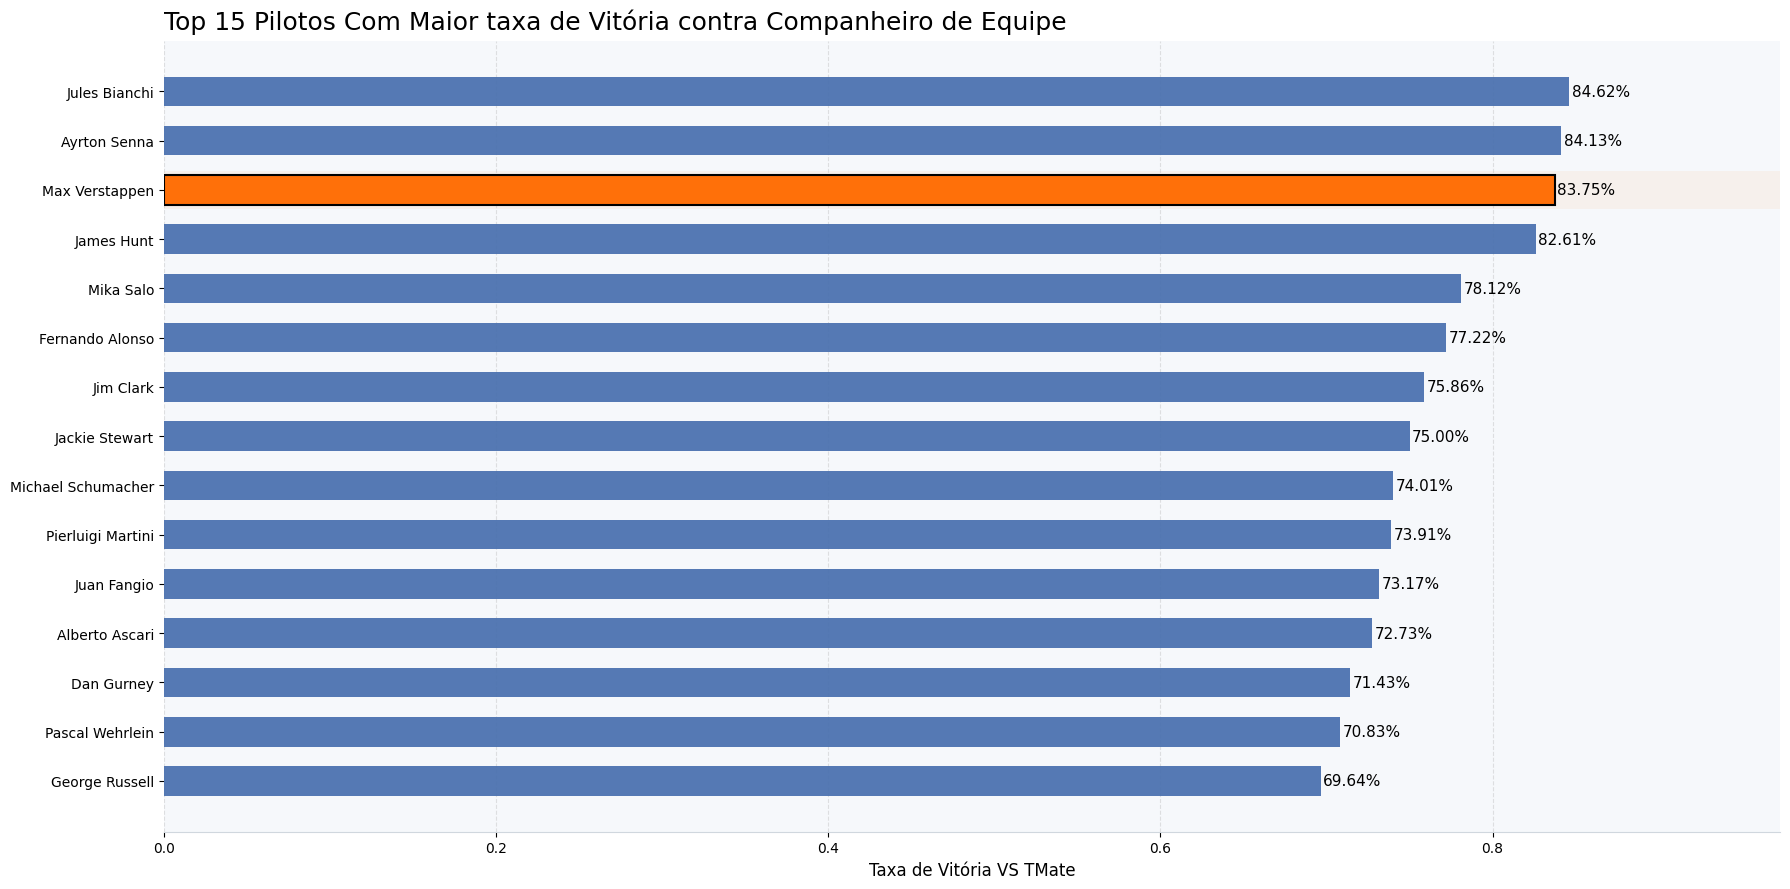

In [74]:
# Agora, partindo pra análise, filtro só o flag de vitória pra ter o percentual de vitória:
df_races_vs_agrup_wins = df_races_vs_agrup[df_races_vs_agrup['fl_win_race_vs_tmate']]

# E vamos dar uma olhada nos top pilotos com maior percentual de vitória contra o companheiro de equipe no dataset inteiro:
fxns.graf_top_pilotos(
    df_races_vs_agrup_wins,
    top_n=15,
    col_valor='result_percentage',
    valor_format_str='{:.2%}',
    titulo='Top 15 Pilotos Com Maior taxa de Vitória contra Companheiro de Equipe',
    xlabel='Taxa de Vitória VS TMate'
)


Surpresa surpresa, de novo temos o Verstappen aparecendo com um dos maiores percentuais da lista.

É interessante ver outros nomes aparecendo aqui também (Jules Bianchi, já explicado, aparece novamente), temos também o Senna, e alguns outros nomes menos esperados como Mika Salo. Para isso, reforço o filtro que estou utilizando que é de apenas corridas em que ambos os pilotos terminaram, o que muda consideravelmente o resultado da análise se considerarmos DNFs como derrota para alguns dos pilotos.

E, novamente, eu posso usar a lista que eu tinha construído antes, com nomes apenas da F1 mais moderna pra efeitos de comparação:

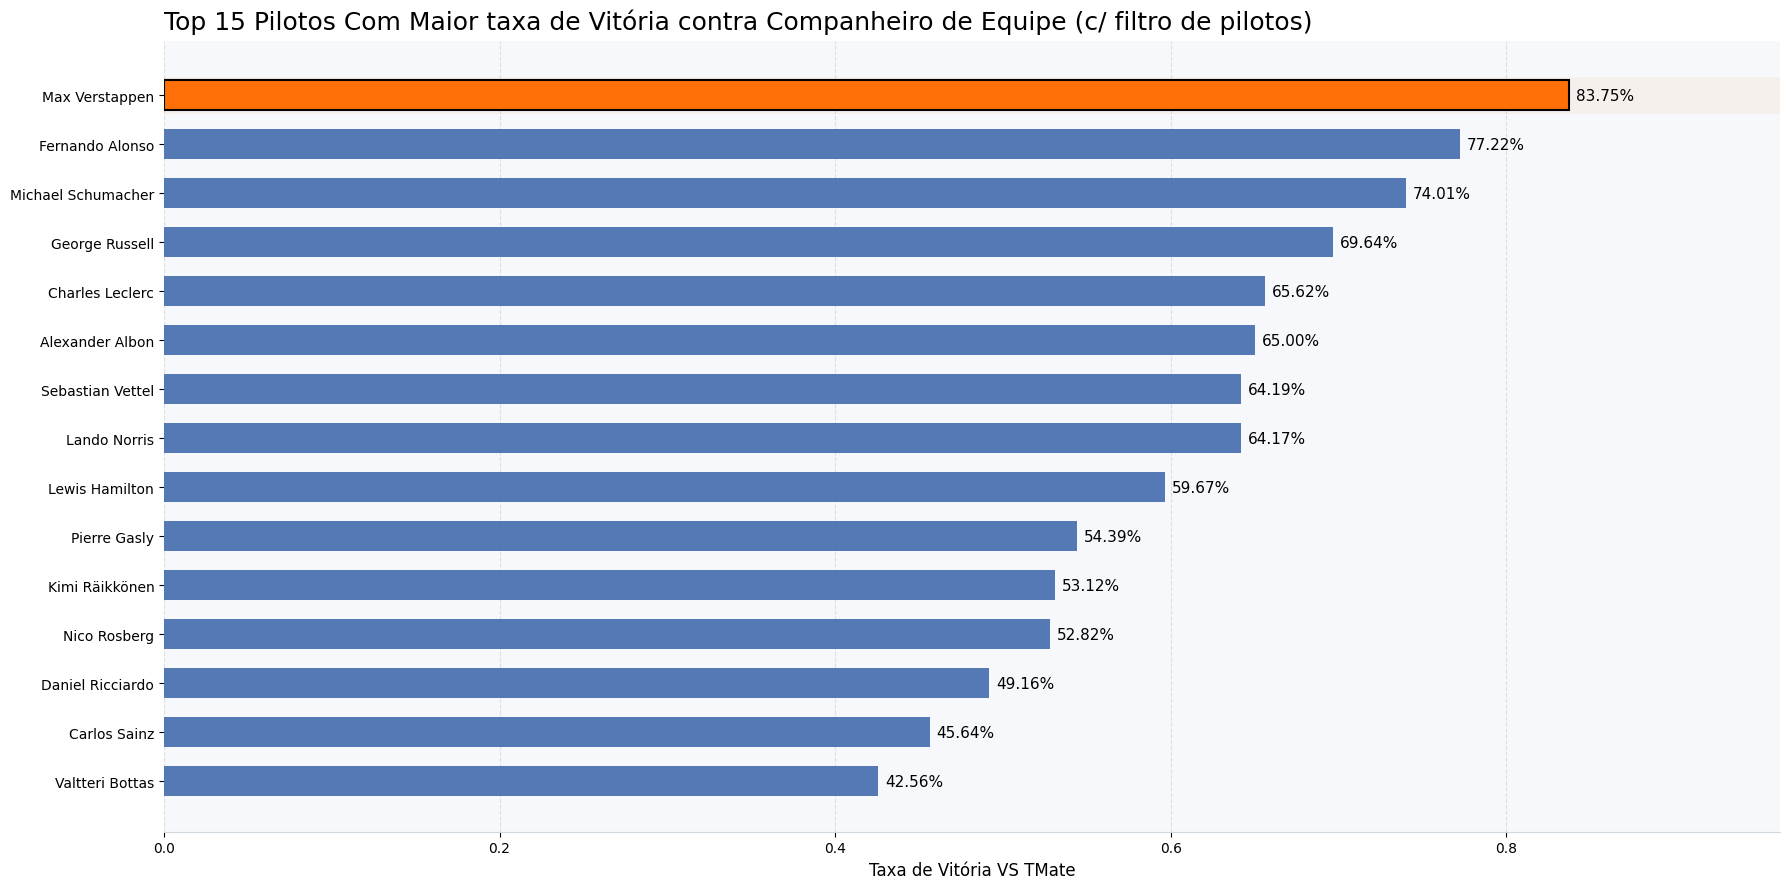

In [75]:
fxns.graf_top_pilotos(
    df_races_vs_agrup_wins[df_races_vs_agrup_wins['driver_full_name'].isin(lista_pilotos_a_comparar + ['Max Verstappen'])],
    top_n=15,
    col_valor='result_percentage',
    valor_format_str='{:.2%}',
    titulo='Top 15 Pilotos Com Maior taxa de Vitória contra Companheiro de Equipe (c/ filtro de pilotos)',
    xlabel='Taxa de Vitória VS TMate'
)


Dentre grandes nomes da era moderna da F1, Verstappen aparece com o maior percentual de superação do companheiro de equipe em termos de resultados de corridas.

Novamente, podemos ver Verstappen, por companheiro de equipe:

In [76]:
df_races_vs_agrup_tmate = df_races_vs.groupby(
    [
        'driver_ref',
        'driver_full_name',
        'driver_full_name_tmate',
        'fl_win_race_vs_tmate',
    ]
).agg(
    {
        'race_name':'count'
    }
).reset_index().rename(
    columns={
        'race_name':'qt_rounds'
    }
)

# Adiciono uma coluna calculando o percentual:
# Primeiro calculo a quantidade total que ele teve com cada companheiro de equipe:
df_races_vs_agrup_tmate['total_rounds_for_driver'] = df_races_vs_agrup_tmate.groupby(['driver_ref', 'driver_full_name_tmate'])['qt_rounds'].transform('sum')

# Calculo o percentual dividindo uma coisa pela outra:
df_races_vs_agrup_tmate['result_percentage'] = df_races_vs_agrup_tmate['qt_rounds'] / df_races_vs_agrup_tmate['total_rounds_for_driver']

# vou filtrar usando a flag, pra ter o percentual apenas referente a quando o piloto ficou na frente de seu companheiro de equipe:
df_races_vs_agrup_tmate = df_races_vs_agrup_tmate[df_races_vs_agrup_tmate['fl_win_race_vs_tmate']]

df_races_vs_agrup_tmate[df_races_vs_agrup_tmate['driver_full_name']=='Max Verstappen']

driver_ref driver_full_name driver_full_name_tmate  \
1779  max_verstappen   Max Verstappen        Alexander Albon   
1781  max_verstappen   Max Verstappen           Carlos Sainz   
1783  max_verstappen   Max Verstappen       Daniel Ricciardo   
1784  max_verstappen   Max Verstappen            Liam Lawson   
1786  max_verstappen   Max Verstappen           Pierre Gasly   
1788  max_verstappen   Max Verstappen           Sergio Pérez   
1789  max_verstappen   Max Verstappen           Yuki Tsunoda   

      fl_win_race_vs_tmate  qt_rounds  total_rounds_for_driver  \
1779                  True         16                       18   
1781                  True          6                       11   
1783                  True         20                       33   
1784                  True          1                        1   
1786                  True          9                       10   
1788                  True         68                       73   
1789                  True         14                       14   

      result_percentage  
1779           0.888889  
1781           0.545455  
1783           0.606061  
1784           1.000000  
1786           0.900000  
1788           0.931507  
1789           1.000000

Text(0.5, 1.0, 'H2H Corridas: Percentual de superação frente ao companheiro de equipe')

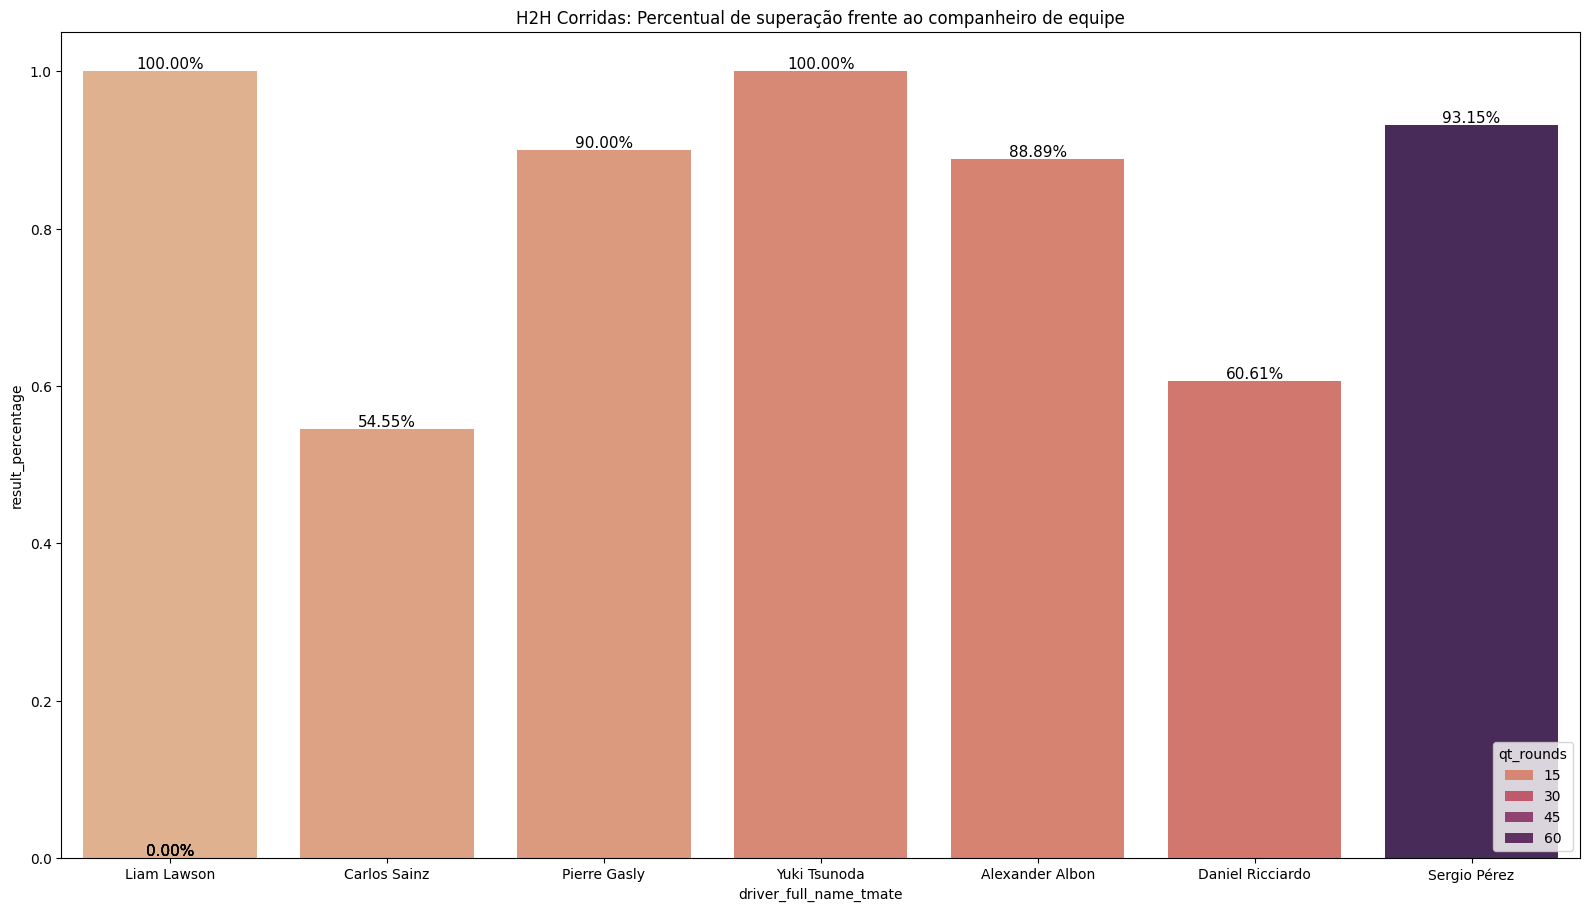

In [77]:
fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(
    df_races_vs_agrup_tmate[df_races_vs_agrup_tmate['driver_full_name']=='Max Verstappen'].sort_values('qt_rounds'),
    x='driver_full_name_tmate',
    y='result_percentage',
    hue='qt_rounds',
    palette='flare'
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2%}', # Formato do texto (ex: "89.5%")
        (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
        ha='center',        # Alinhamento horizontal
        va='center',        # Alinhamento vertical
        xytext=(0, 5),      # Offset (5 pontos acima da barra)
        textcoords='offset points',
        fontsize=11
    )

plt.tight_layout()

ax.set_title('H2H Corridas: Percentual de superação frente ao companheiro de equipe')

Podemos ver que em resultados de corrida, Verstappen superou todos os companheiros de equipe que teve até hoje, sendo que o que chegou mais perto, novamente em linha com o que vimos antes, foi Sainz, na primeira temporada de ambos na F1 na Toro Rosso. Ricciardo também chegou relativamente perto dos 50%, mas contra todo o restante, Verstappen conseguiu ser absolutamente dominante.

### Comparação de volta mais rápida

Bom, até o momento, nesta análise que ficou mais longa do que eu esperava, já analisamos números gerais, analisamos consistência de ritmo de volta, vimos performance de qualificação e diversas óticas de comparação de resultados em campeonato, corrida e quali também. Pra finalizar então, uma outra métrica que me vem na cabeça é verificar os melhores tempos de volta das corridas.

Como já fizemos uma análise de ritmo pela ótica de consistência, seria bom agora termos uma ótica de velocidade mesmo, e a ideia de fazer isso é por meio da volta mais rápida de cada corrida: **Se analisarmos a volta mais rápida de cada piloto por corrida, quem é que costuma ser o mais rápido frente ao companheiro de equipe?**

In [78]:
df_races_vs 

race_name  round_id  year  race_date  \
0      Australian Grand Prix      1126  2025 2025-03-16   
2      Australian Grand Prix      1126  2025 2025-03-16   
3      Australian Grand Prix      1126  2025 2025-03-16   
7      Australian Grand Prix      1126  2025 2025-03-16   
8      Australian Grand Prix      1126  2025 2025-03-16   
...                      ...       ...   ...        ...   
25726     Italian Grand Prix         7  1950 1950-09-03   
25727     Italian Grand Prix         7  1950 1950-09-03   
25728     Italian Grand Prix         7  1950 1950-09-03   
25729     Italian Grand Prix         7  1950 1950-09-03   
25731     Italian Grand Prix         7  1950 1950-09-03   

                         circuit_name circuit_country  driver_id driver_code  \
0      Albert Park Grand Prix Circuit       Australia        845         NOR   
2      Albert Park Grand Prix Circuit       Australia        847         RUS   
3      Albert Park Grand Prix Circuit       Australia        863         ANT   
7      Albert Park Grand Prix Circuit       Australia        843         LEC   
8      Albert Park Grand Prix Circuit       Australia        857         PIA   
...                               ...             ...        ...         ...   
25726    Autodromo Nazionale di Monza           Italy         24        None   
25727    Autodromo Nazionale di Monza           Italy          2        None   
25728    Autodromo Nazionale di Monza           Italy          5        None   
25729    Autodromo Nazionale di Monza           Italy          8        None   
25731    Autodromo Nazionale di Monza           Italy         32        None   

      driver_ref driver_forename  ... fastest_lap_time_ms  \
0         norris           Lando  ...             82167.0   
2        russell          George  ...             85065.0   
3      antonelli     Andrea Kimi  ...             84901.0   
7        leclerc         Charles  ...             85271.0   
8        piastri           Oscar  ...             83242.0   
...          ...             ...  ...                 ...   
25726     ascari         Alberto  ...                 NaN   
25727    fagioli           Luigi  ...                 NaN   
25728     rosier           Louis  ...                 NaN   
25729  etancelin        Philippe  ...                 NaN   
25731  whitehead           Peter  ...                 NaN   

      fastest_lap_time_ms_tmate finishing_position_tmate race_status_tmate  \
0                       83242.0                      9.0               0.0   
2                       84901.0                      4.0               0.0   
3                       85065.0                      3.0               0.0   
7                       84218.0                     10.0               0.0   
8                       82167.0                      1.0               0.0   
...                         ...                      ...               ...   
25726                       NaN                      2.0               0.0   
25727                       NaN                      1.0               0.0   
25728                       NaN                      5.0               1.0   
25729                       NaN                      4.0               1.0   
25731                       NaN                      2.0               0.0   

      driver_ref_tmate  driver_full_name_tmate  \
0              piastri           Oscar Piastri   
2            antonelli   Andrea Kimi Antonelli   
3              russell          George Russell   
7             hamilton          Lewis Hamilton   
8               norris            Lando Norris   
...                ...                     ...   
25726         serafini         Dorino Serafini   
25727           farina             Nino Farina   
25728        etancelin      Philippe Étancelin   
25729           rosier            Louis Rosier   
25731         serafini         Dorino Serafini   

       fastest_lap_time_ms_diff_tmate  finishing_position_diff_tmate  \
0     